kiva loans data analysis project

Data set : https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kiva loans data analysis project/kiva_loans.csv")
df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [6]:
df.shape

(671205, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
df.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

In [9]:
df.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [10]:
df.drop(['tags','partner_id','id'],axis=1,inplace=True)

In [11]:
df.fillna("Missing",inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.isna().sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

currency converter

In [14]:
currency = df.currency.unique()
currency 

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'MWK', 'LAK', 'MMK', 'ZWD', 'MDL', 'SSP', 'SBD', 'CNY', 'EGP',
       'MGA', 'NAD', 'LSL', 'THB'], dtype=object)

In [15]:
currency_converter = [0.0045, 0.0120,0.0082,0.027,1,0.00043,0.018,0.26,0.0016,0.0056,0.000041,0.041,0.0003,0.00021,0.13,0.10,0.14,0.0040,0.00024,0.070,0.000055,0.0071,0.0011,1.41,0.00027,0.00049,0.000065,0.37,0.027,1.05,0.0090,0.0017,0.0016,0.054,0.59,0.018,0.190,0.052,0.012,0.0025,0.00014,0.00066,0.3579,0.29,0.00094,0.058,0.0077,0.016,0.057,0.50,0.031,0.0023,0.0082,0.37,0.00097,0.000058,0.0048,0.0027,0.051,0.0076,0.12,0.14,0.041,0.00023,0.059,0.059,0.029]

In [16]:
currency_dict_converter = {k:v for k , v in zip(currency , currency_converter)}
currency_dict_converter

{'PKR': 0.0045,
 'INR': 0.012,
 'KES': 0.0082,
 'NIO': 0.027,
 'USD': 1,
 'TZS': 0.00043,
 'PHP': 0.018,
 'PEN': 0.26,
 'XOF': 0.0016,
 'LRD': 0.0056,
 'VND': 4.1e-05,
 'HNL': 0.041,
 'MNT': 0.0003,
 'COP': 0.00021,
 'GTQ': 0.13,
 'TJS': 0.1,
 'BOB': 0.14,
 'YER': 0.004,
 'KHR': 0.00024,
 'GHS': 0.07,
 'SLL': 5.5e-05,
 'HTG': 0.0071,
 'CLP': 0.0011,
 'JOD': 1.41,
 'UGX': 0.00027,
 'BIF': 0.00049,
 'IDR': 6.5e-05,
 'GEL': 0.37,
 'UAH': 0.027,
 'EUR': 1.05,
 'ALL': 0.009,
 'CRC': 0.0017,
 'XAF': 0.0016,
 'TRY': 0.054,
 'AZN': 0.59,
 'DOP': 0.018,
 'BRL': 0.19,
 'MXN': 0.052,
 'KGS': 0.012,
 'AMD': 0.0025,
 'PYG': 0.00014,
 'LBP': 0.00066,
 'WST': 0.3579,
 'ILS': 0.29,
 'RWF': 0.00094,
 'ZMW': 0.058,
 'NPR': 0.0077,
 'MZN': 0.016,
 'ZAR': 0.057,
 'BZD': 0.5,
 'SRD': 0.031,
 'NGN': 0.0023,
 'VUV': 0.0082,
 'XCD': 0.37,
 'MWK': 0.00097,
 'LAK': 5.8e-05,
 'MMK': 0.0048,
 'ZWD': 0.0027,
 'MDL': 0.051,
 'SSP': 0.0076,
 'SBD': 0.12,
 'CNY': 0.14,
 'EGP': 0.041,
 'MGA': 0.00023,
 'NAD': 0.059,
 

In [17]:
def fun(k , v):
  w =[]
  for i in range(len(k)): 
    n = currency_dict_converter[k[i]] * v[i]
    w.append(n)

  return w

df['loan_amount_convert'] =  fun(df.currency , df.loan_amount)
df['funded_amount_convert'] =  fun(df.currency , df.funded_amount)
df['term_in_months_convert'] =  fun(df.currency , df.term_in_months)
df['lender_count_convert'] =  fun(df.currency , df.lender_count)

In [18]:
df.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'posted_time',
       'disbursed_time', 'funded_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval', 'date', 'loan_amount_convert',
       'funded_amount_convert', 'term_in_months_convert',
       'lender_count_convert'],
      dtype='object')

**Activities which need loans**



In [19]:
print(df.activity.unique())
print("\n")
print(len(df.activity.unique()))

['Fruits & Vegetables' 'Rickshaw' 'Transportation' 'Embroidery'
 'Milk Sales' 'Services' 'Dairy' 'Beauty Salon' 'Manufacturing'
 'Food Production/Sales' 'Wholesale' 'General Store' 'Clothing Sales'
 'Poultry' 'Tailoring' 'Sewing' 'Bakery' 'Restaurant' 'Food Stall'
 'Farming' 'Construction Supplies' 'Personal Products Sales'
 'Home Products Sales' 'Natural Medicines' 'Fish Selling'
 'Education provider' 'Shoe Sales' 'Machinery Rental' 'Butcher Shop'
 'Pigs' 'Personal Expenses' 'Food Market' 'Cosmetics Sales'
 'Personal Housing Expenses' 'Retail' 'Energy' 'Grocery Store'
 'Construction' 'Agriculture' 'Motorcycle Transport' 'Charcoal Sales'
 'Food' 'Pharmacy' 'Fishing' 'Timber Sales' 'Cattle' 'Electronics Repair'
 'Electronics Sales' 'Vehicle' 'Cafe' 'Blacksmith'
 'Higher education costs' 'Used Clothing' 'Fuel/Firewood' 'Upholstery'
 'Catering' 'Animal Sales' 'Cereals' 'Vehicle Repairs' 'Arts'
 'Cloth & Dressmaking Supplies' 'Mobile Phones' 'Spare Parts' 'Clothing'
 'Metal Shop' 'Barber S

In [20]:
activity = pd.DataFrame(df.activity.value_counts(ascending=False)) 
activity.head(5)

activity
Farming                       72955
General Store                 64729
Personal Housing Expenses     32448
Food Production/Sales         28106
Agriculture                   27023

<function matplotlib.pyplot.show(*args, **kw)>

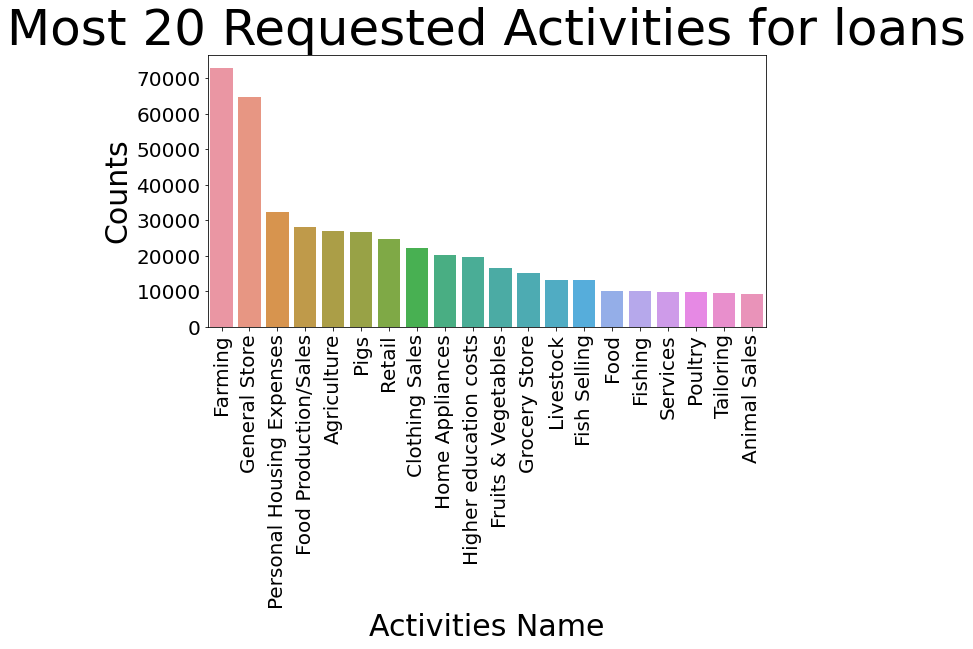

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=activity.head(20).index , y=activity.head(20).activity ,data = activity )
plt.xticks(rotation=90 ,size = 20)
plt.yticks(size = 20)
plt.title('Most 20 Requested Activities for loans', size= 50)
plt.xlabel('Activities Name' , size = 30)
plt.ylabel('Counts' , size = 30)
plt.show

**Most Higher 20 Activities Loan Amount**

In [22]:
activity_loan_amount  = df.groupby('activity')['loan_amount_convert'].sum().sort_values(ascending = False)

activity_loan_amount  = pd.DataFrame(activity_loan_amount) 
activity_loan_amount.head(5)

loan_amount_convert
activity                                   
Agriculture                    1.174223e+07
Higher education costs         1.108622e+07
Food Production/Sales          9.915535e+06
Farming                        8.965435e+06
Clothing Sales                 8.357309e+06

<function matplotlib.pyplot.show(*args, **kw)>

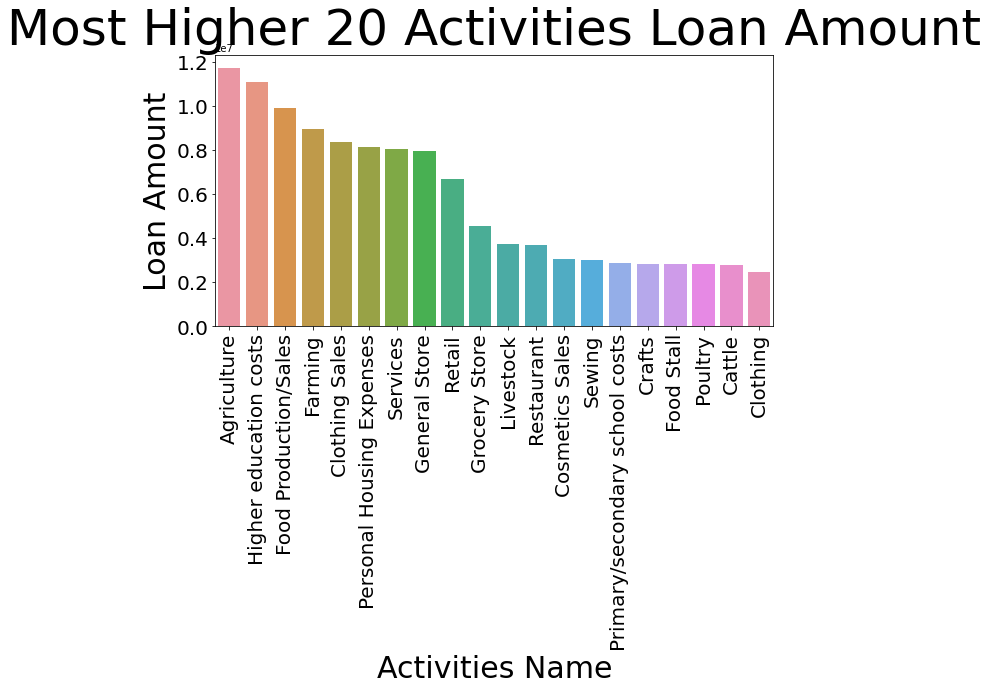

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=activity_loan_amount.head(20).index , y=activity_loan_amount.head(20).loan_amount_convert ,data = activity_loan_amount )
plt.xticks(rotation=90 ,size = 20)
plt.yticks(size = 20)
plt.title('Most Higher 20 Activities Loan Amount', size= 50)
plt.xlabel('Activities Name' , size = 30)
plt.ylabel('Loan Amount' , size = 30)
plt.show

Sector which need loans

In [24]:
print(df.sector.unique())
print("\n")
print(len(df.sector.unique()))

['Food' 'Transportation' 'Arts' 'Services' 'Agriculture' 'Manufacturing'
 'Wholesale' 'Retail' 'Clothing' 'Construction' 'Health' 'Education'
 'Personal Use' 'Housing' 'Entertainment']


15


In [25]:
sector = pd.DataFrame(df.sector.value_counts(ascending=False)) 
sector

sector
Agriculture     180302
Food            136657
Retail          124494
Services         45140
Personal Use     36385
Housing          33731
Clothing         32742
Education        31013
Transportation   15518
Arts             12060
Health            9223
Construction      6268
Manufacturing     6208
Entertainment      830
Wholesale          634

<function matplotlib.pyplot.show(*args, **kw)>

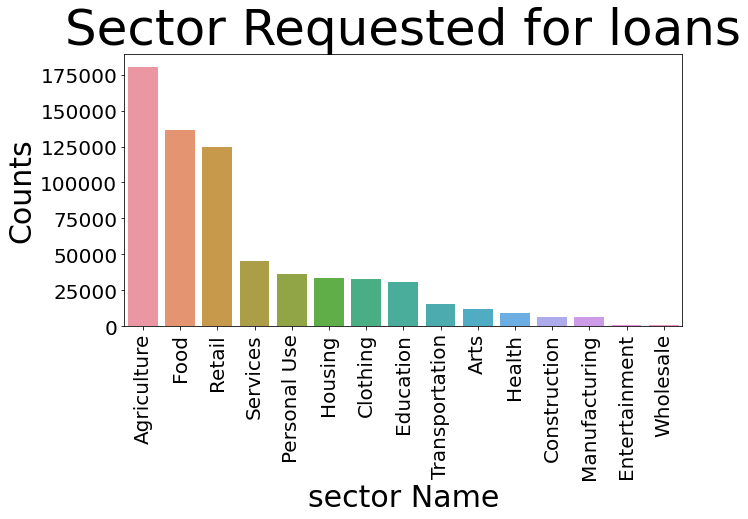

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=sector.index , y=sector.sector ,data = sector )
plt.xticks(rotation=90 ,size = 20)
plt.yticks(size = 20)
plt.title('Sector Requested for loans', size= 50)
plt.xlabel('sector Name' , size = 30)
plt.ylabel('Counts' , size = 30)
plt.show

Most Higher Sector Loan Amount

In [27]:
sector_loan_amount  = df.groupby('sector')['loan_amount_convert'].sum().sort_values(ascending = False)

sector_loan_amount  = pd.DataFrame(sector_loan_amount) 
sector_loan_amount

loan_amount_convert
sector                             
Agriculture            3.693734e+07
Food                   3.231059e+07
Retail                 2.544794e+07
Services               2.097054e+07
Education              1.548210e+07
Clothing               1.311883e+07
Housing                8.598978e+06
Personal Use           5.184750e+06
Arts                   5.040727e+06
Transportation         3.594814e+06
Health                 3.402683e+06
Construction           2.724924e+06
Manufacturing          1.907466e+06
Entertainment          9.820217e+05
Wholesale              3.972694e+05

<function matplotlib.pyplot.show(*args, **kw)>

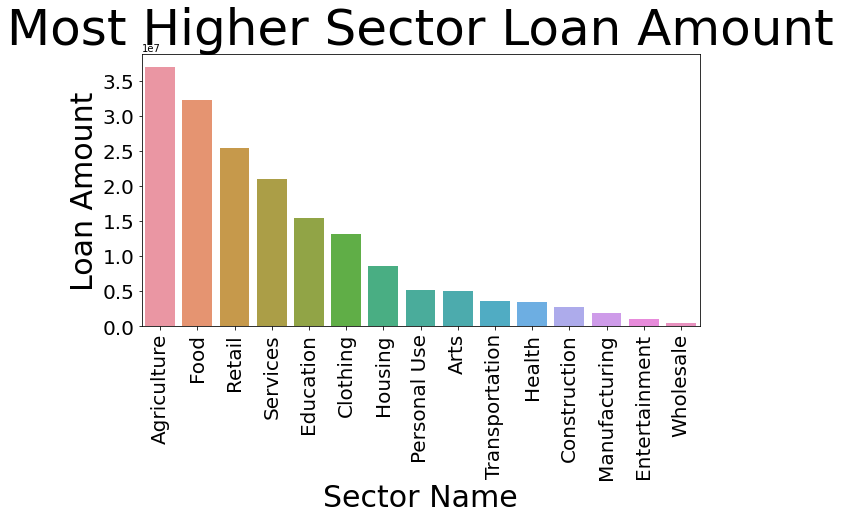

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=sector_loan_amount.index , y=sector_loan_amount.loan_amount_convert ,data = sector_loan_amount )
plt.xticks(rotation=90 ,size = 20)
plt.yticks(size = 20)
plt.title('Most Higher Sector Loan Amount', size= 50)
plt.xlabel('Sector Name' , size = 30)
plt.ylabel('Loan Amount' , size = 30)
plt.show

Most Countries Requierd Loans

In [29]:
country = df.country.value_counts(ascending = False)
country  = pd.DataFrame(country)
country.head(5)

country
Philippines   160441
Kenya          75825
El Salvador    39875
Cambodia       34836
Pakistan       26857

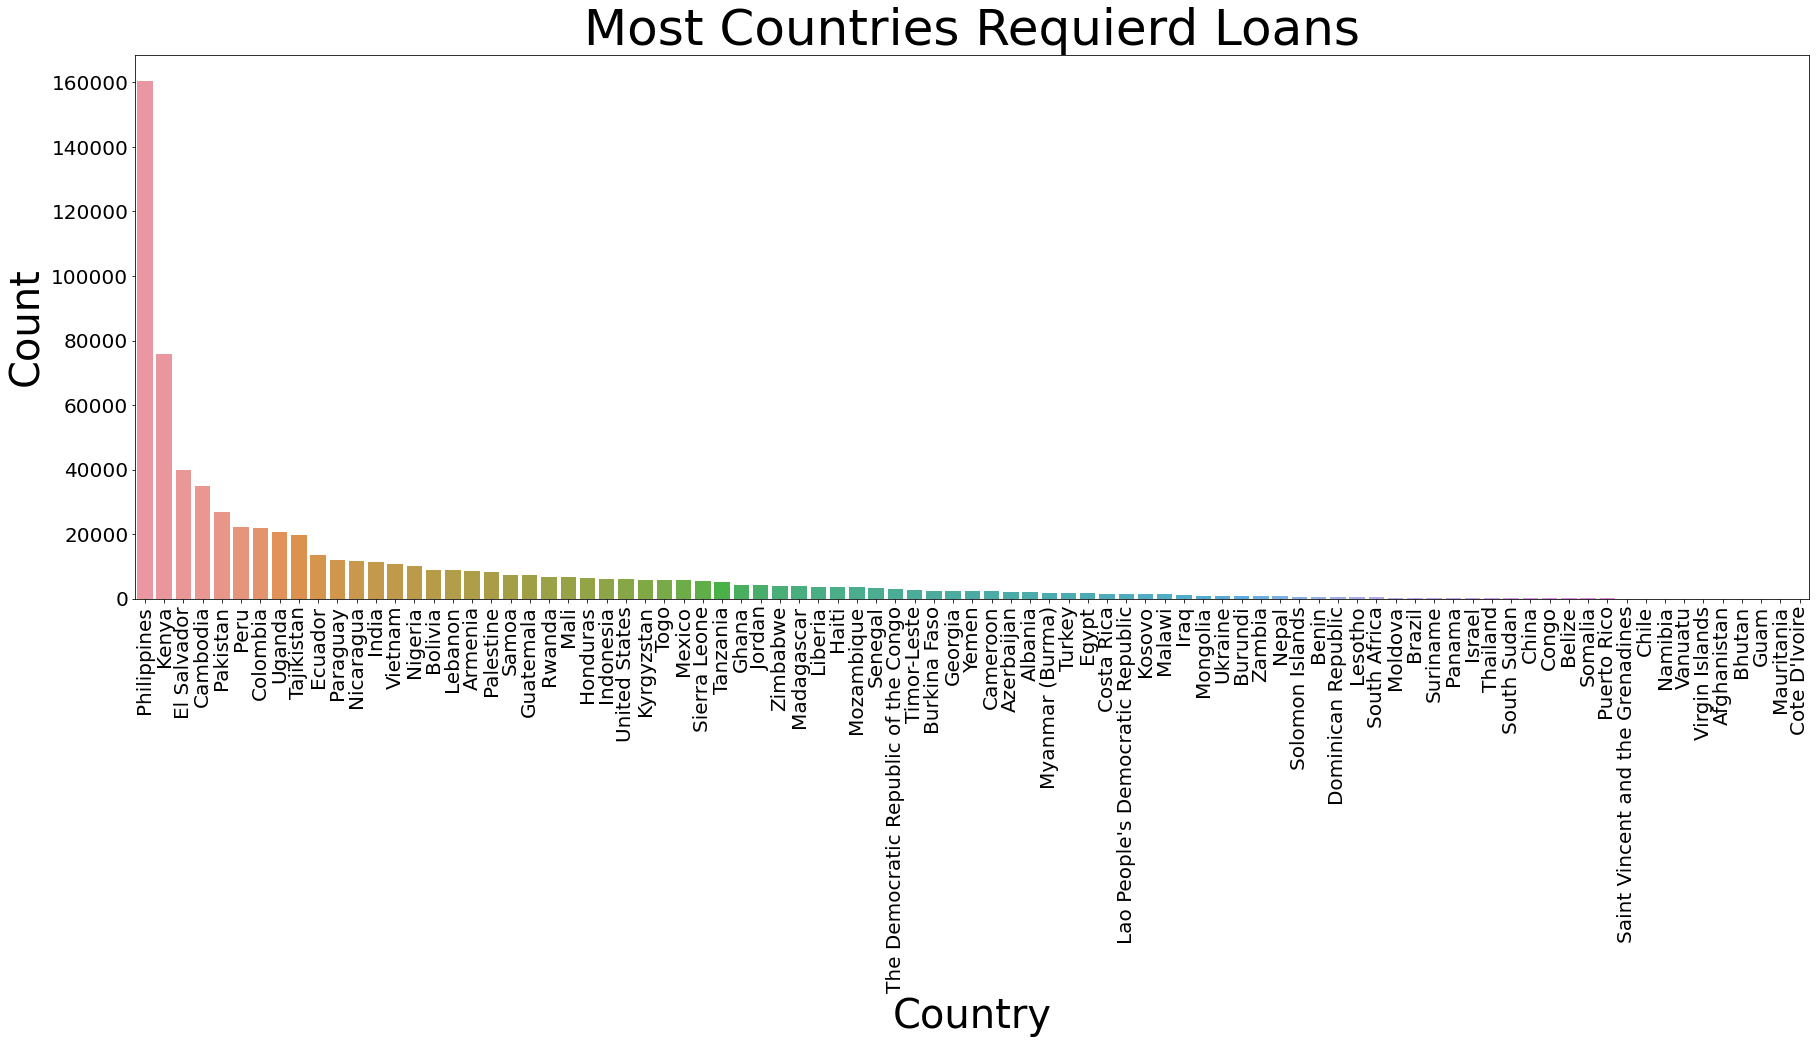

In [30]:
fig , ax = plt.subplots(figsize = (30,10))
sns.barplot(x=country.index , y = country.country , data = country)
plt.title("Most Countries Requierd Loans" , size = 50)
plt.xticks(rotation = 90,size= 20)
plt.yticks(size = 20)
plt.xlabel("Country",size = 40)
plt.ylabel("Count",size = 40)
plt.show()

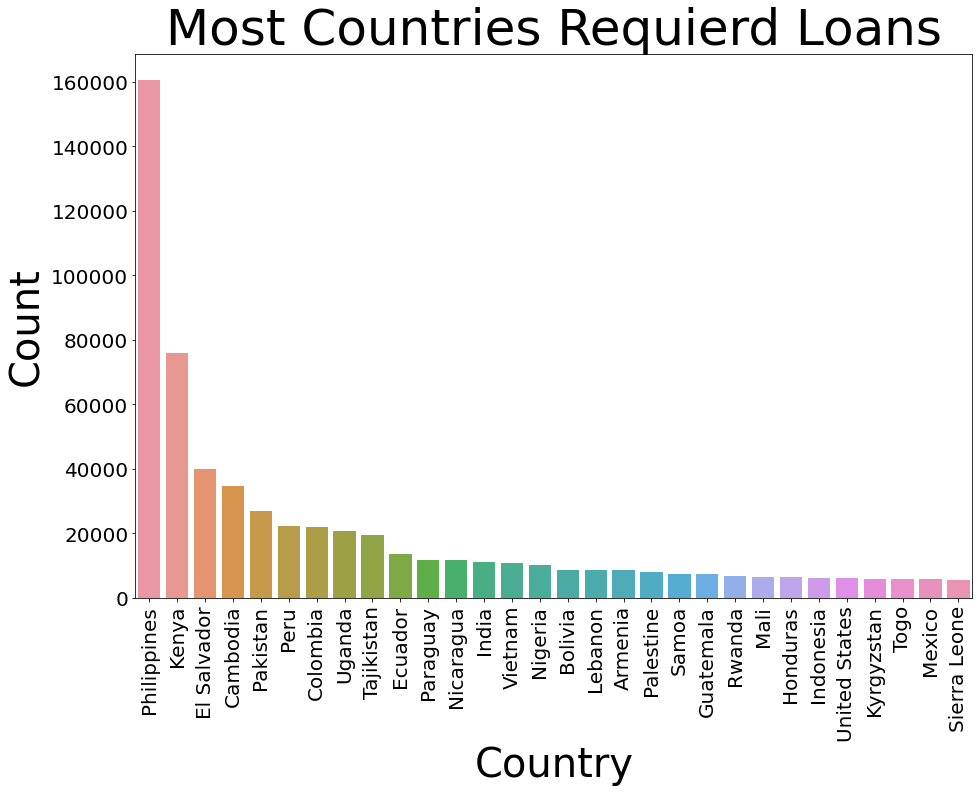

In [31]:
fig , ax = plt.subplots(figsize = (15,10))
sns.barplot(x=country.head(30).index , y = country.head(30).country , data = country)
plt.title("Most Countries Requierd Loans" , size = 50)
plt.xticks(rotation = 90,size= 20)
plt.yticks(size = 20)
plt.xlabel("Country",size = 40)
plt.ylabel("Count",size = 40)
plt.show()

Most Higher Countries Loans

In [32]:
country_loan_amount = df.groupby('country')['loan_amount_convert'].sum().sort_values(ascending = False)
country_loan_amount  = pd.DataFrame(country_loan_amount)
country_loan_amount.head(5)

loan_amount_convert
country                                                  
United States                                  31496375.0
El Salvador                                    26603650.0
Ecuador                                        15000275.0
Palestine                                      13076451.5
The Democratic Republic of the Congo           11261150.0

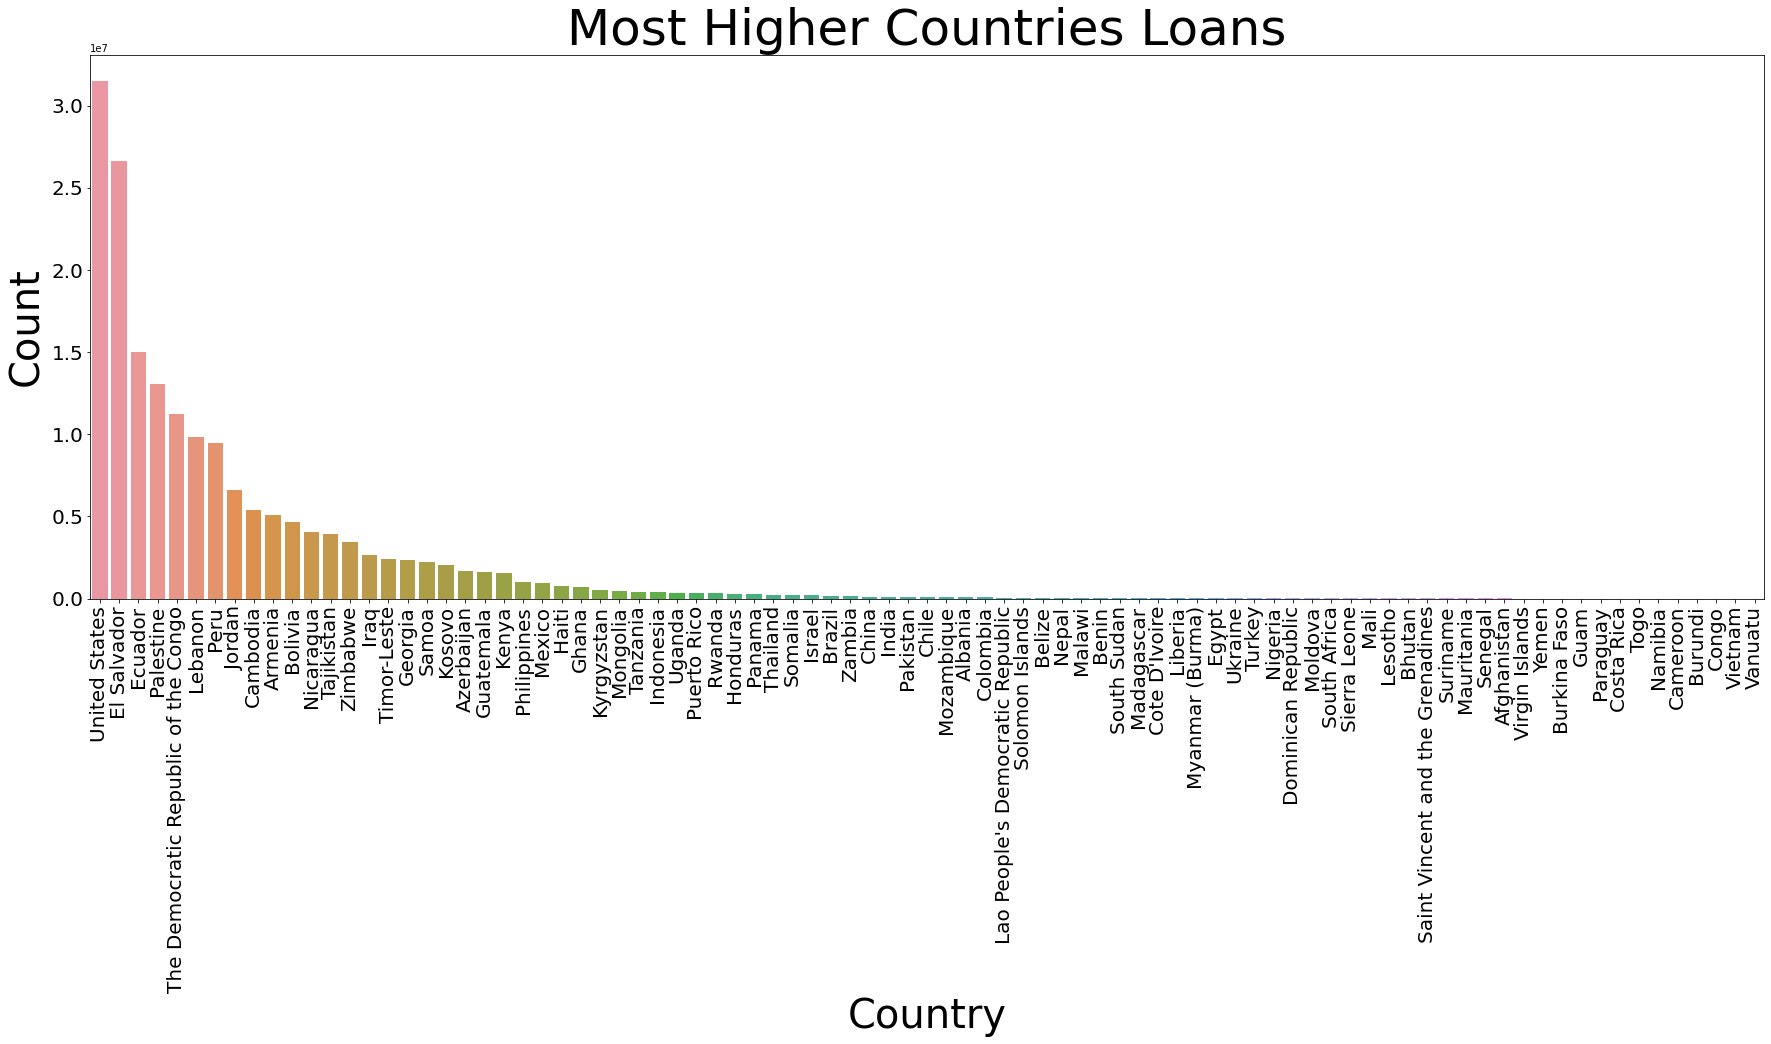

In [33]:
fig , ax = plt.subplots(figsize = (30,10))
sns.barplot(x=country_loan_amount.index , y = country_loan_amount.loan_amount_convert , data = country_loan_amount)
plt.title("Most Higher Countries Loans" , size = 50)
plt.xticks(rotation = 90,size= 20)
plt.yticks(size = 20)
plt.xlabel("Country",size = 40)
plt.ylabel("Count",size = 40)
plt.show()

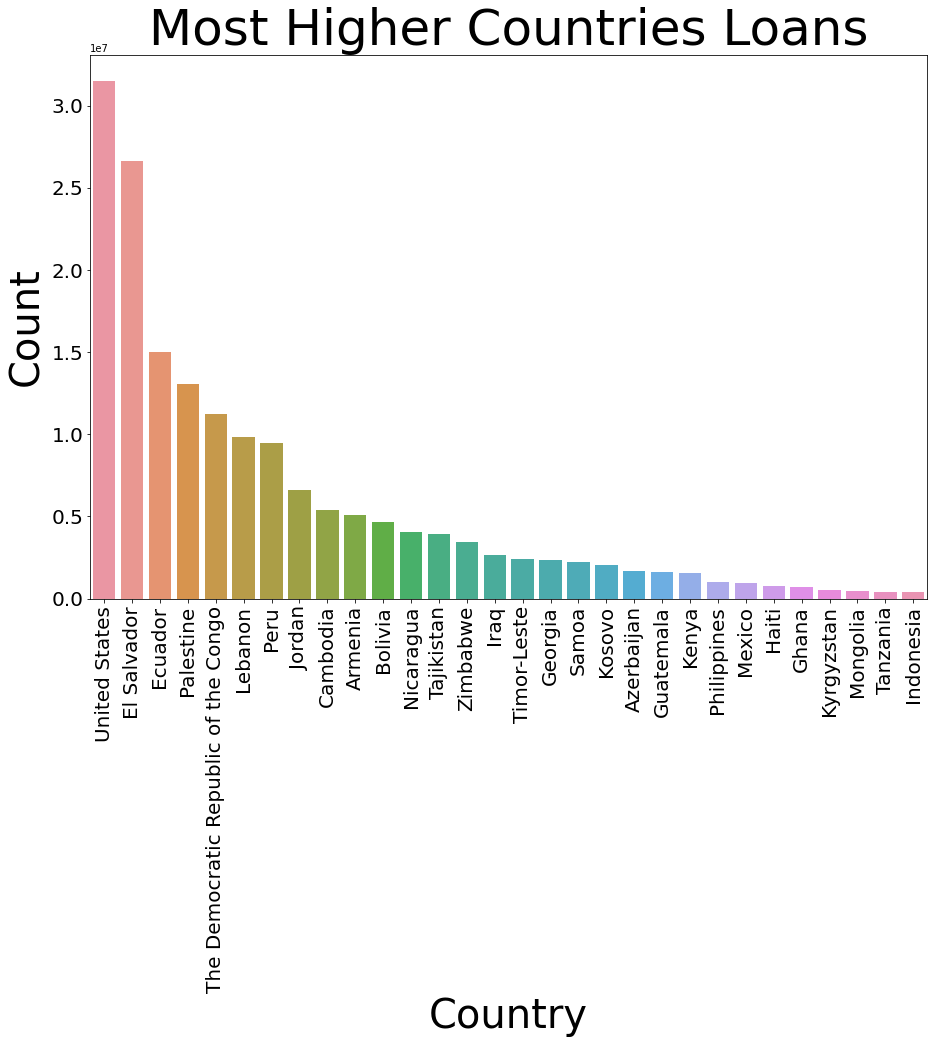

In [34]:
fig , ax = plt.subplots(figsize = (15,10))
sns.barplot(x=country_loan_amount.head(30).index , y = country_loan_amount.head(30).loan_amount_convert , data = country_loan_amount)
plt.title("Most Higher Countries Loans" , size = 50)
plt.xticks(rotation = 90,size= 20)
plt.yticks(size = 20)
plt.xlabel("Country",size = 40)
plt.ylabel("Count",size = 40)
plt.show()

In [35]:
country_loan_amount = df.groupby(['country','sector'])['loan_amount_convert'].sum().sort_values(ascending = False)
country_loan_amount  = pd.DataFrame(country_loan_amount)
country_loan_amount

loan_amount_convert
country                          sector                            
United States                    Services              9.420300e+06
El Salvador                      Agriculture           9.355075e+06
United States                    Food                  7.209975e+06
El Salvador                      Food                  5.510775e+06
Ecuador                          Agriculture           5.194875e+06
...                                                             ...
Paraguay                         Entertainment         1.365000e-01
Sierra Leone                     Wholesale             1.265000e-01
Indonesia                        Entertainment         1.040000e-01
Lao People's Democratic Republic Housing               6.815000e-02
Indonesia                        Wholesale             6.175000e-02

[990 rows x 1 columns]

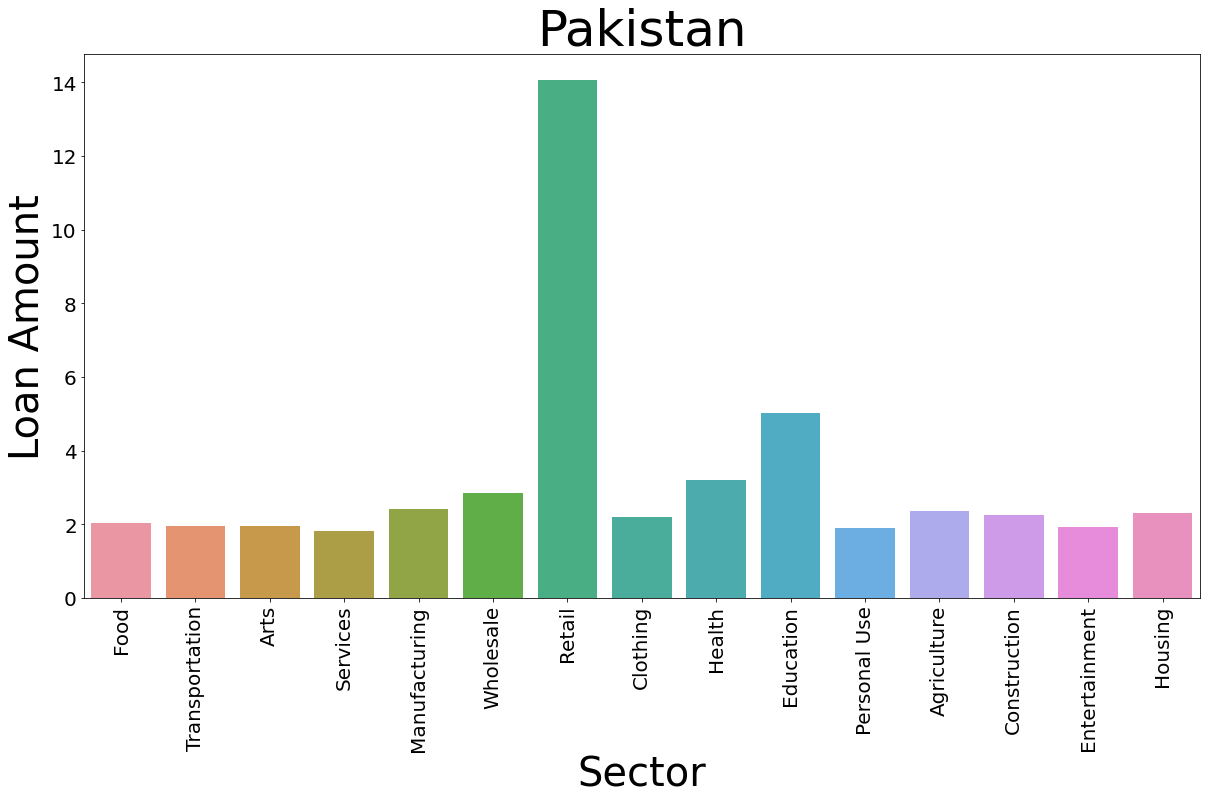

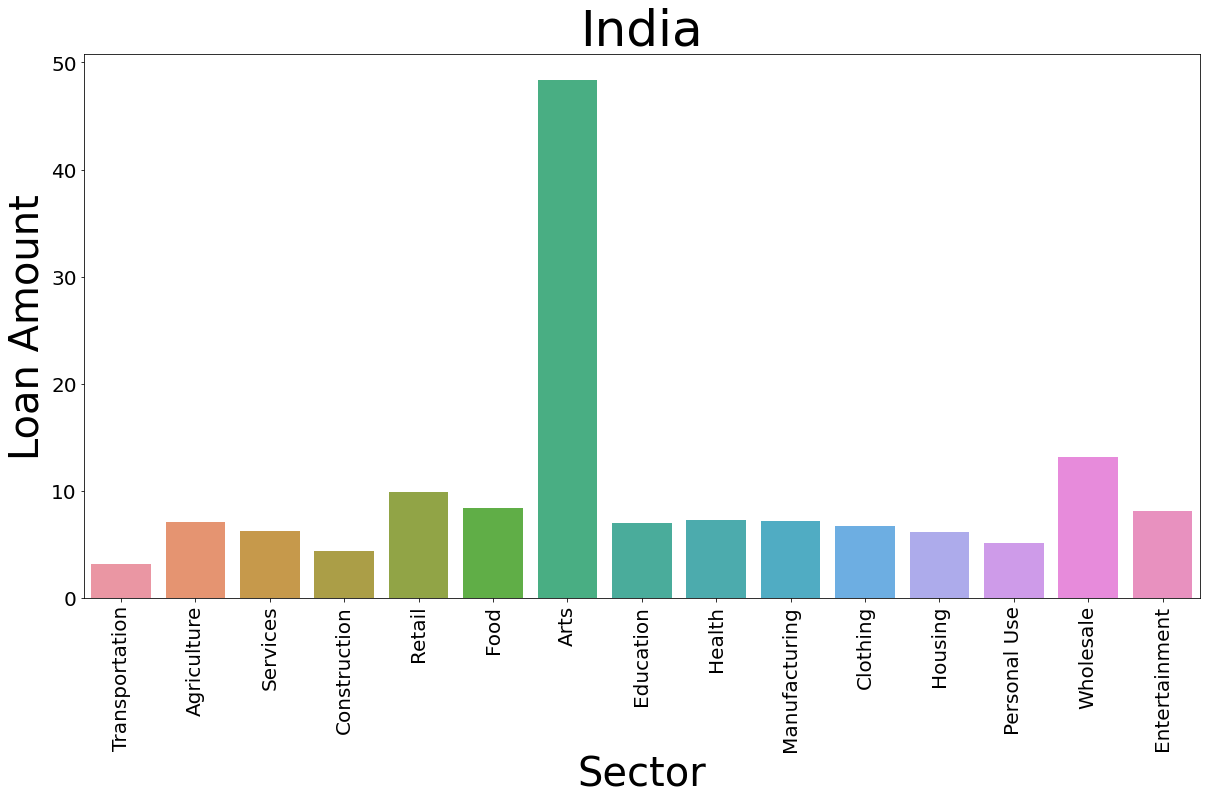

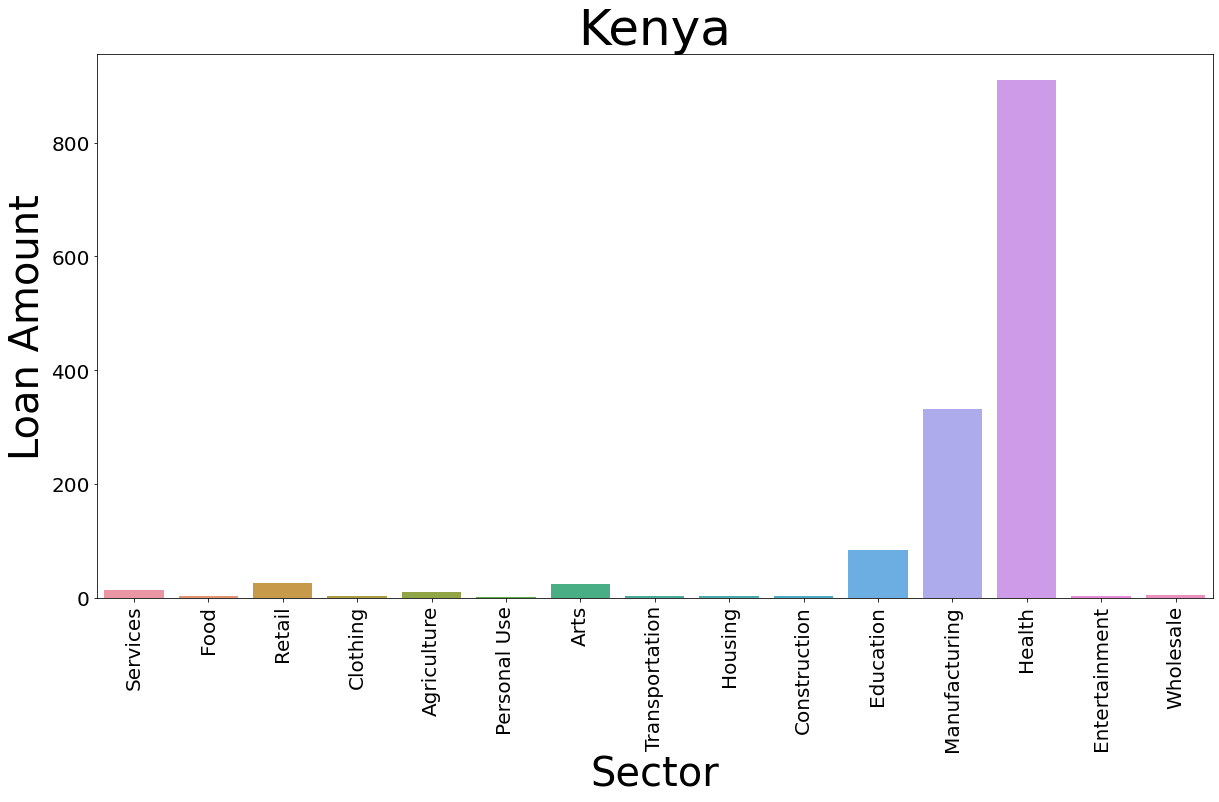

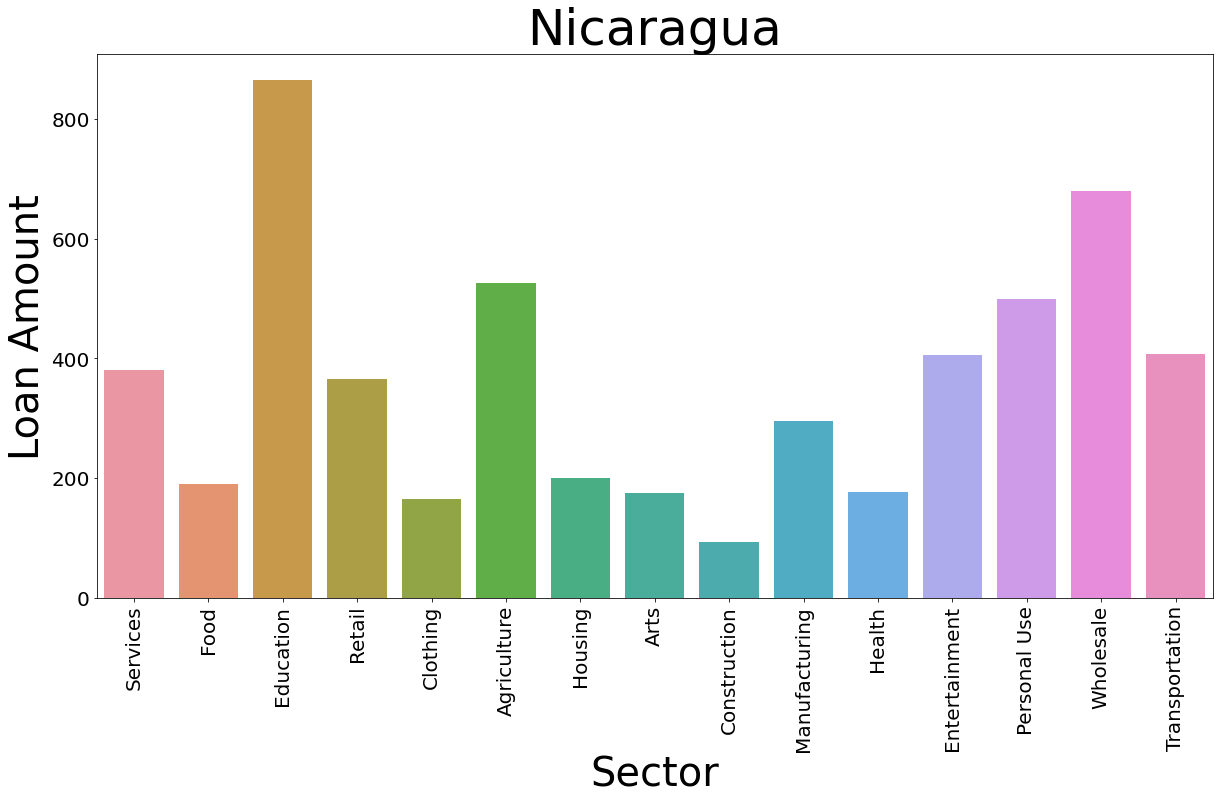

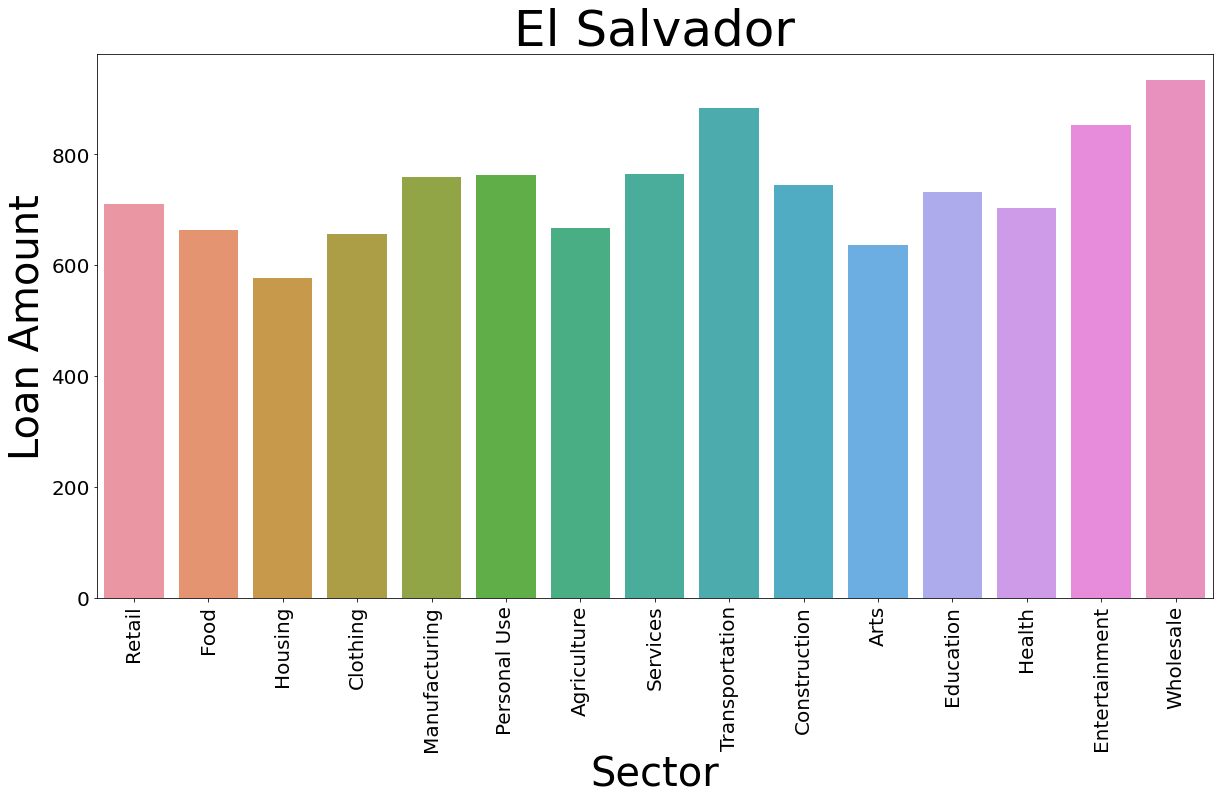

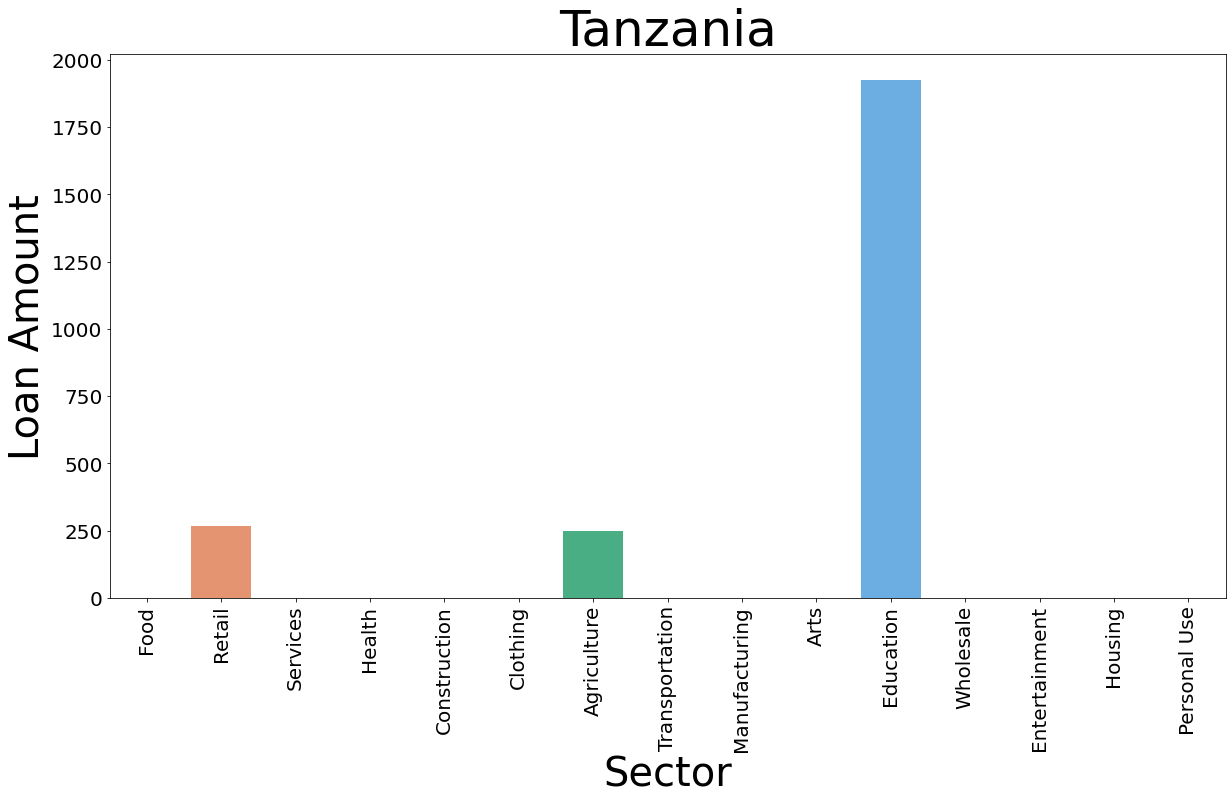

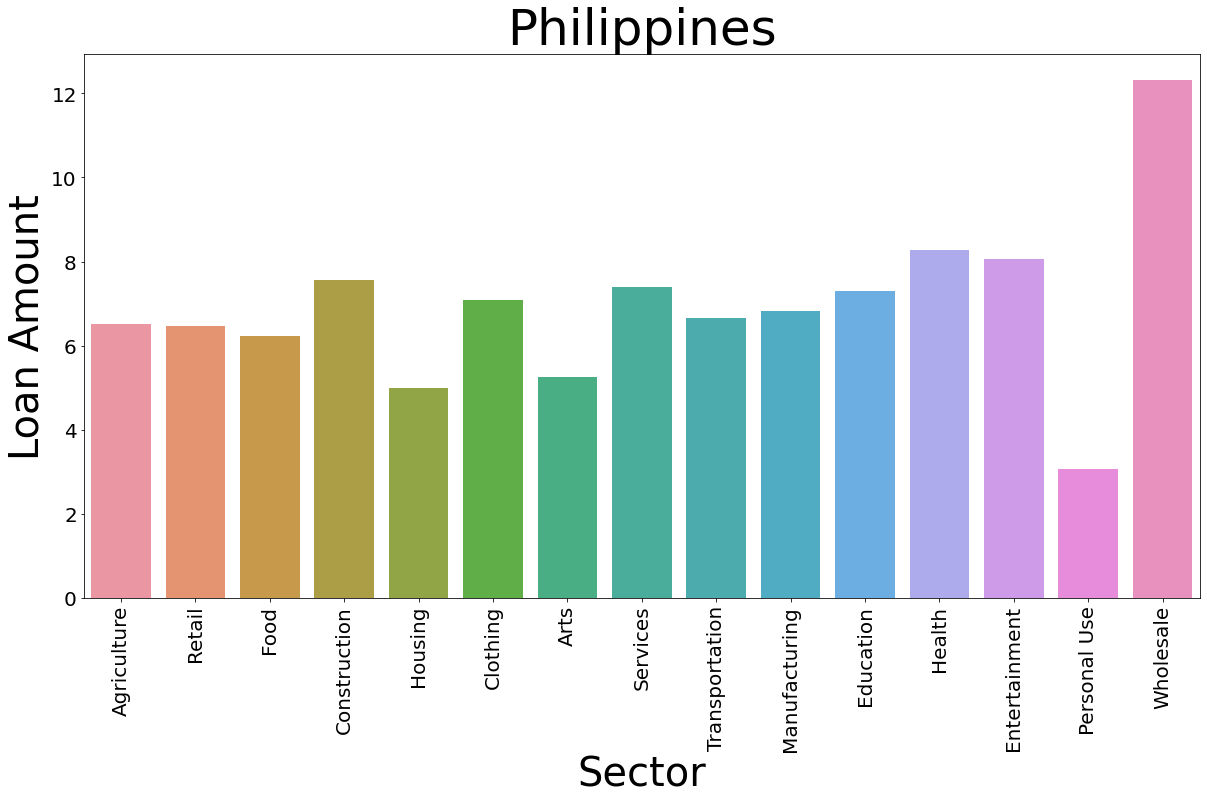

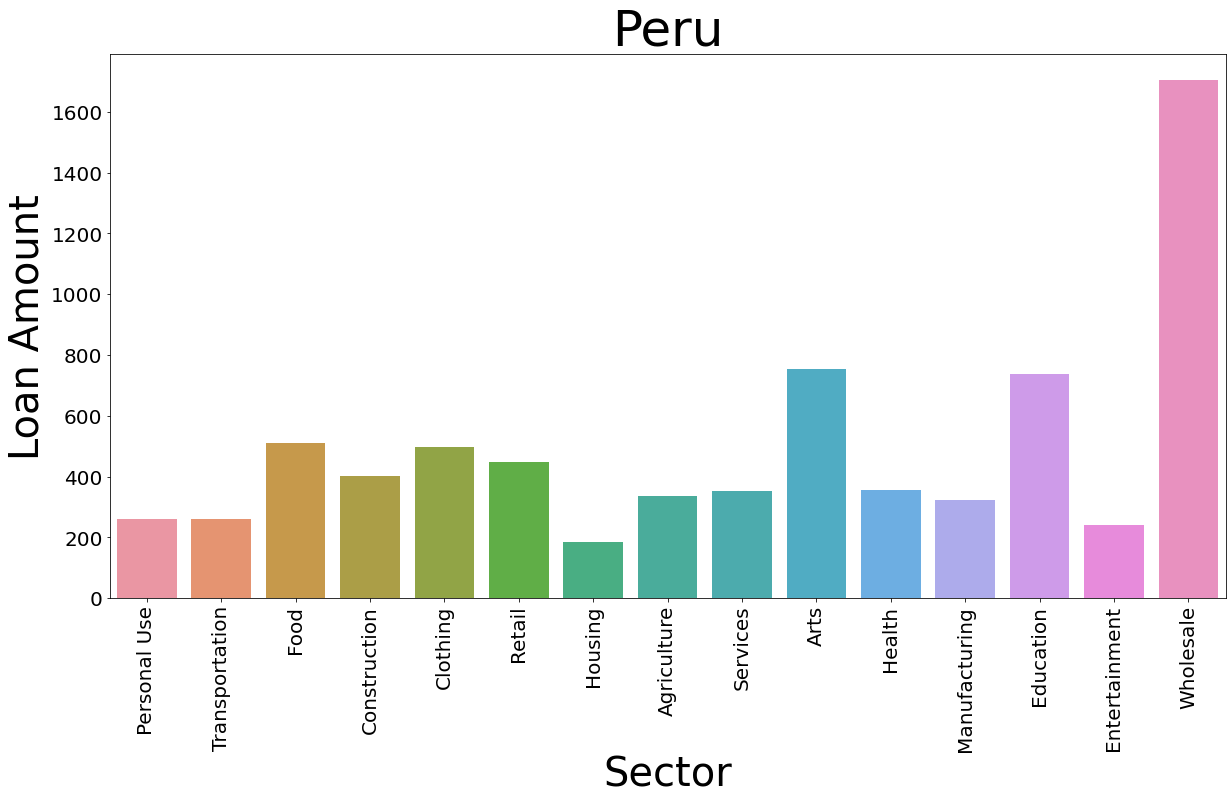

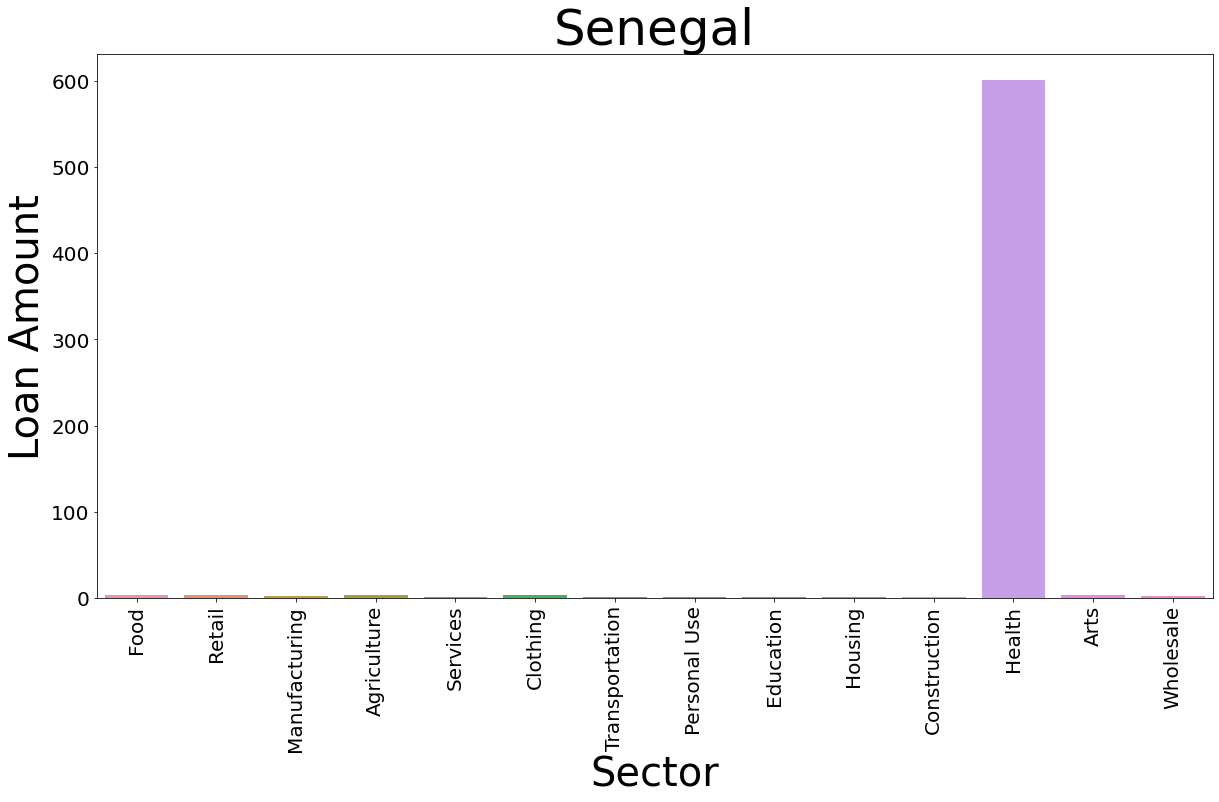

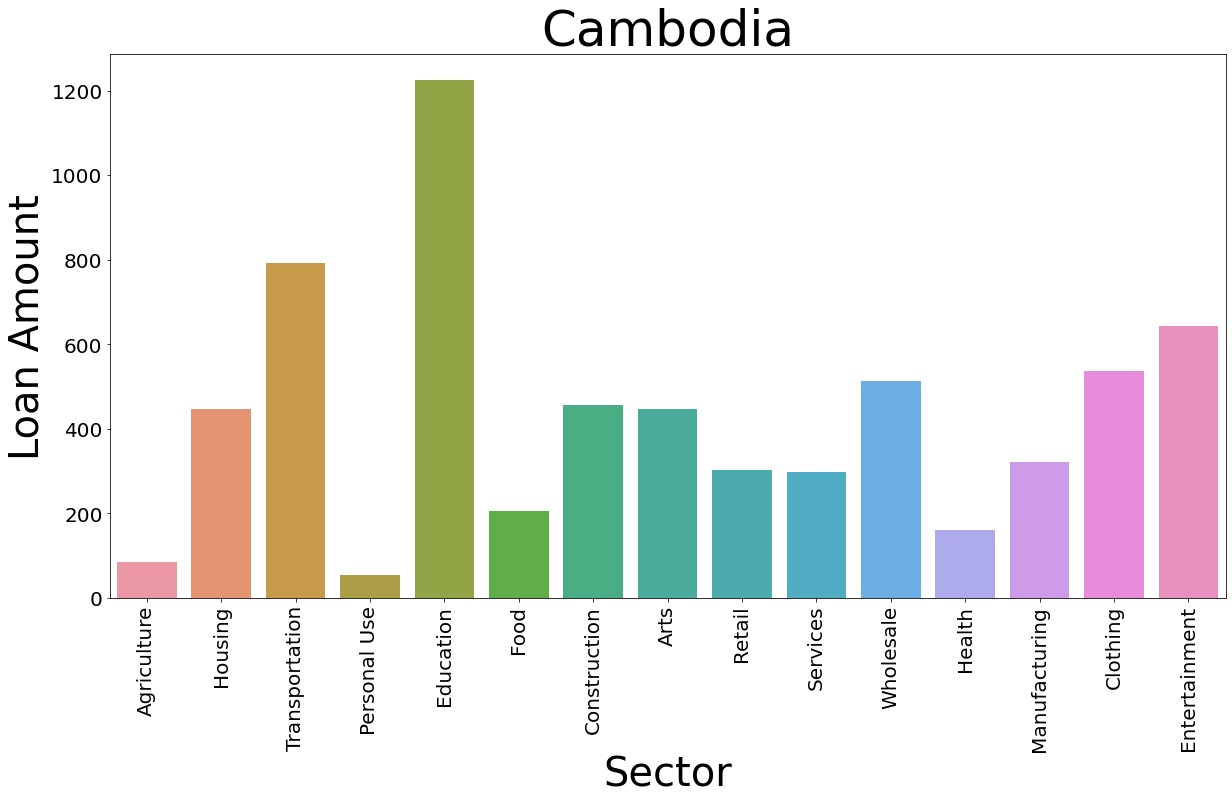

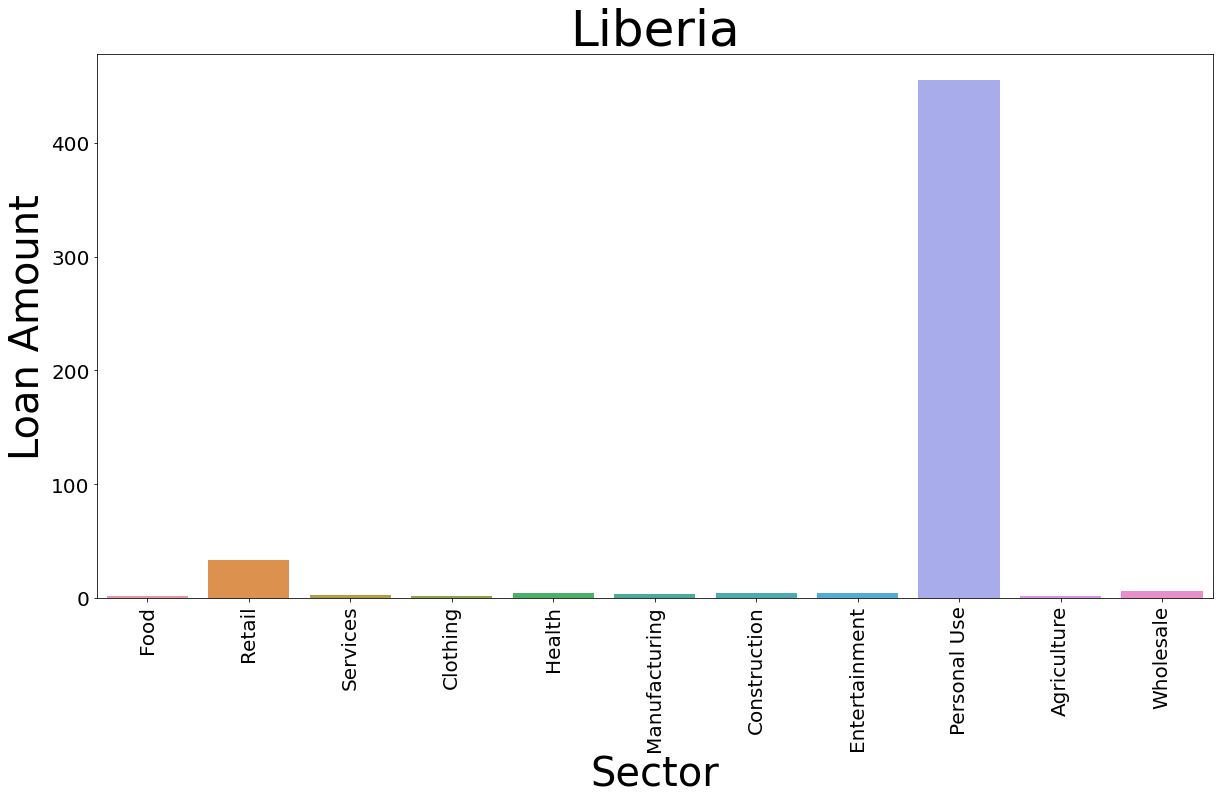

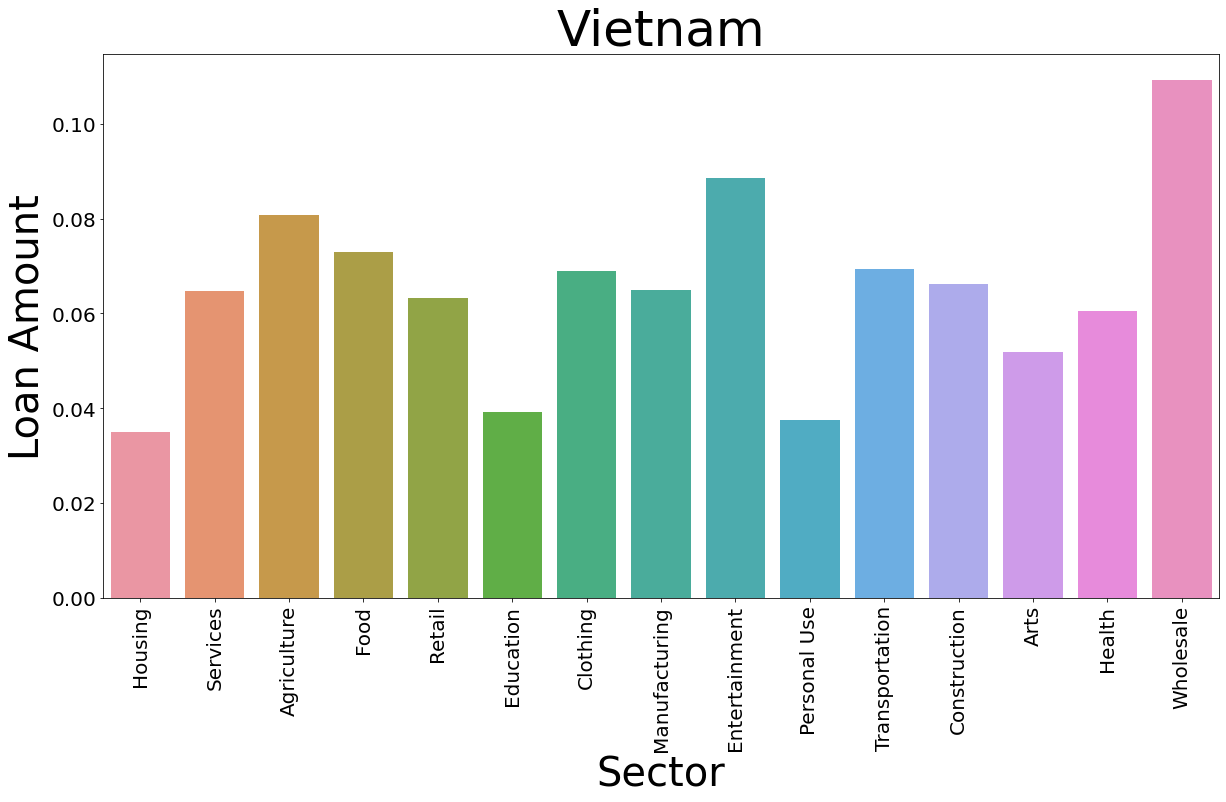

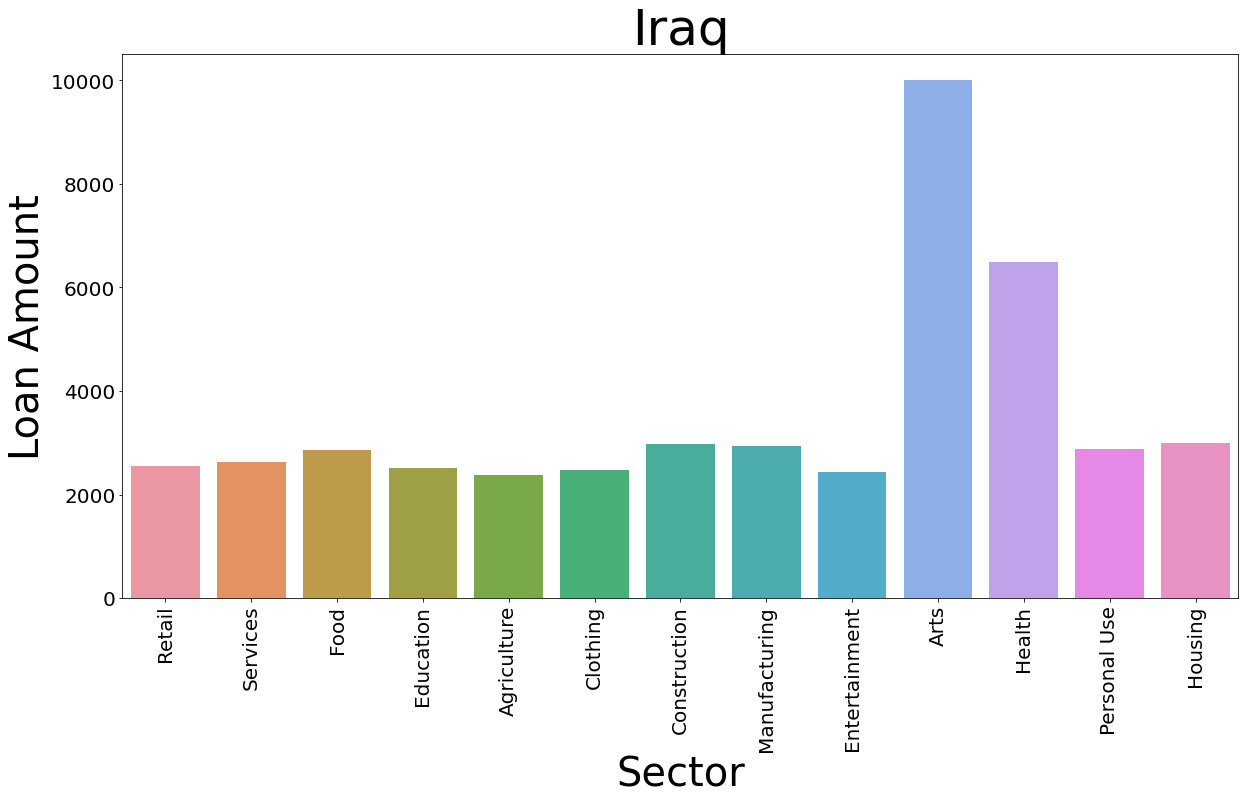

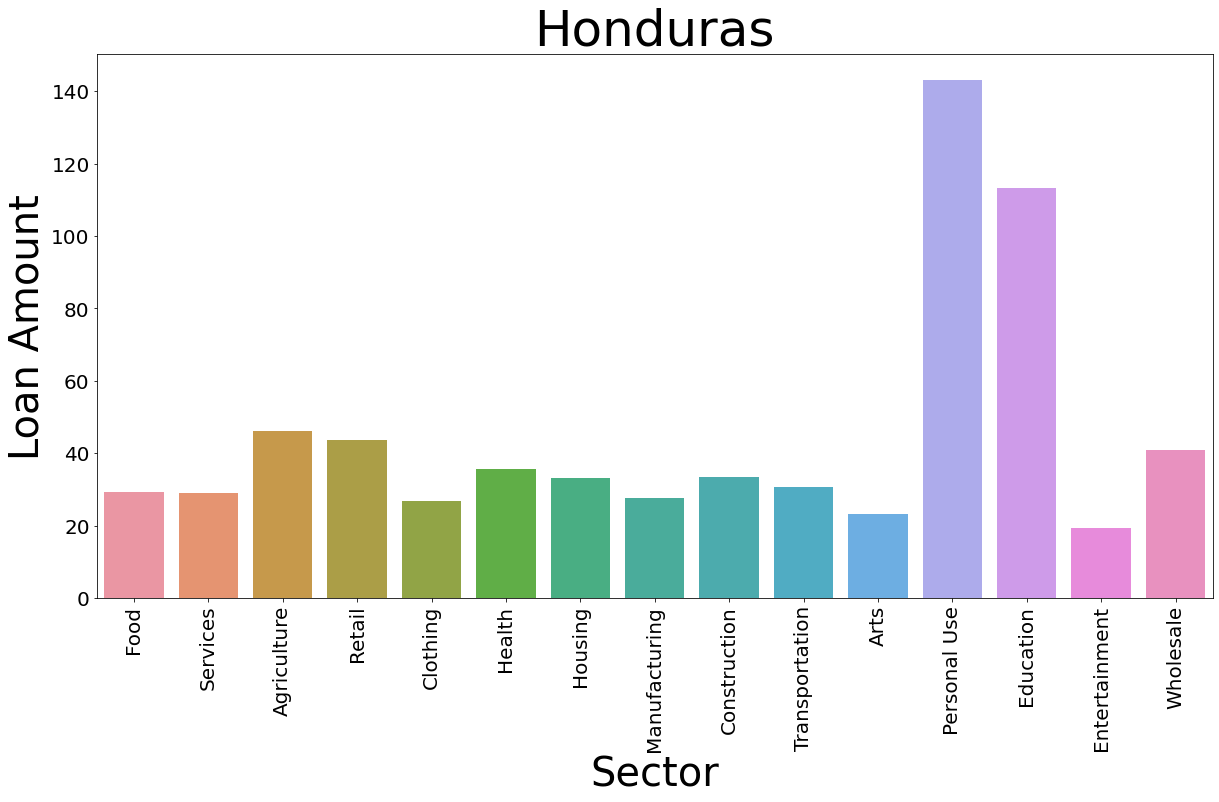

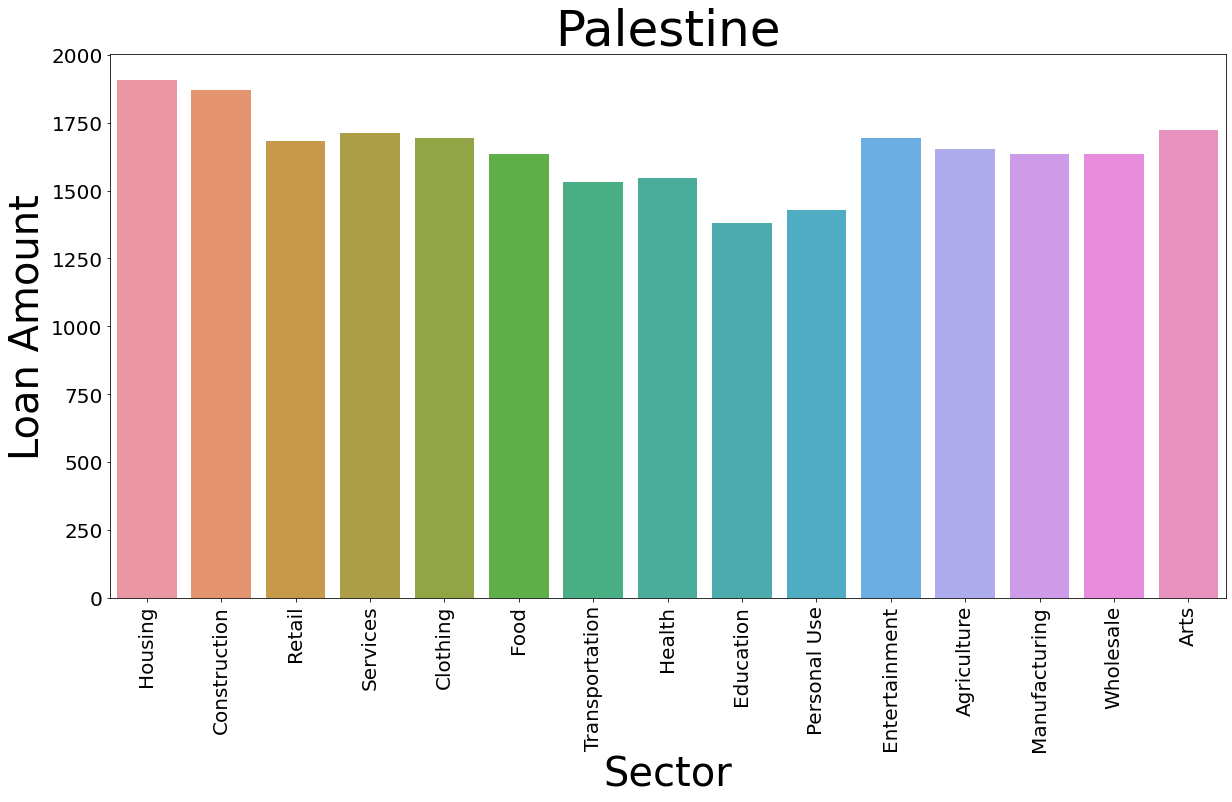

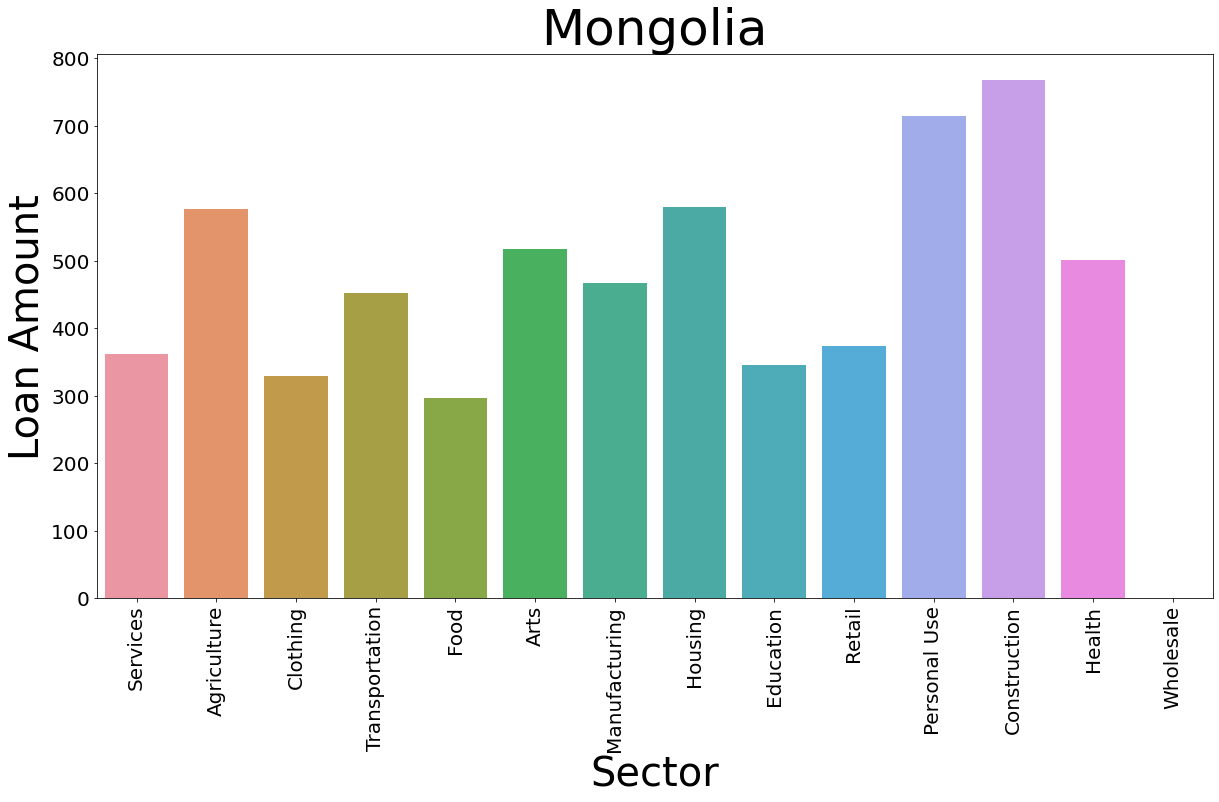

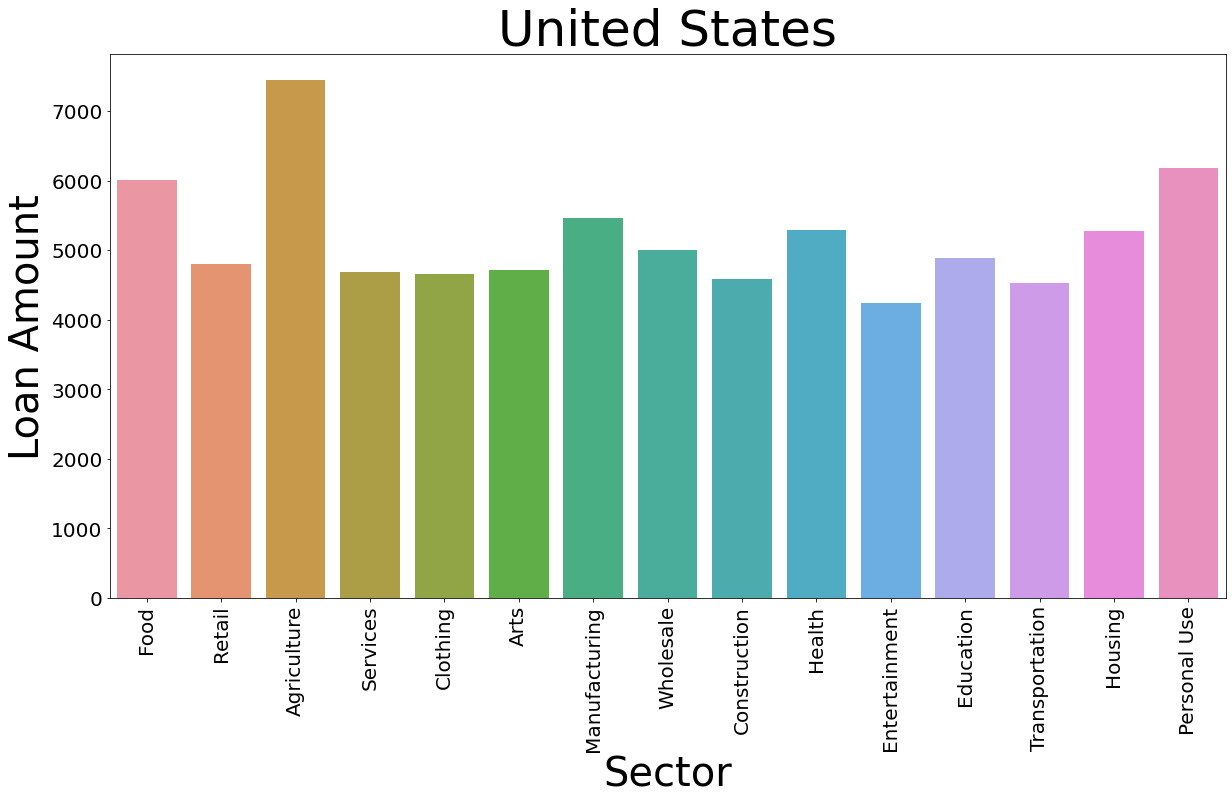

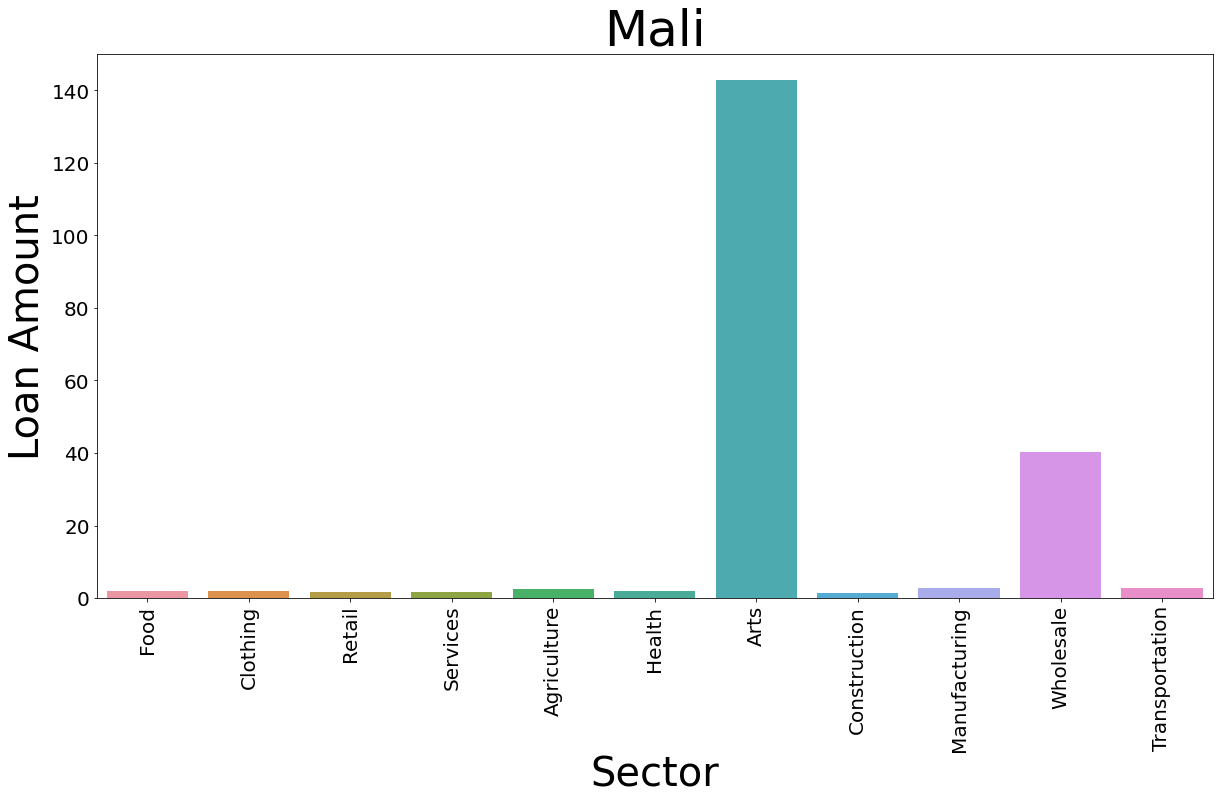

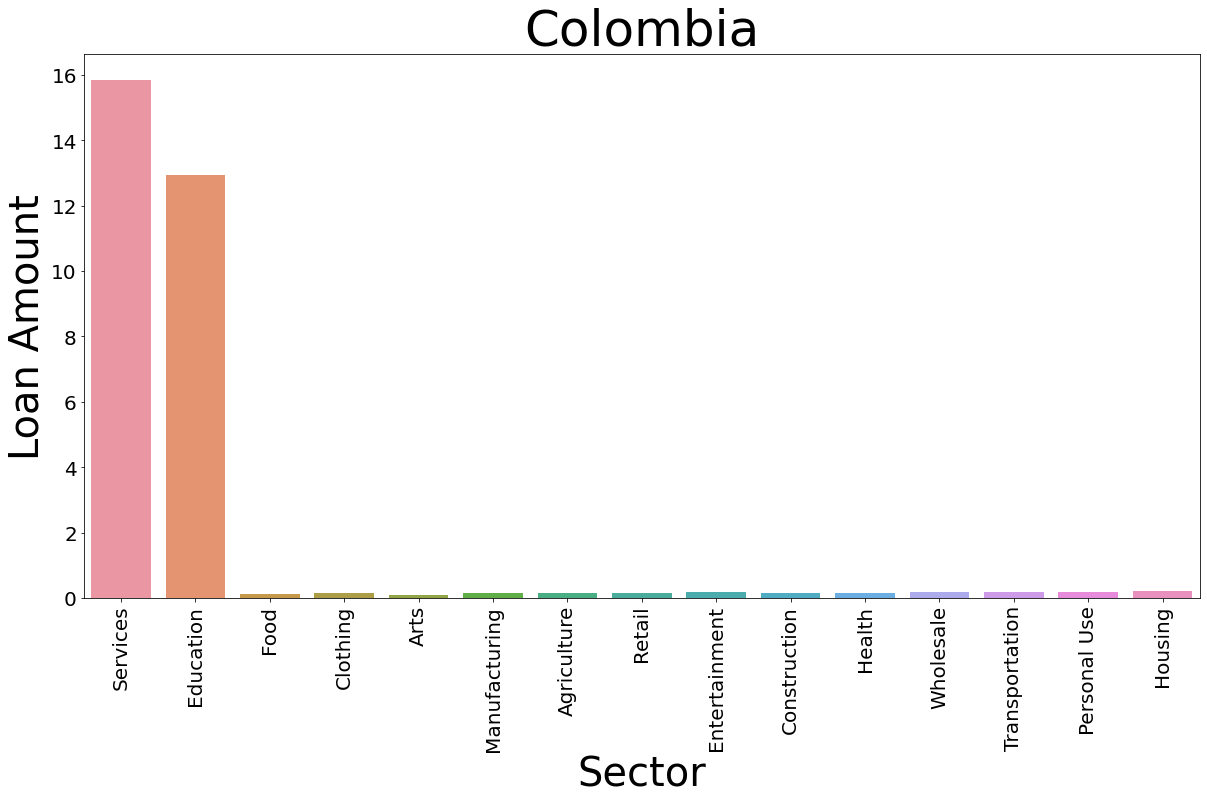

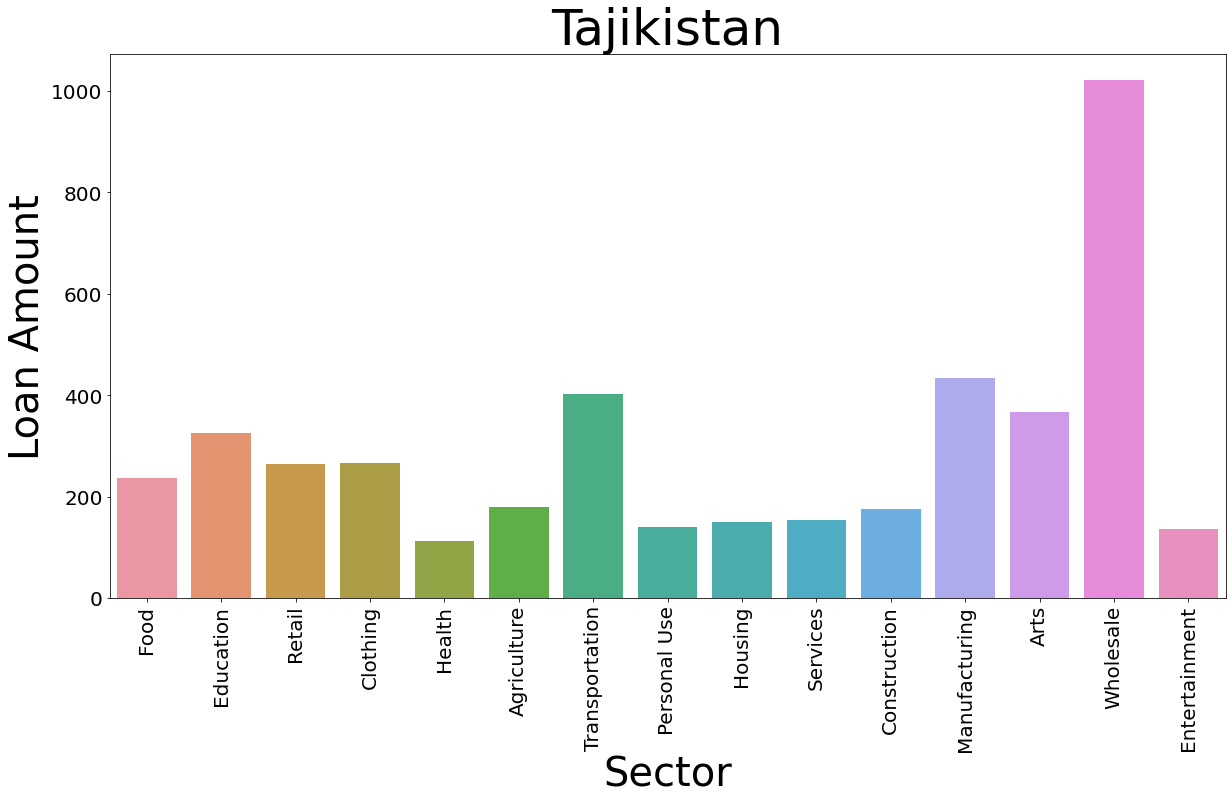

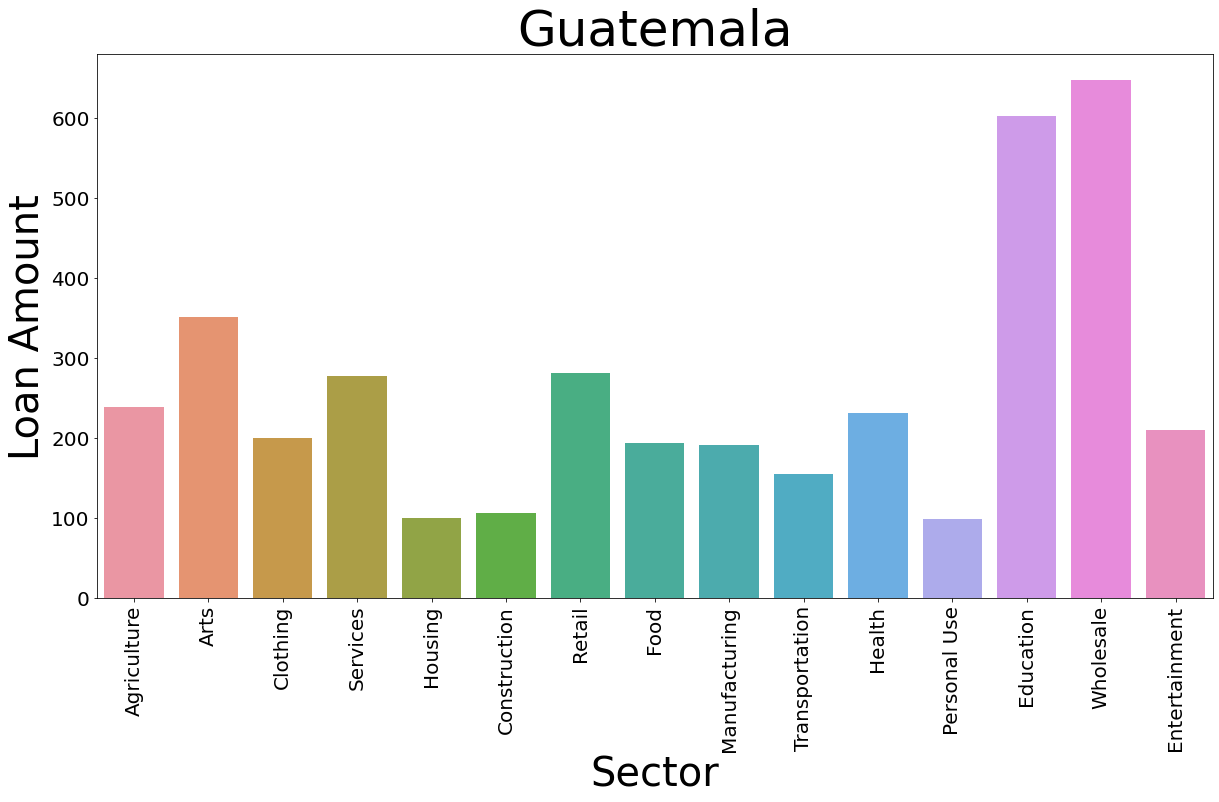

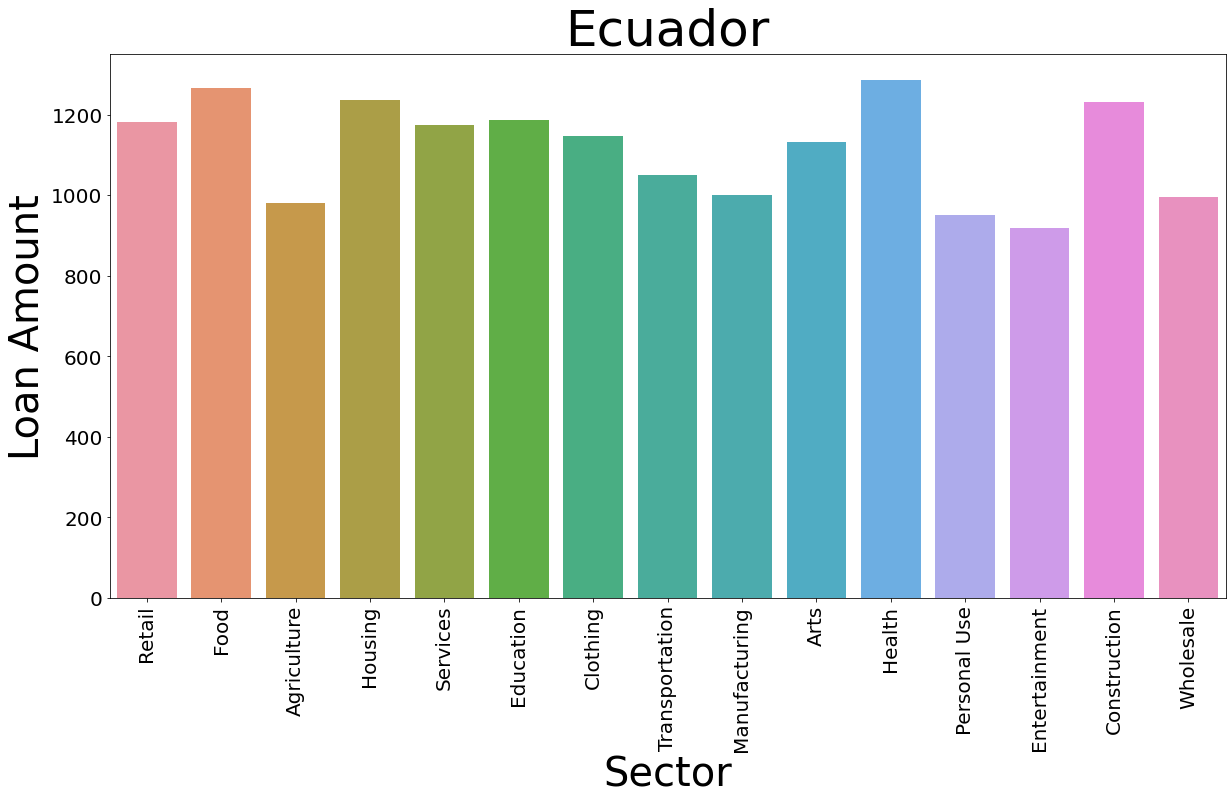

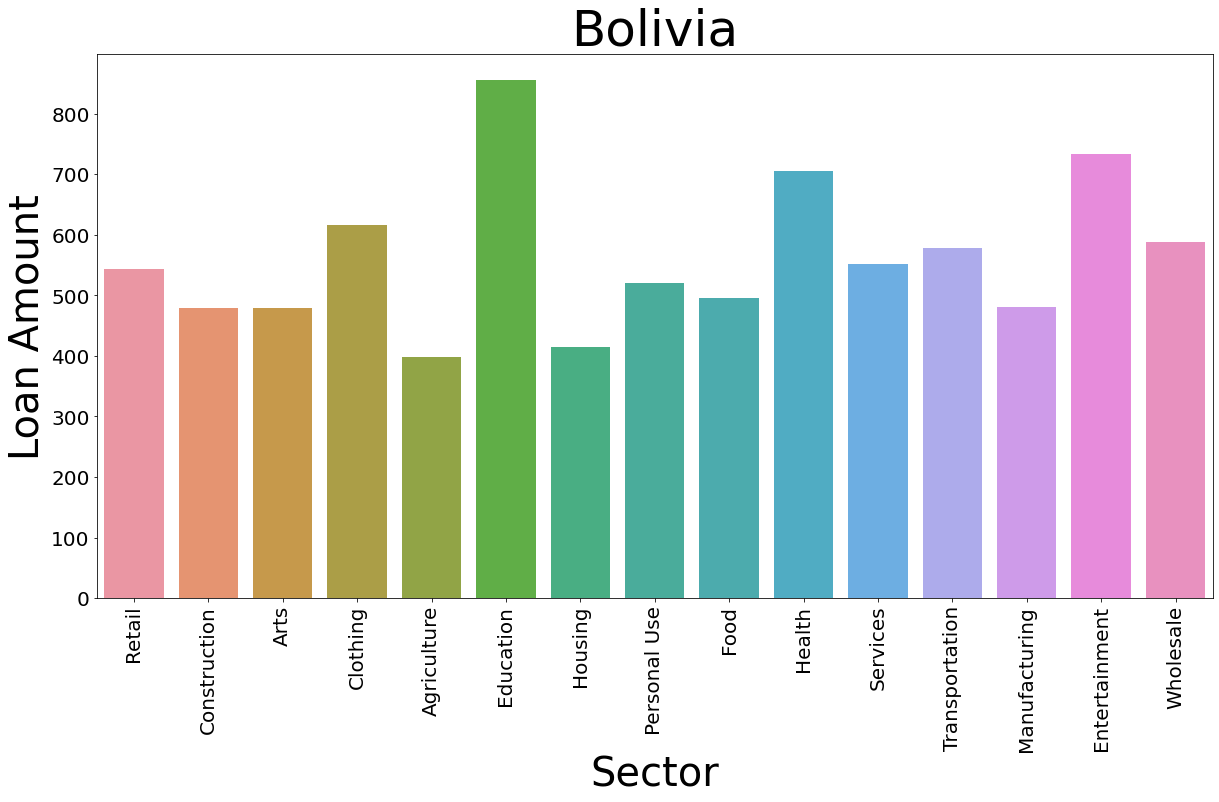

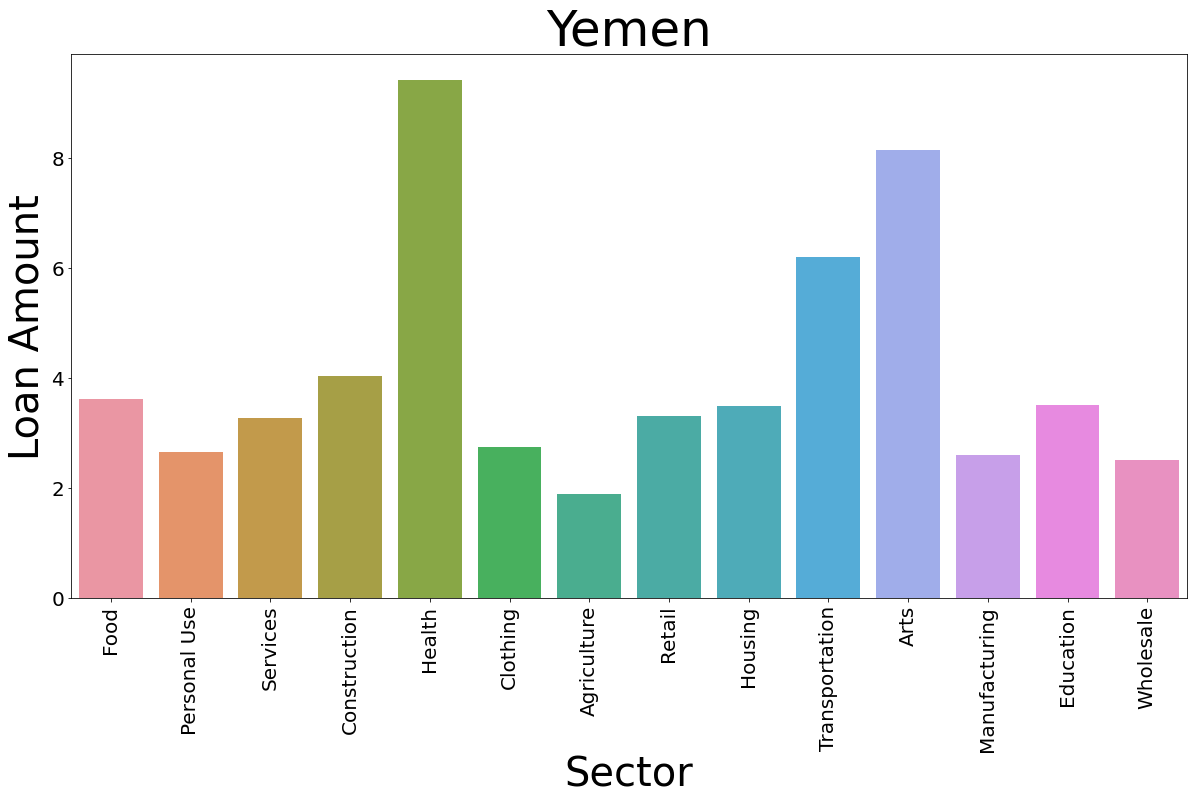

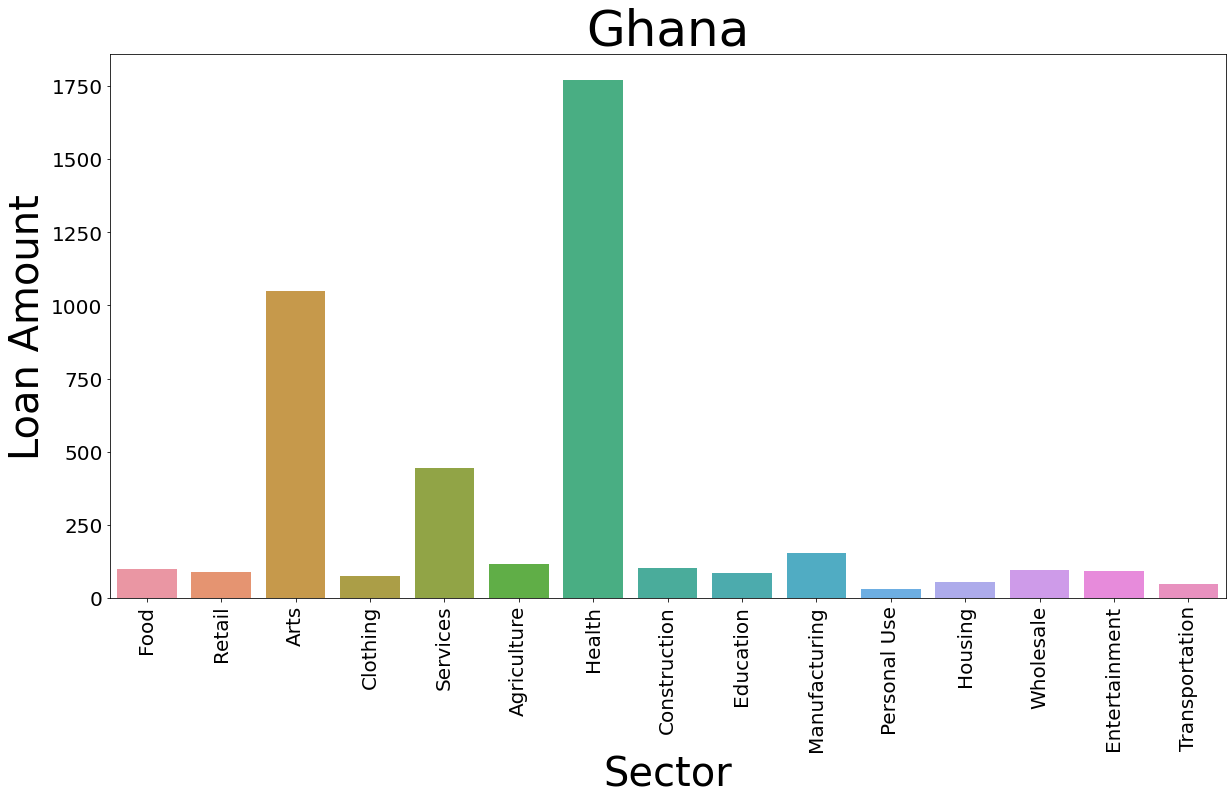

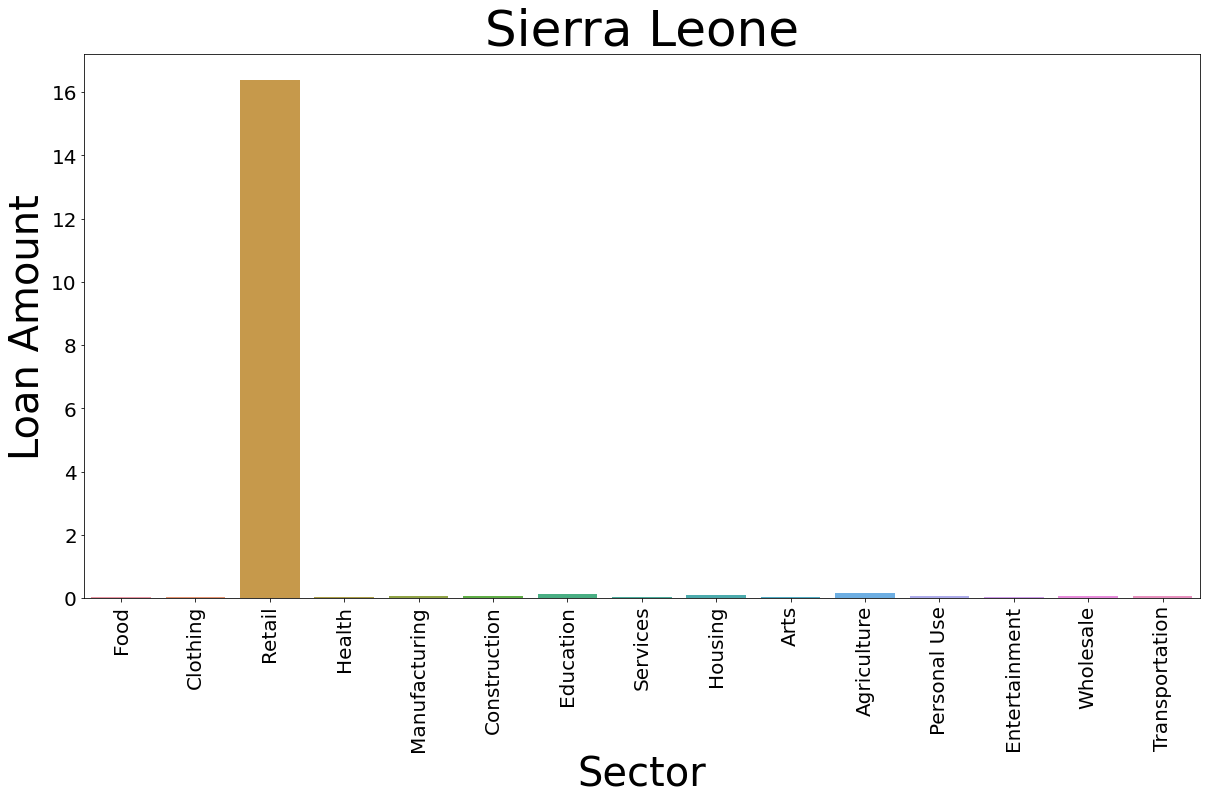

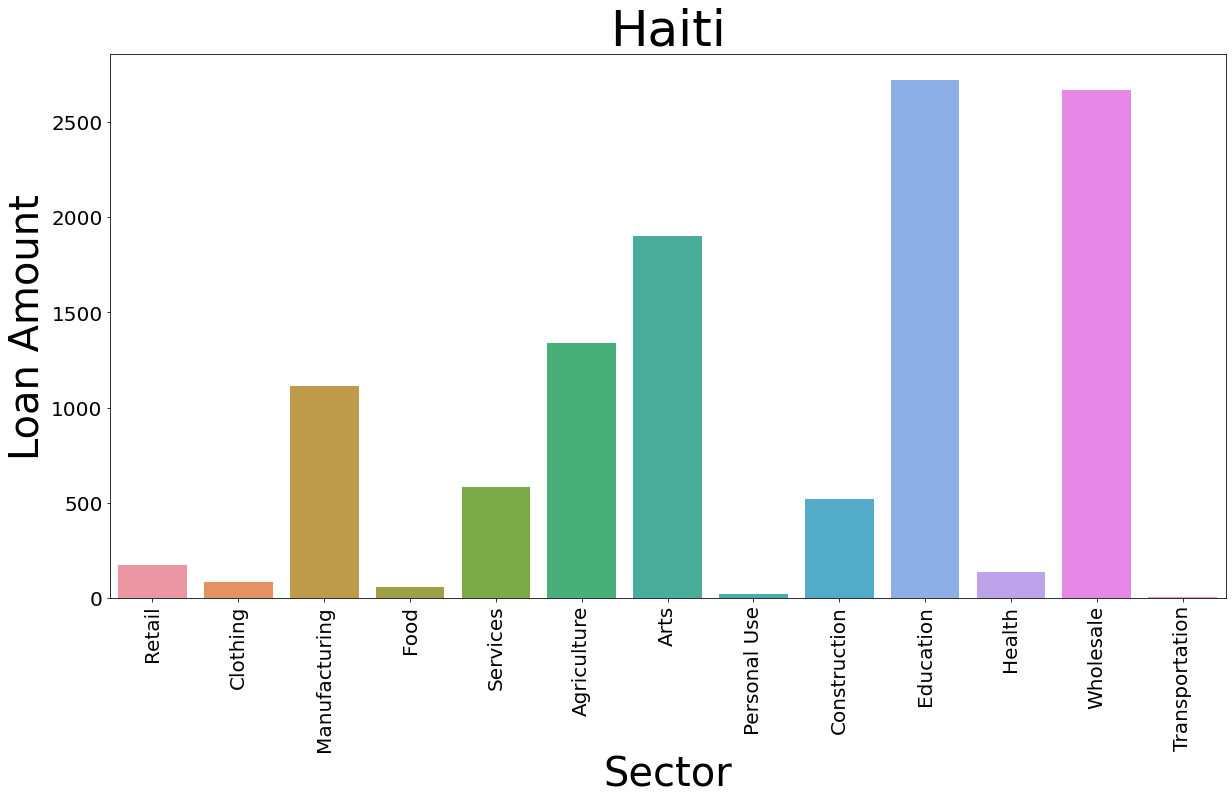

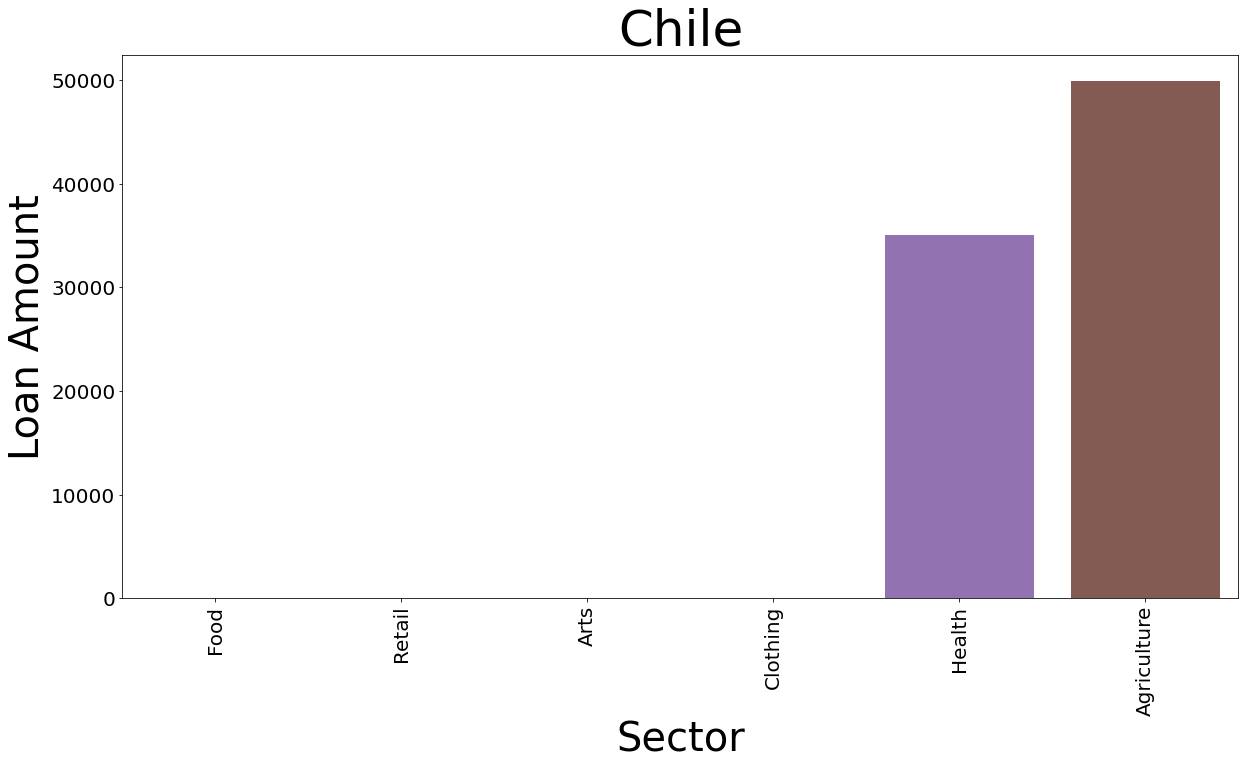

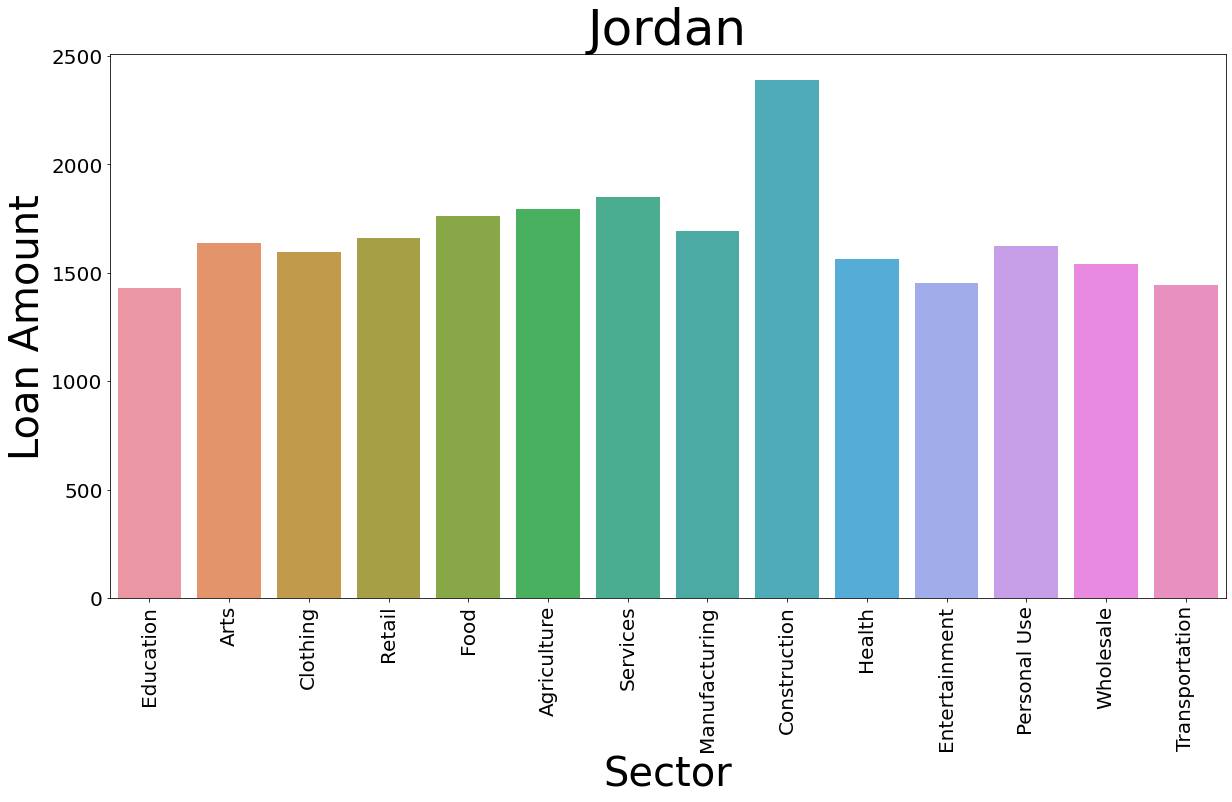

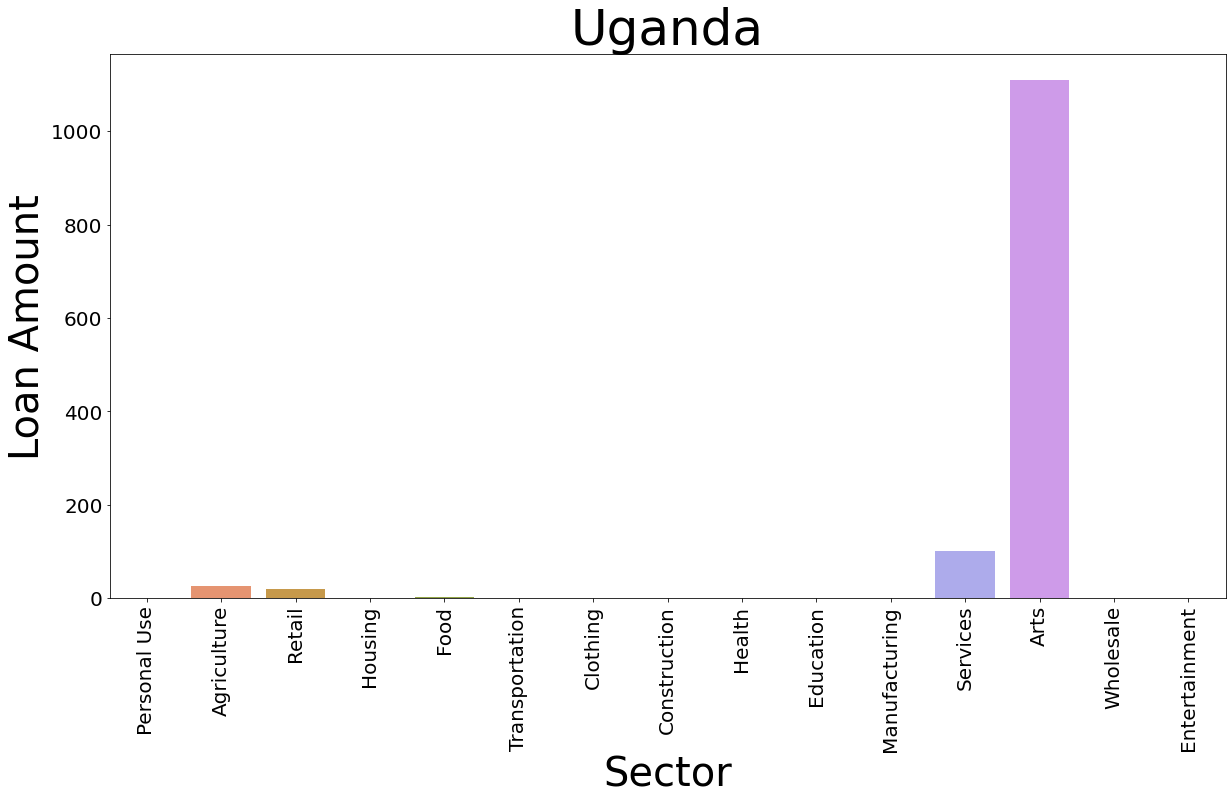

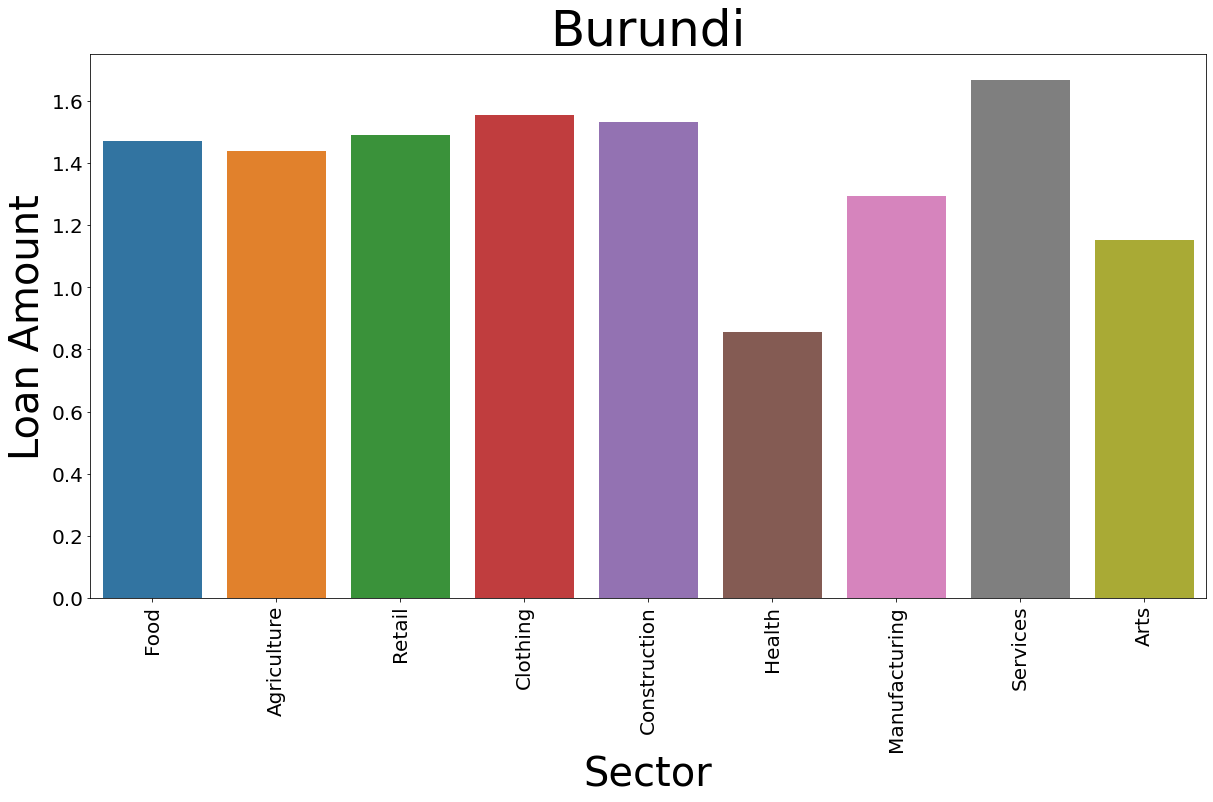

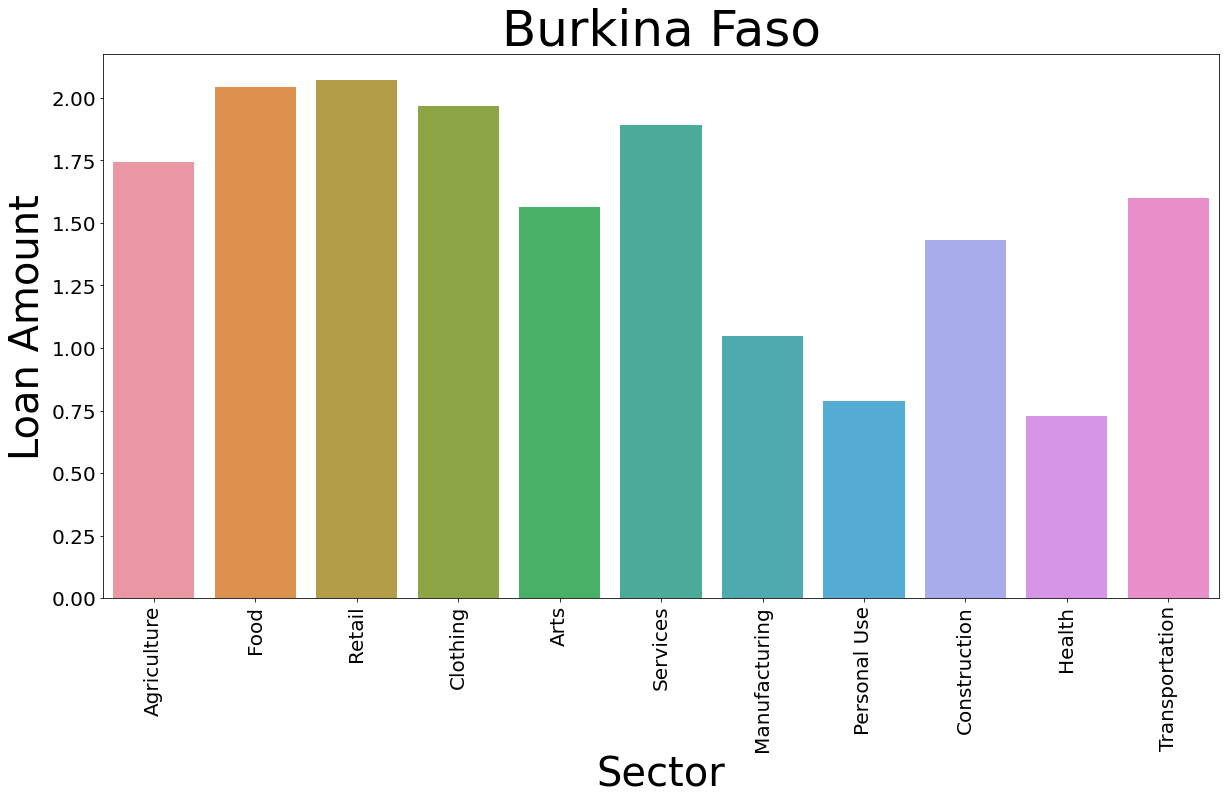

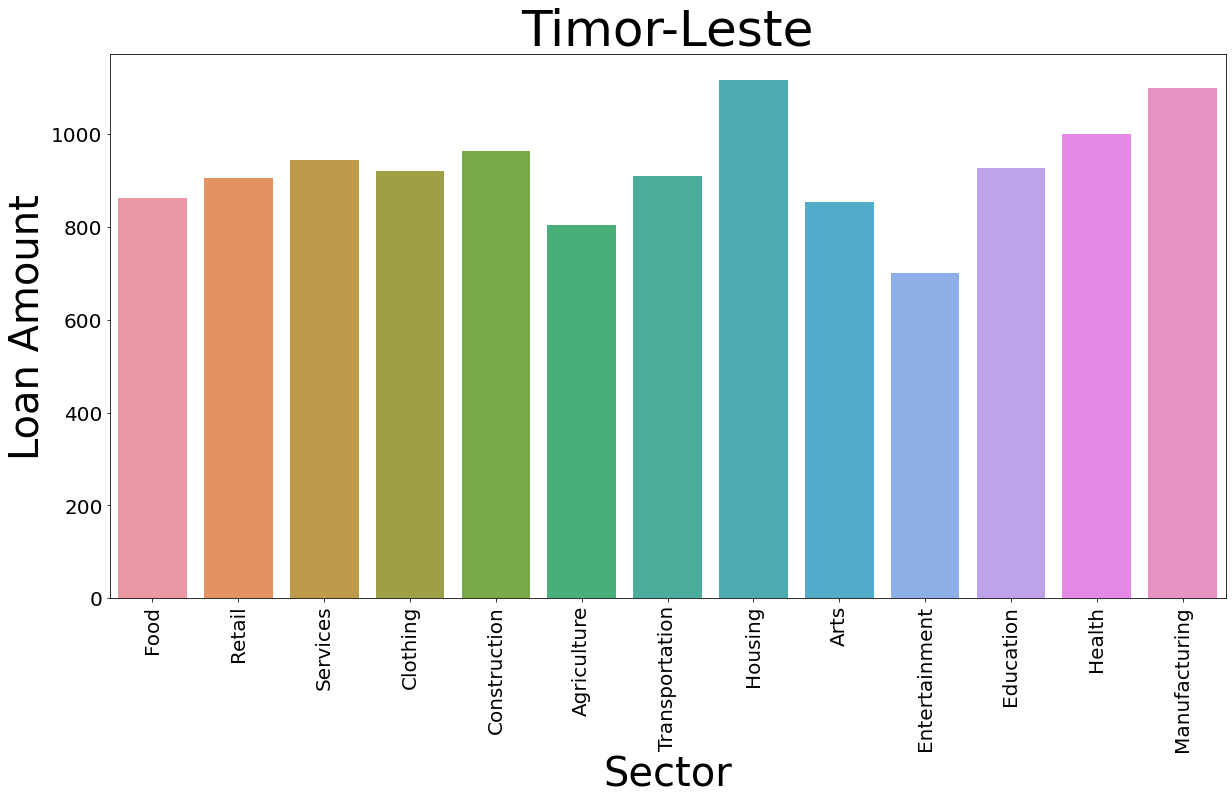

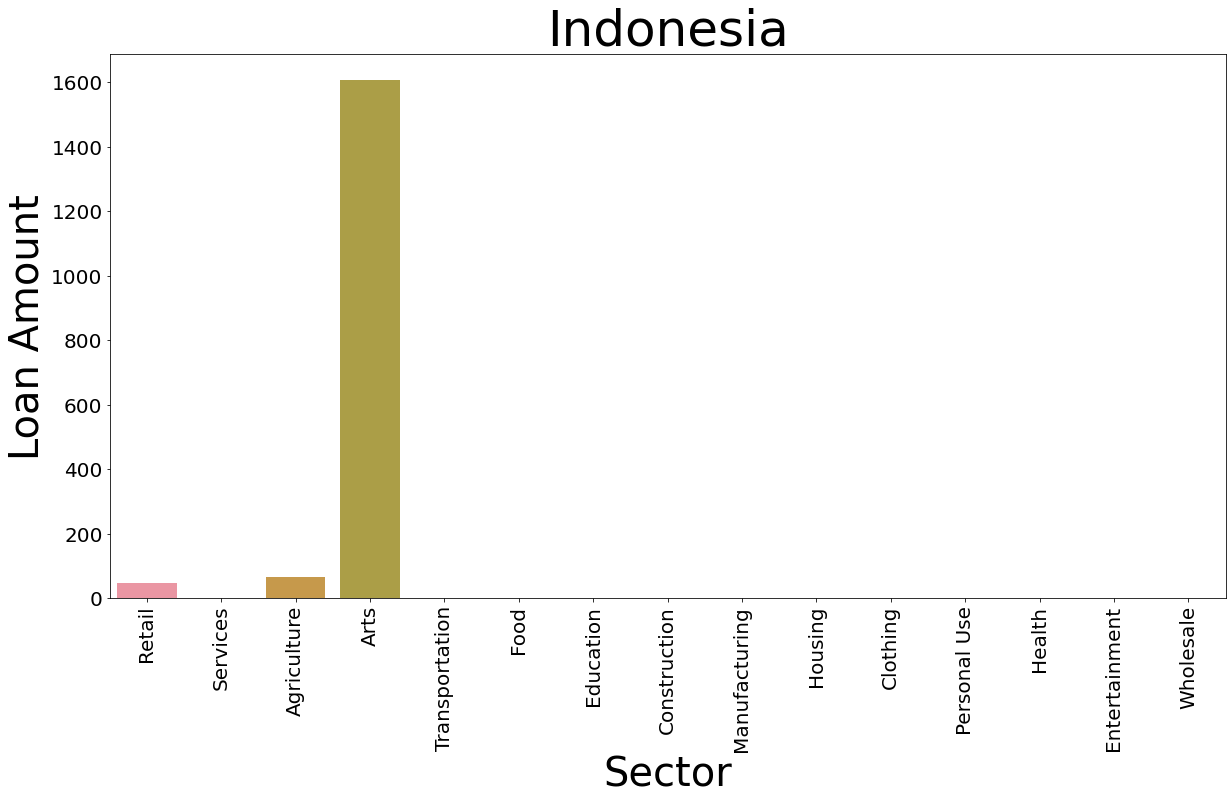

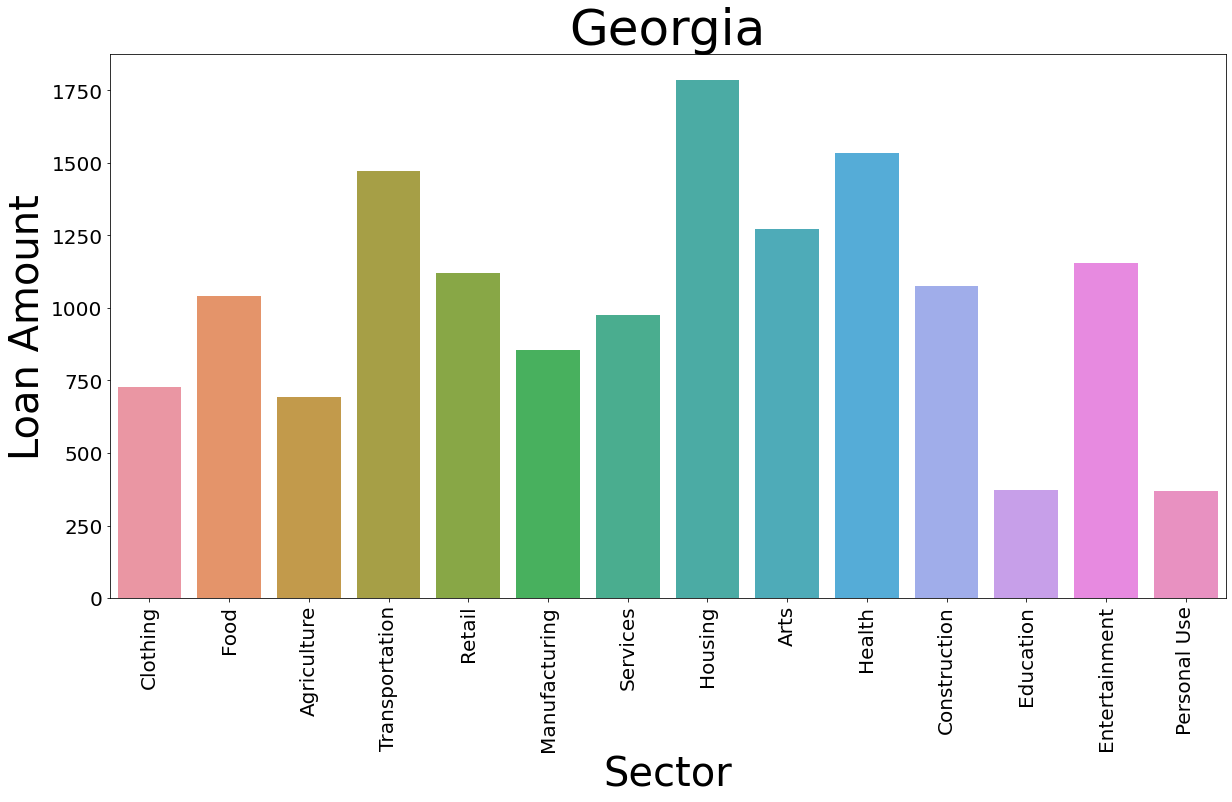

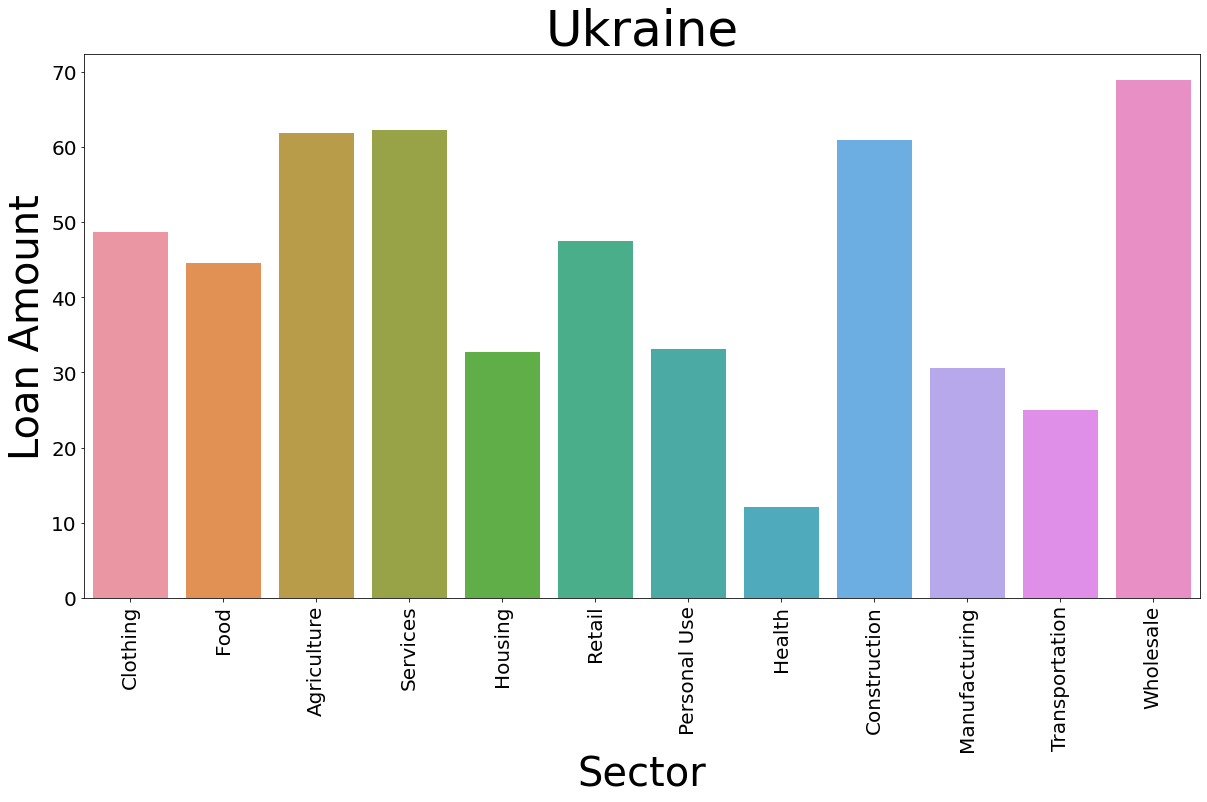

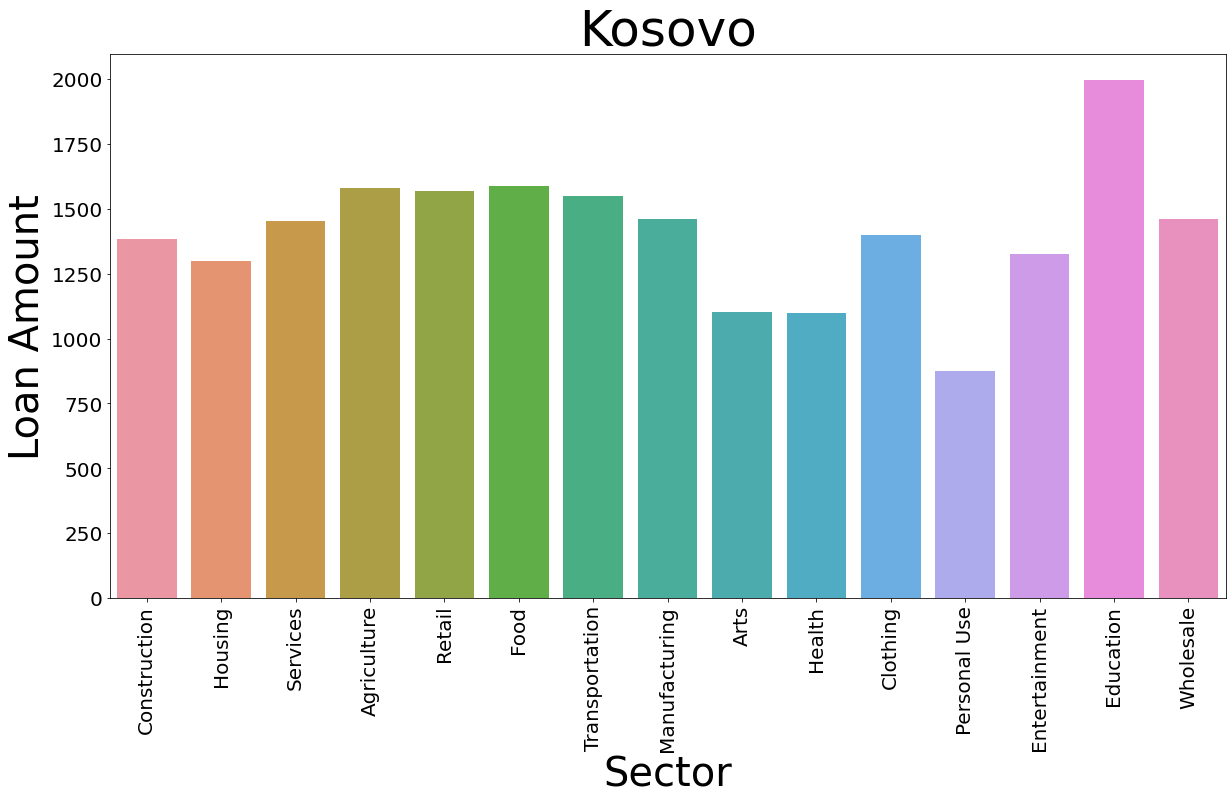

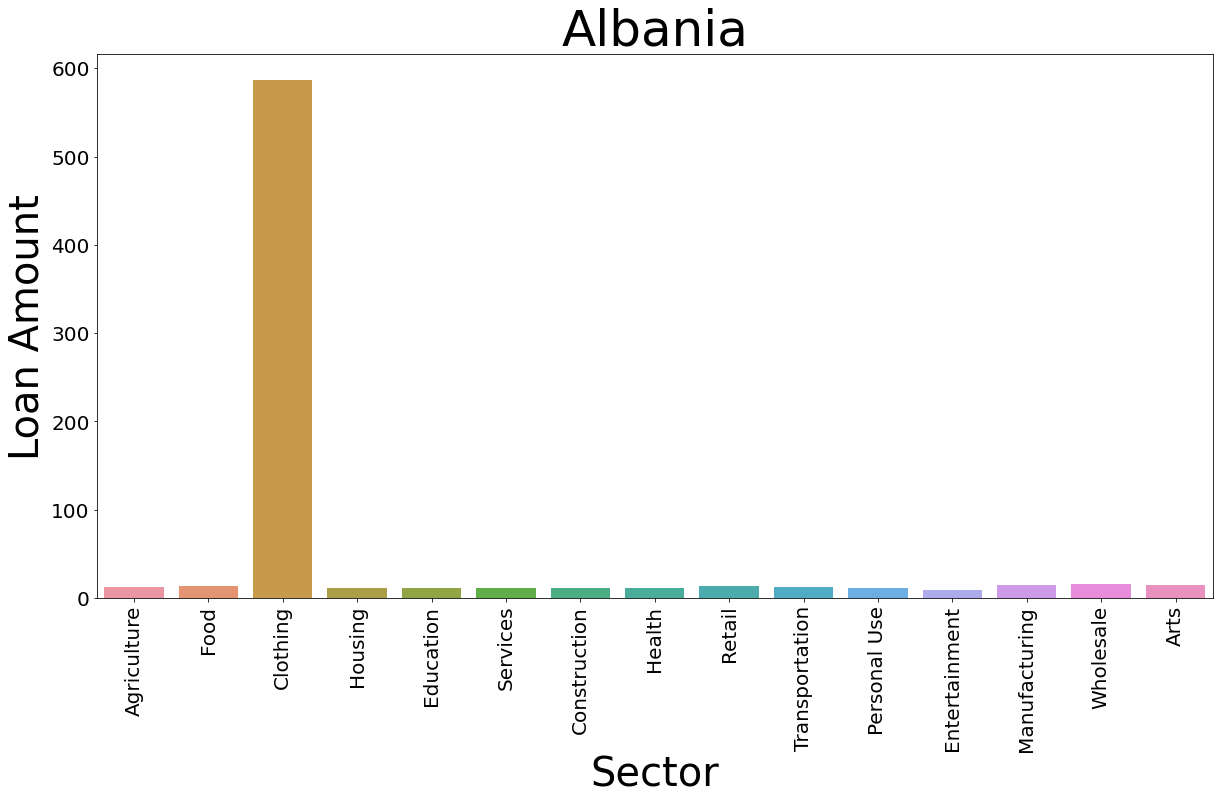

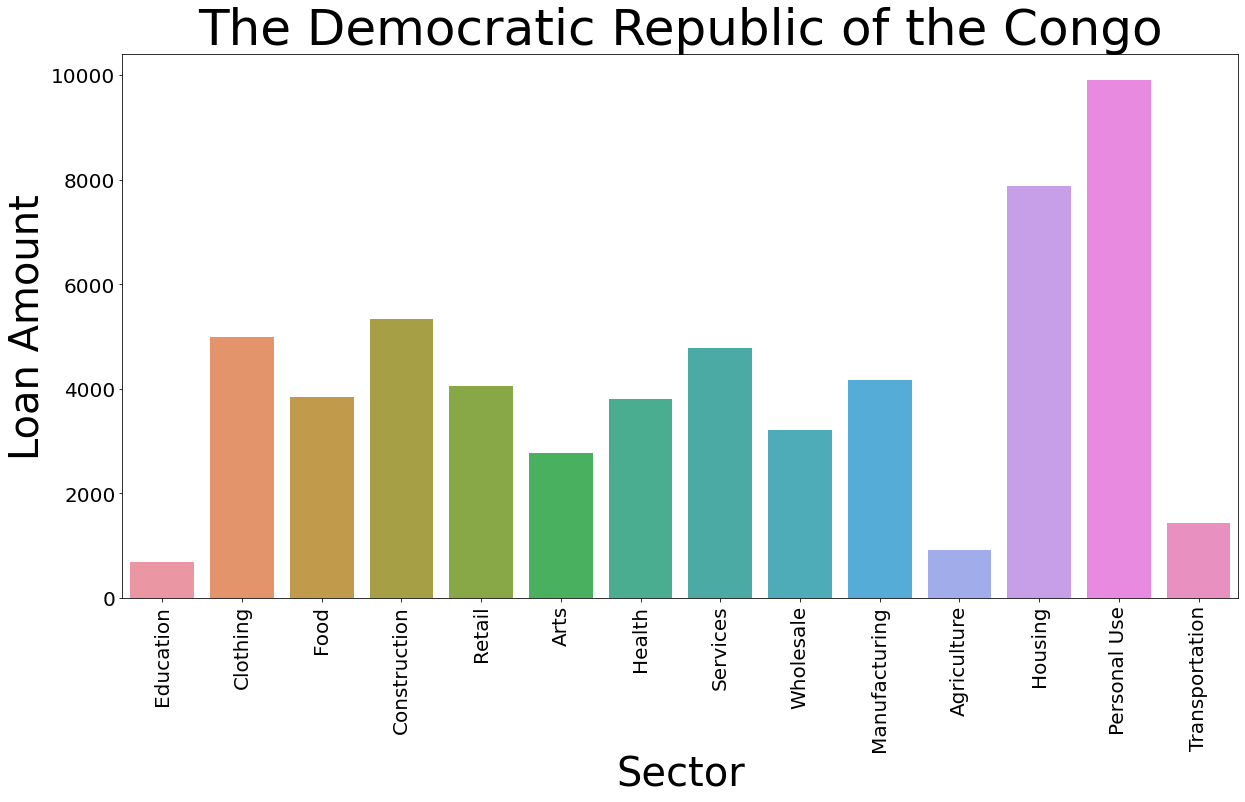

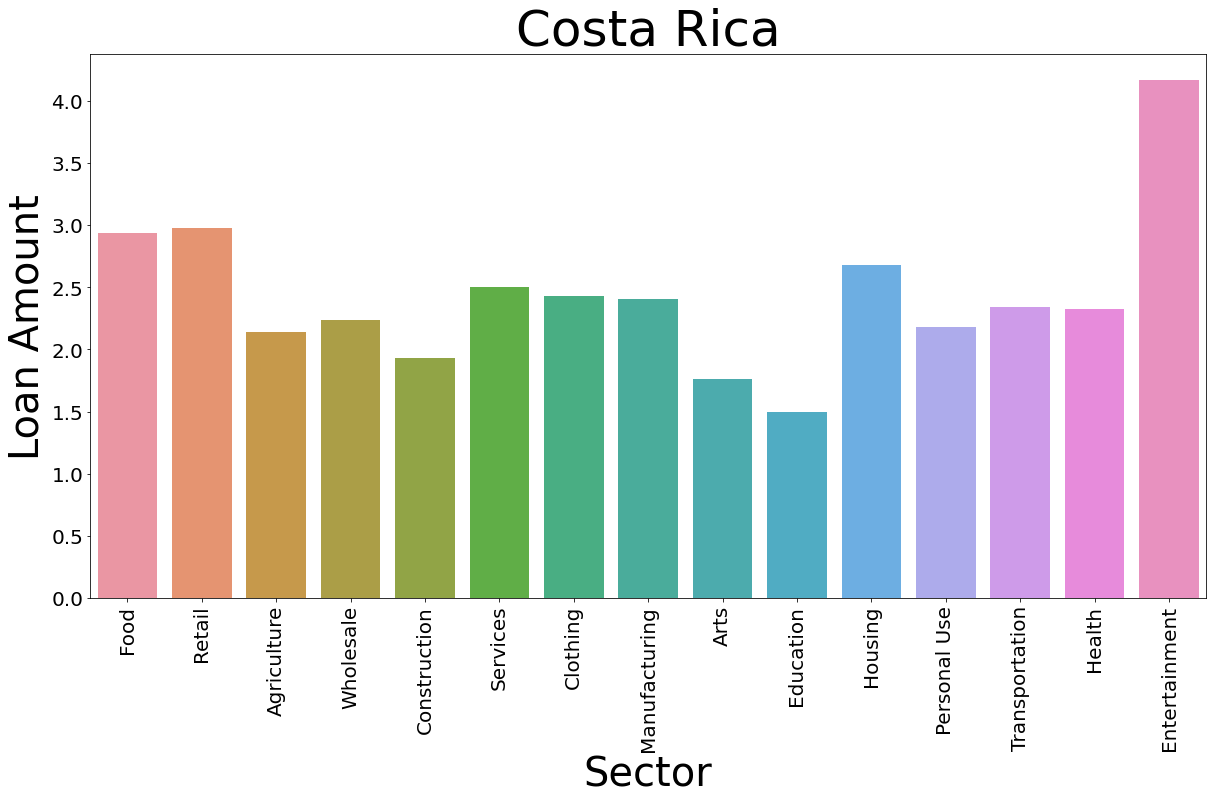

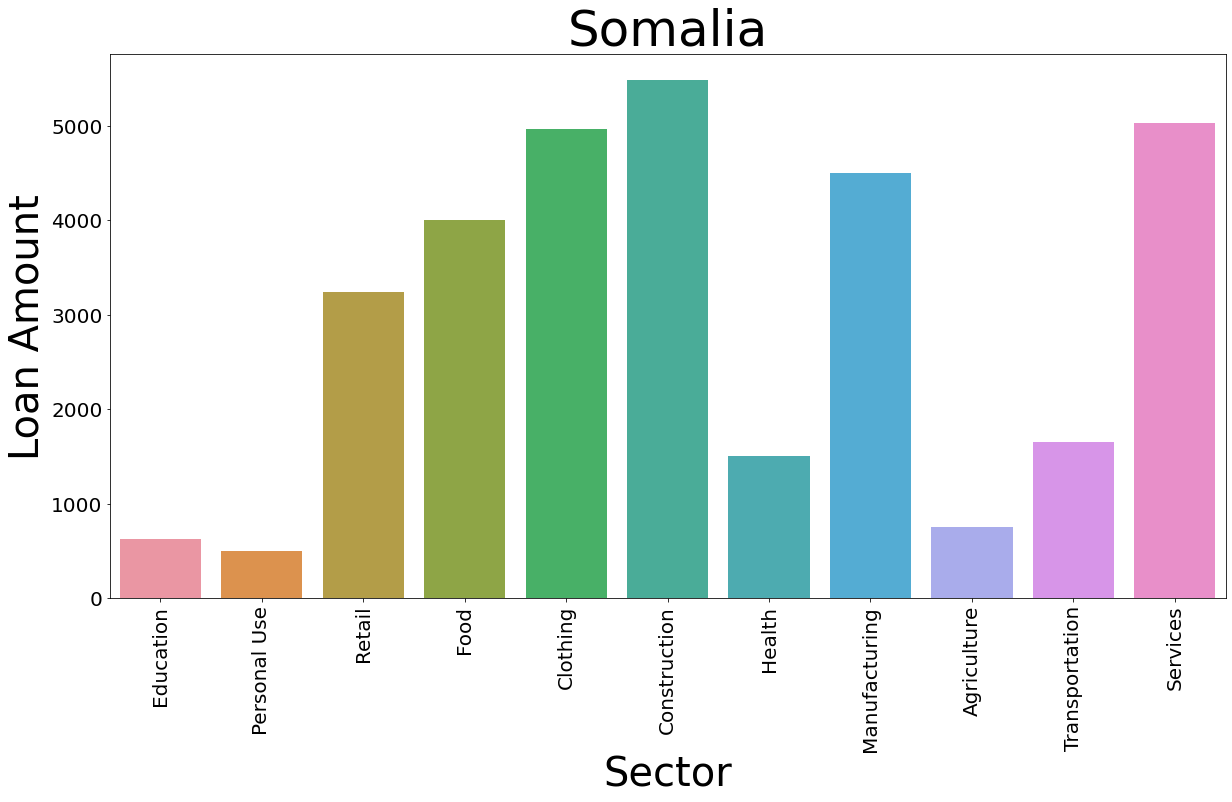

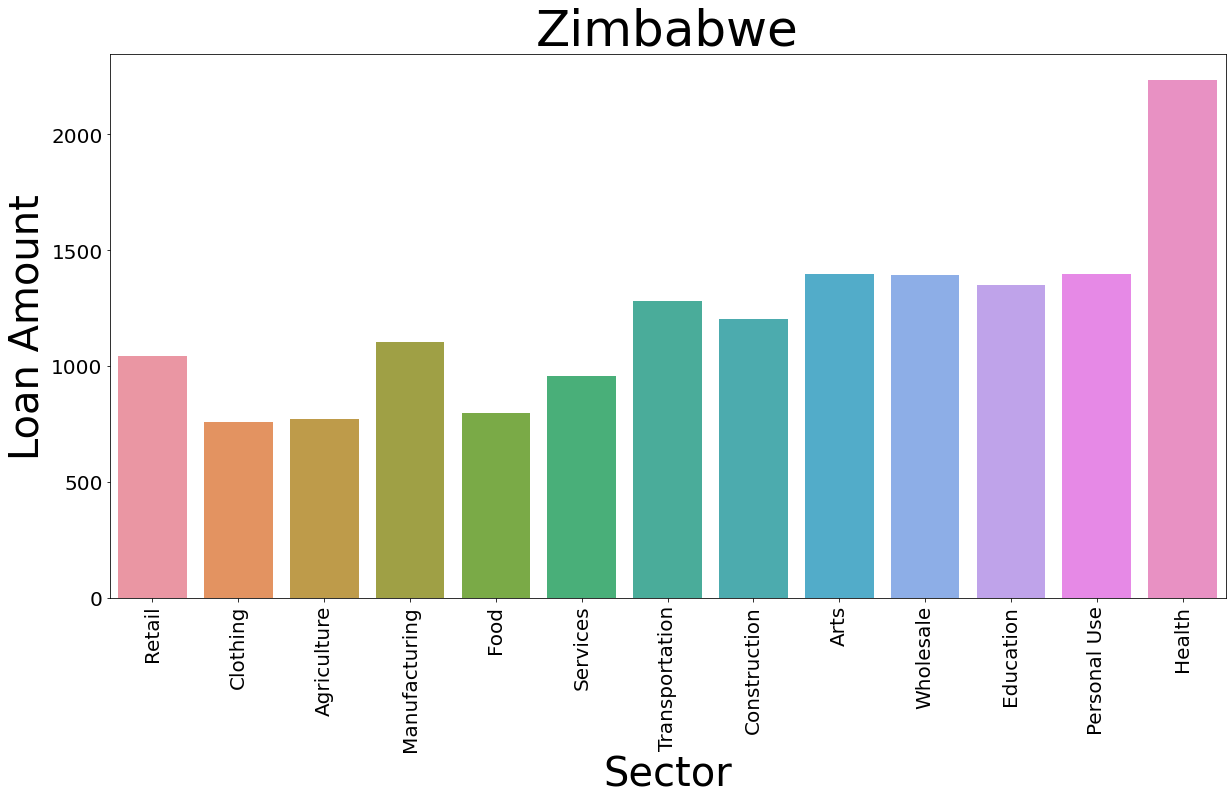

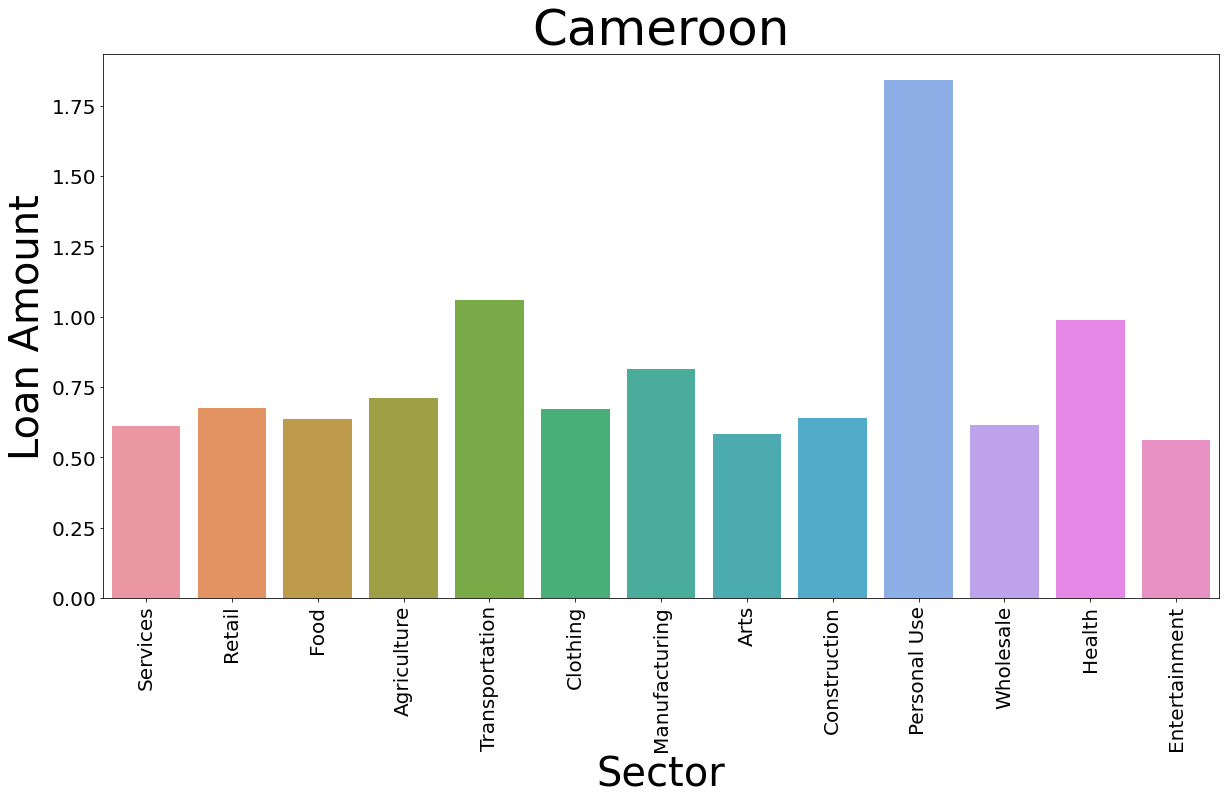

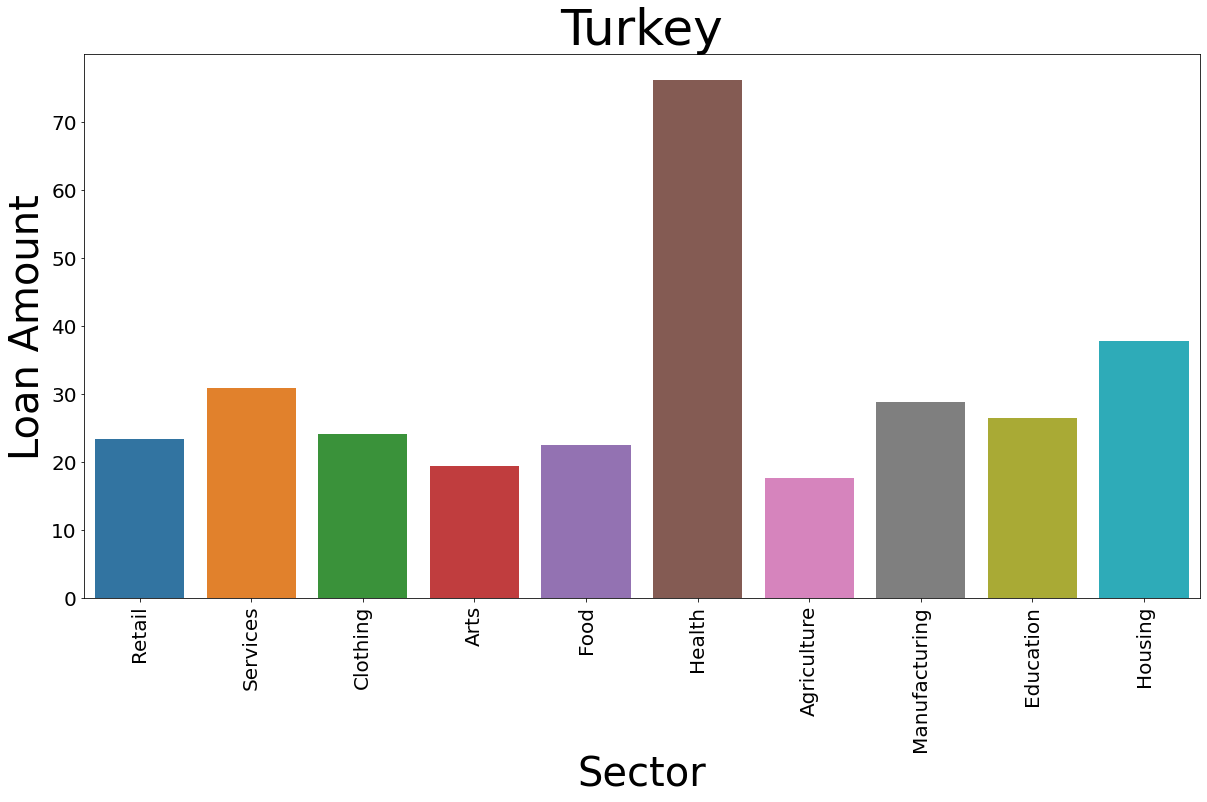

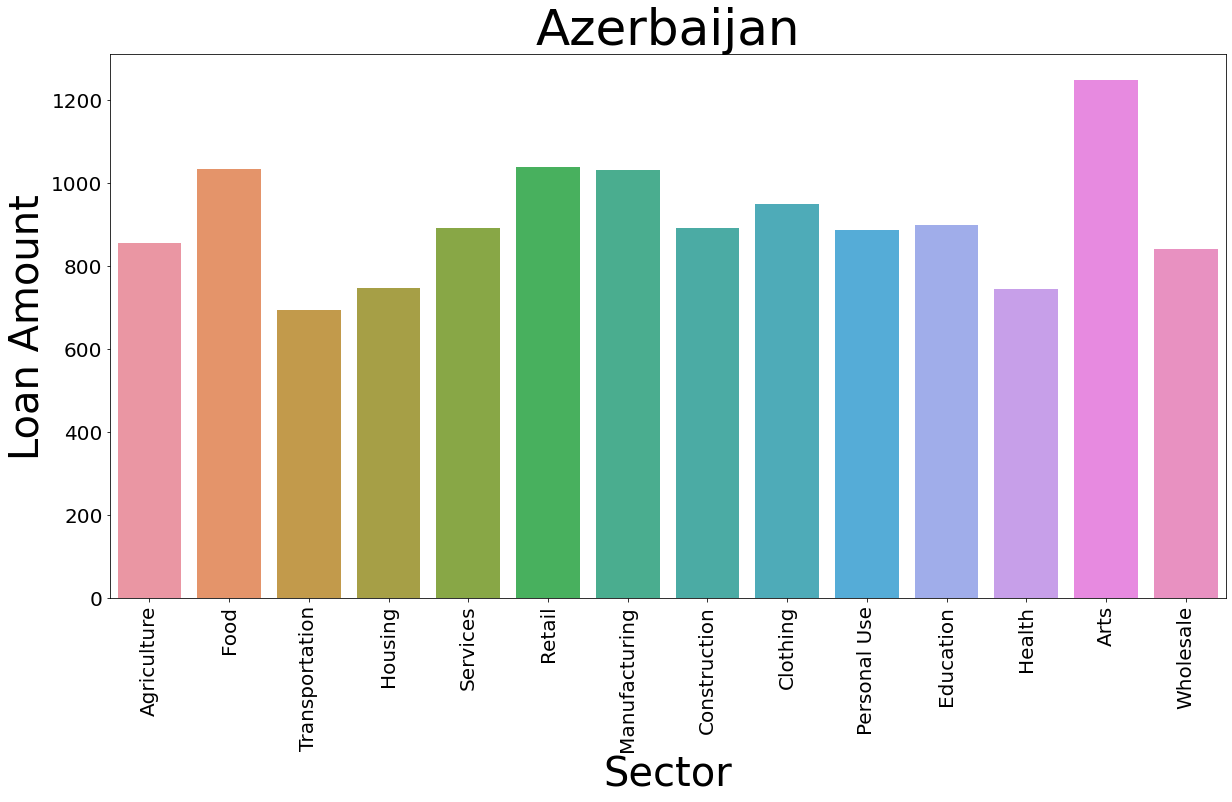

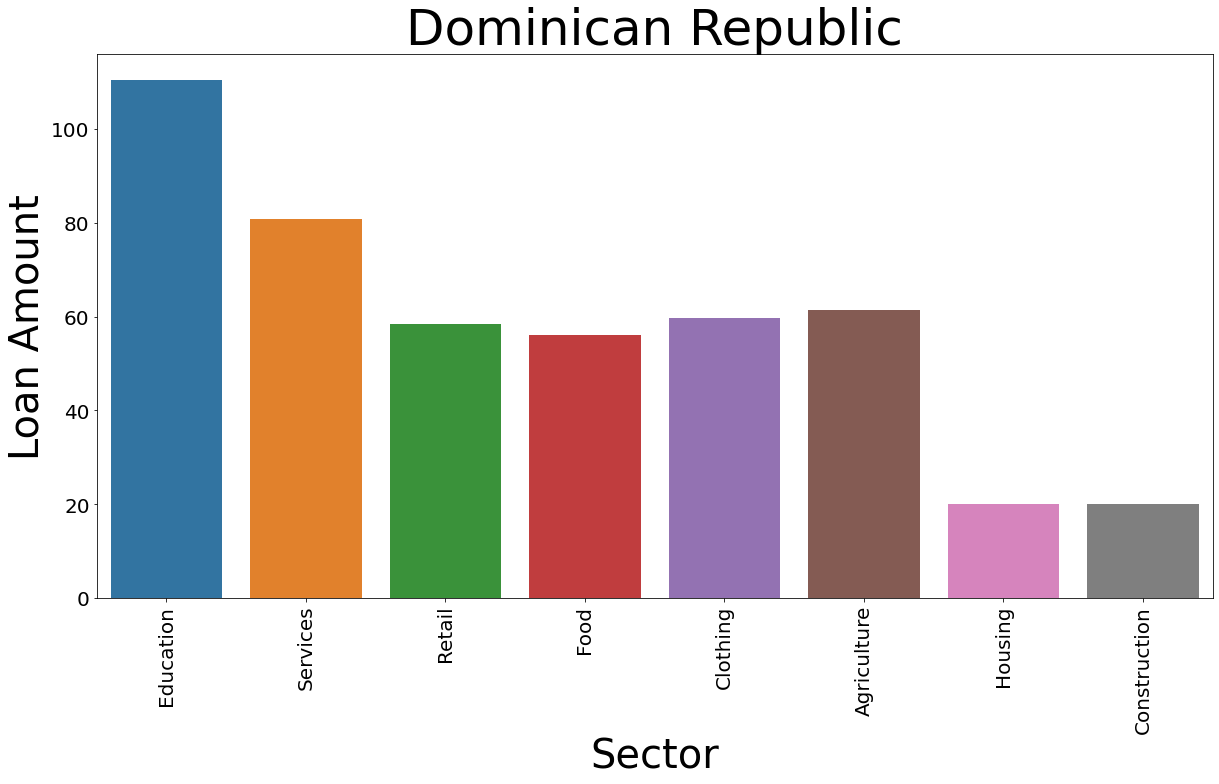

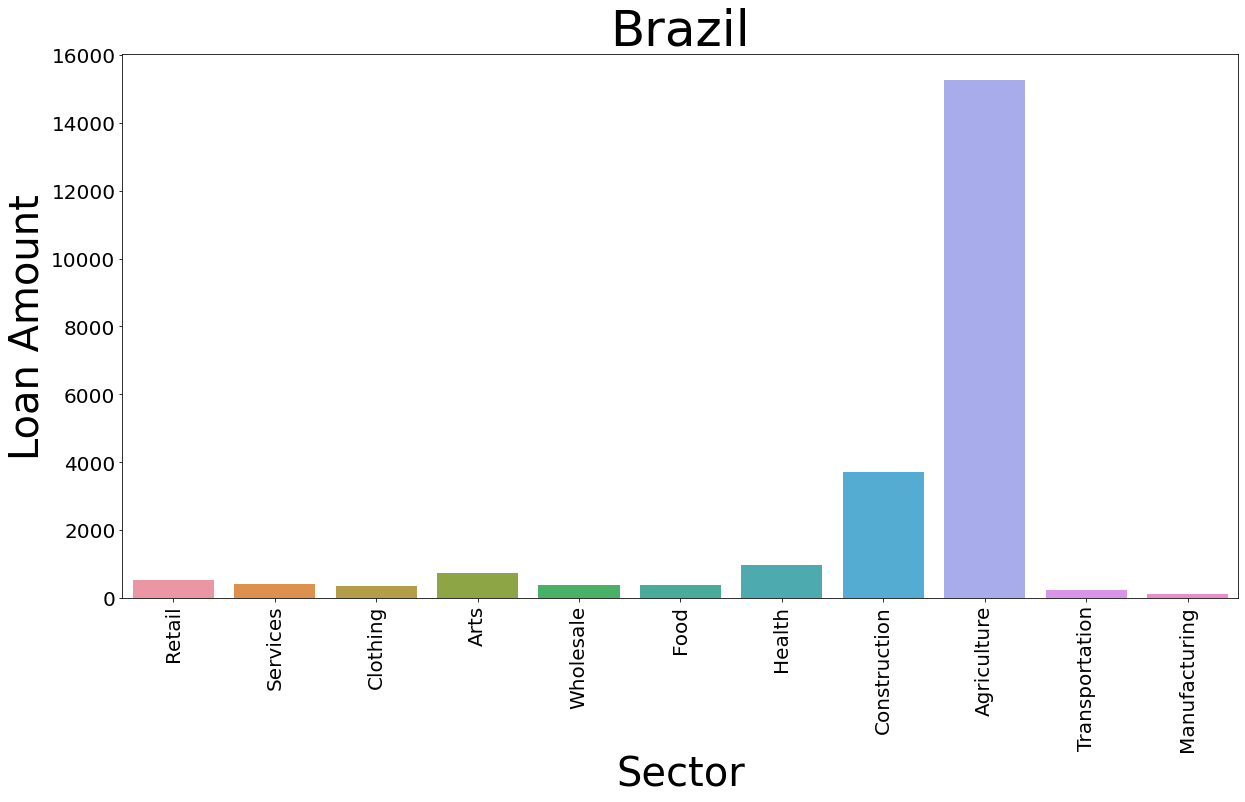

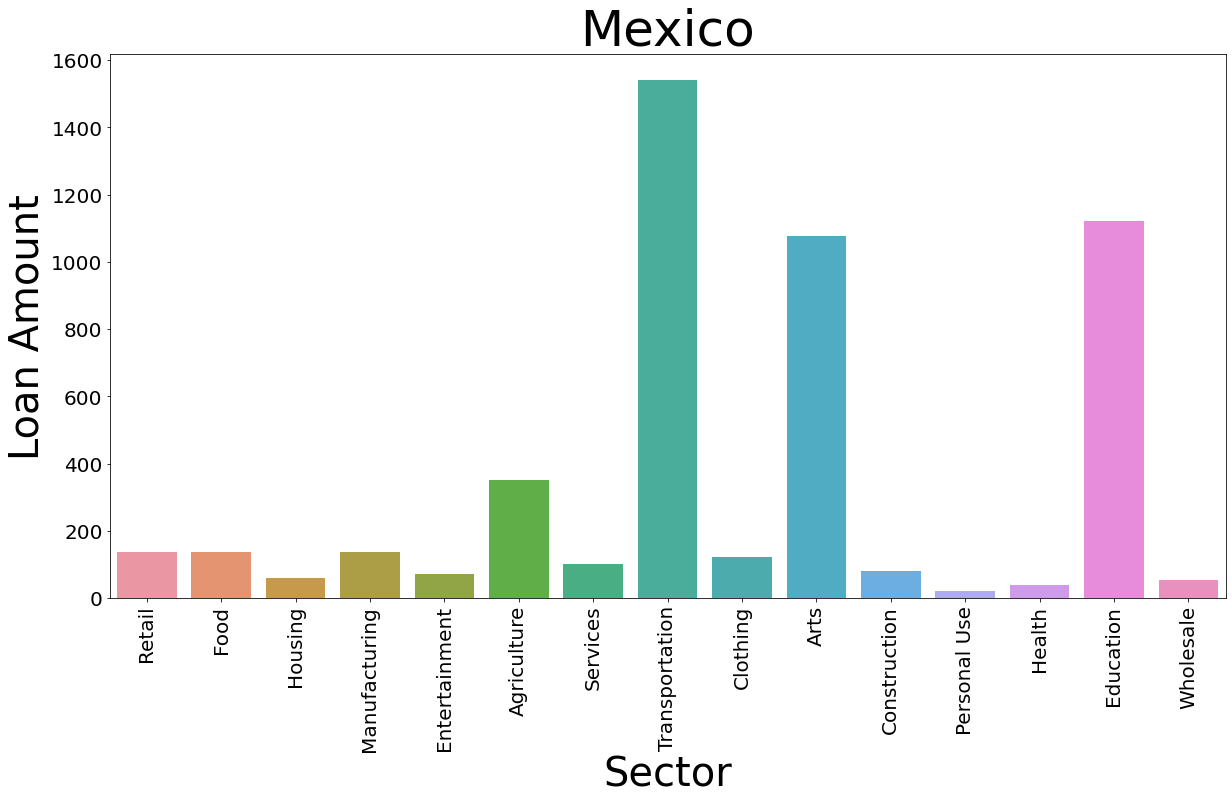

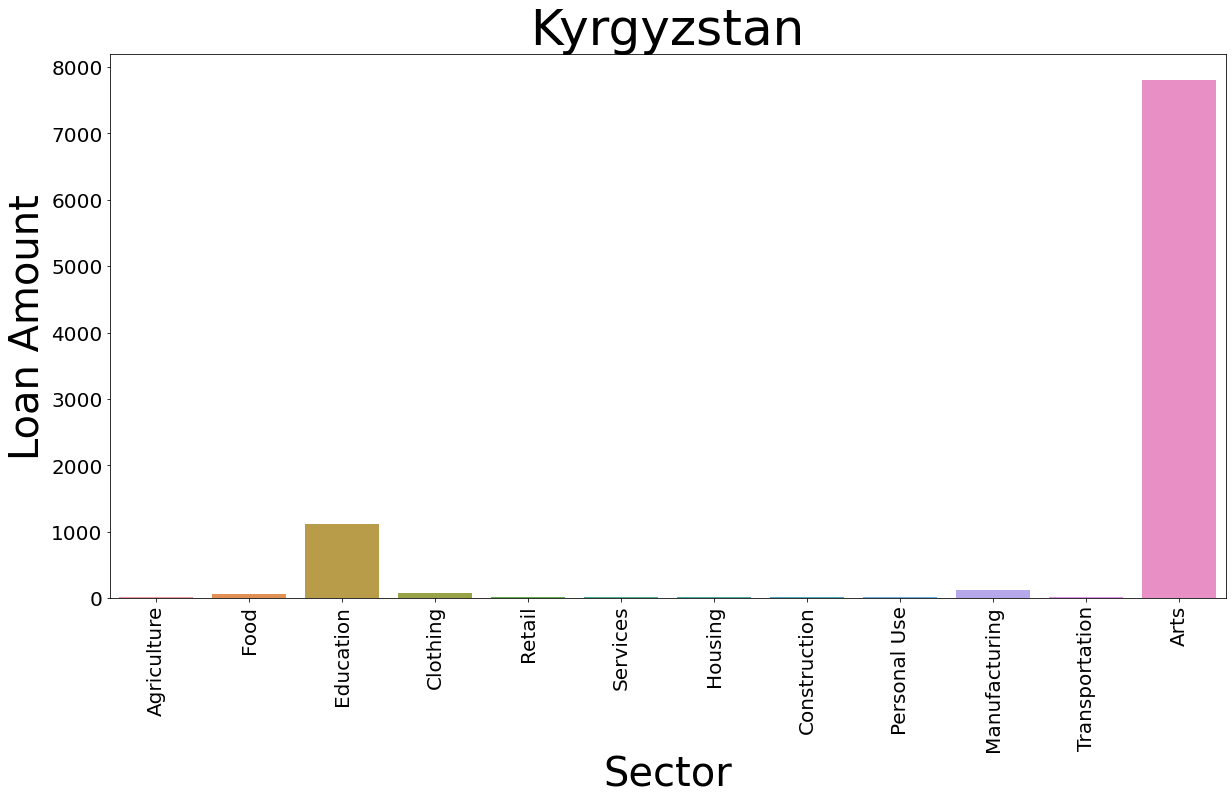

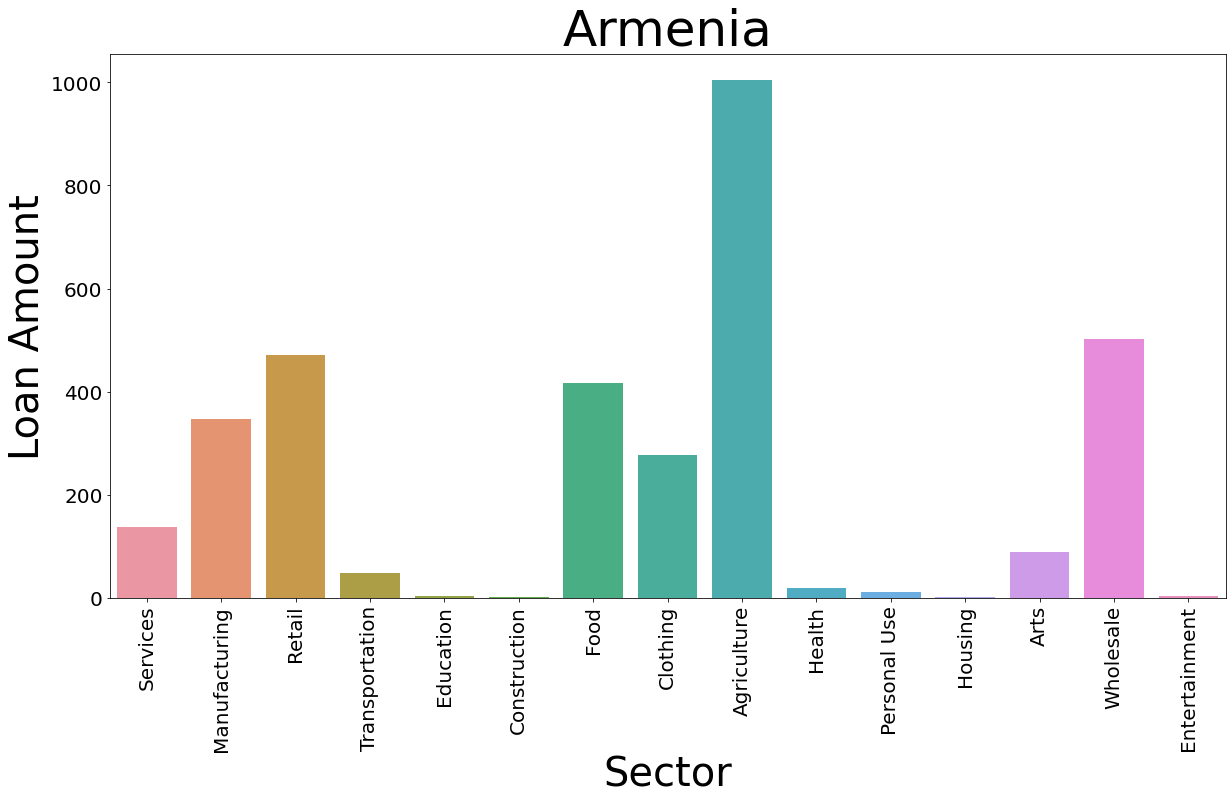

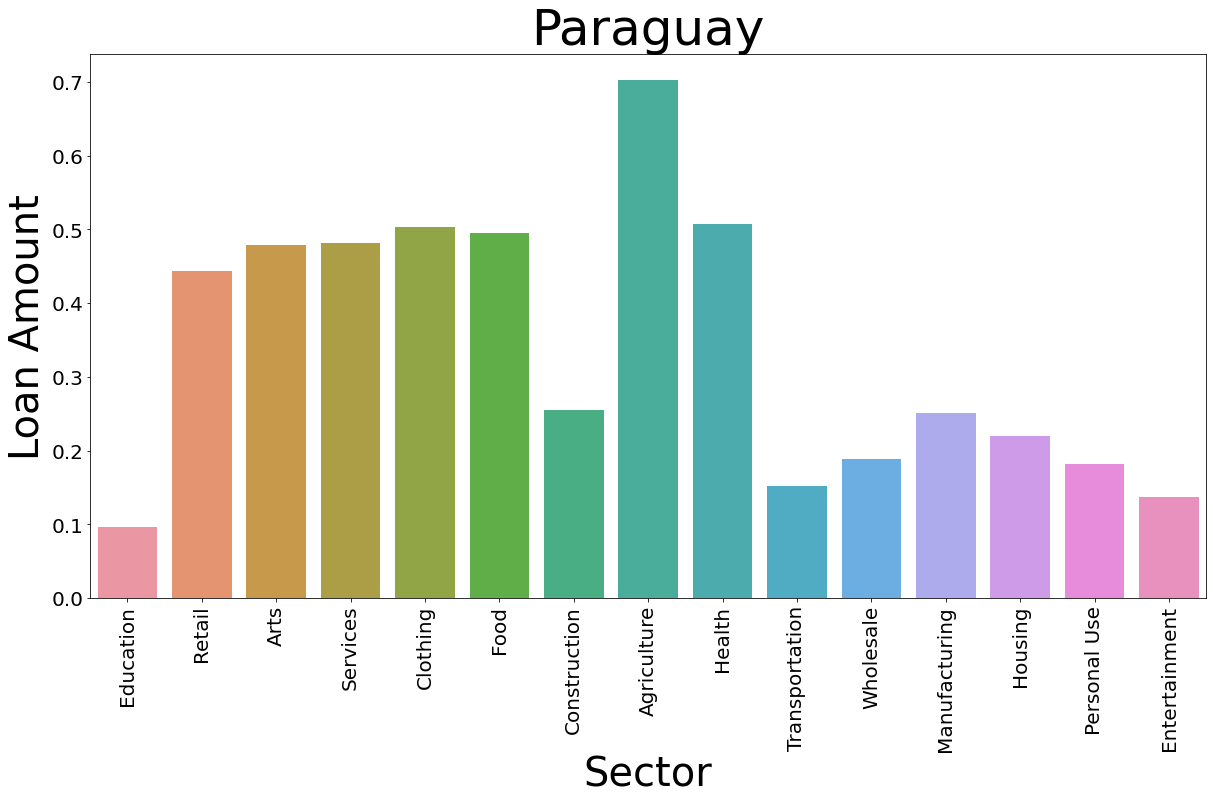

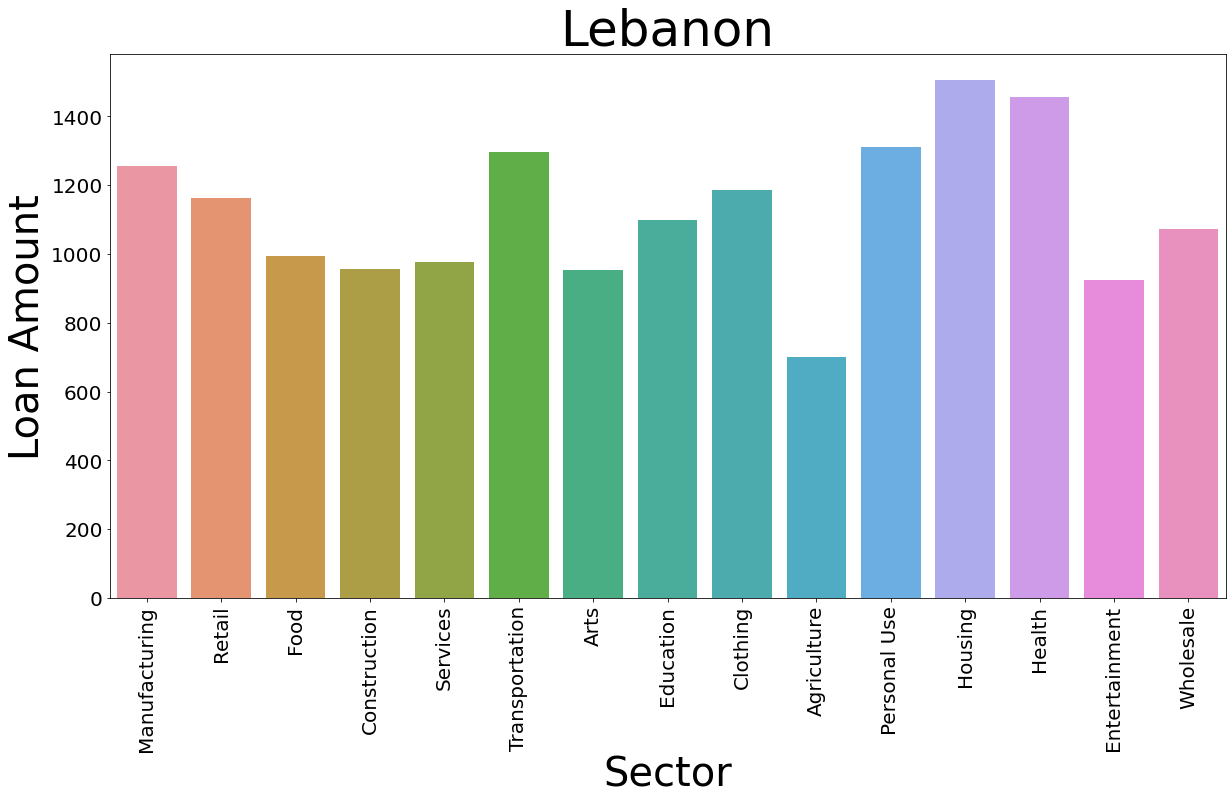

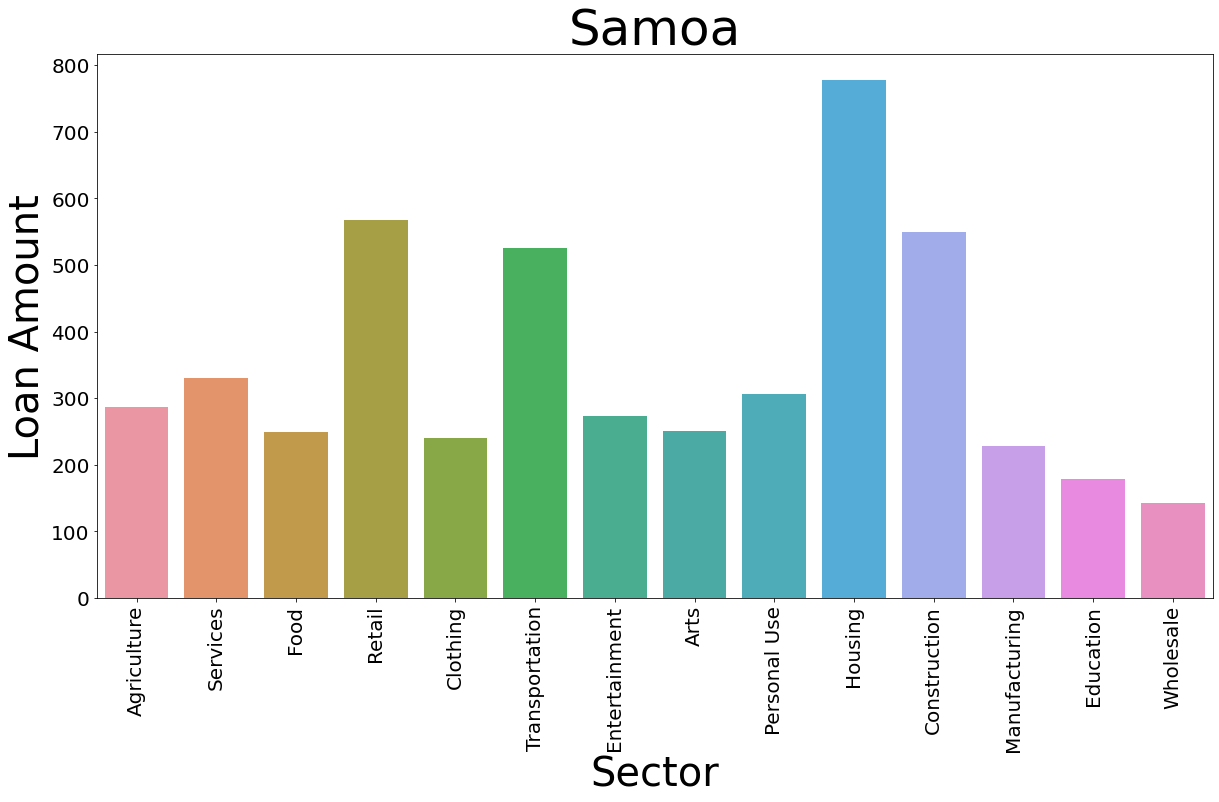

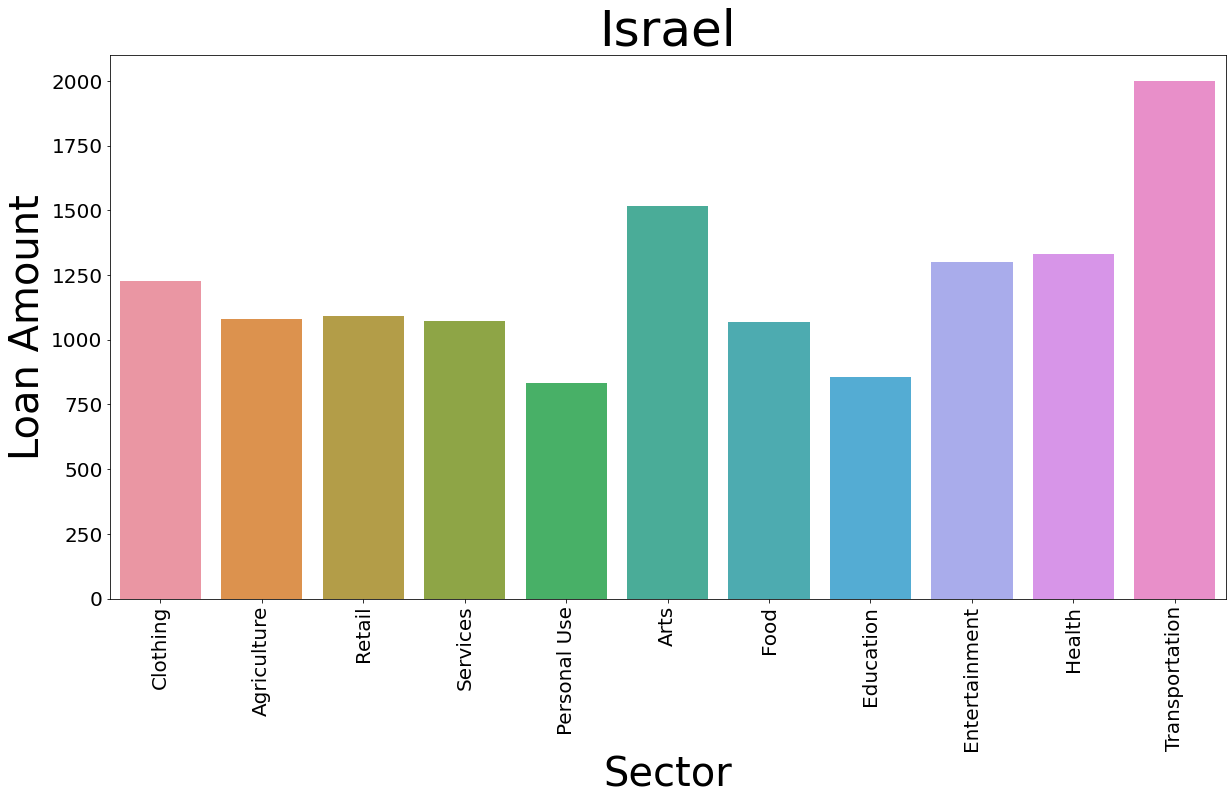

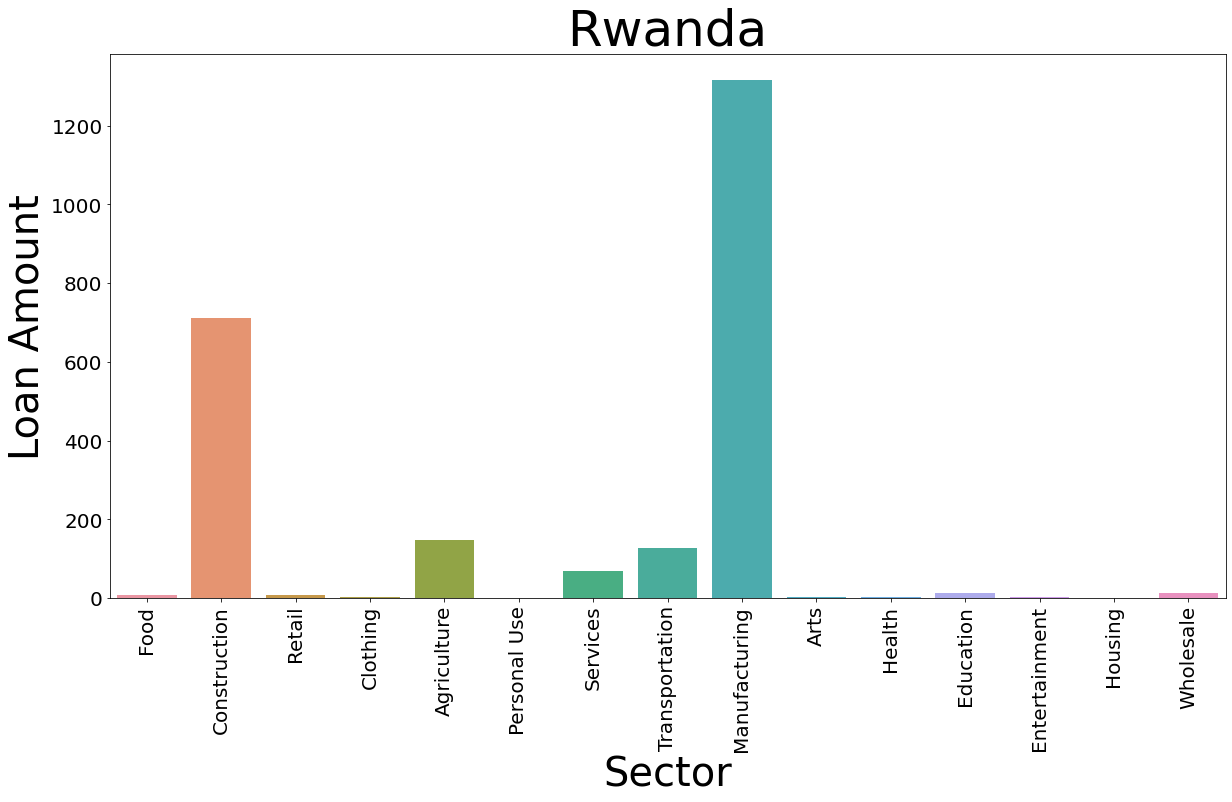

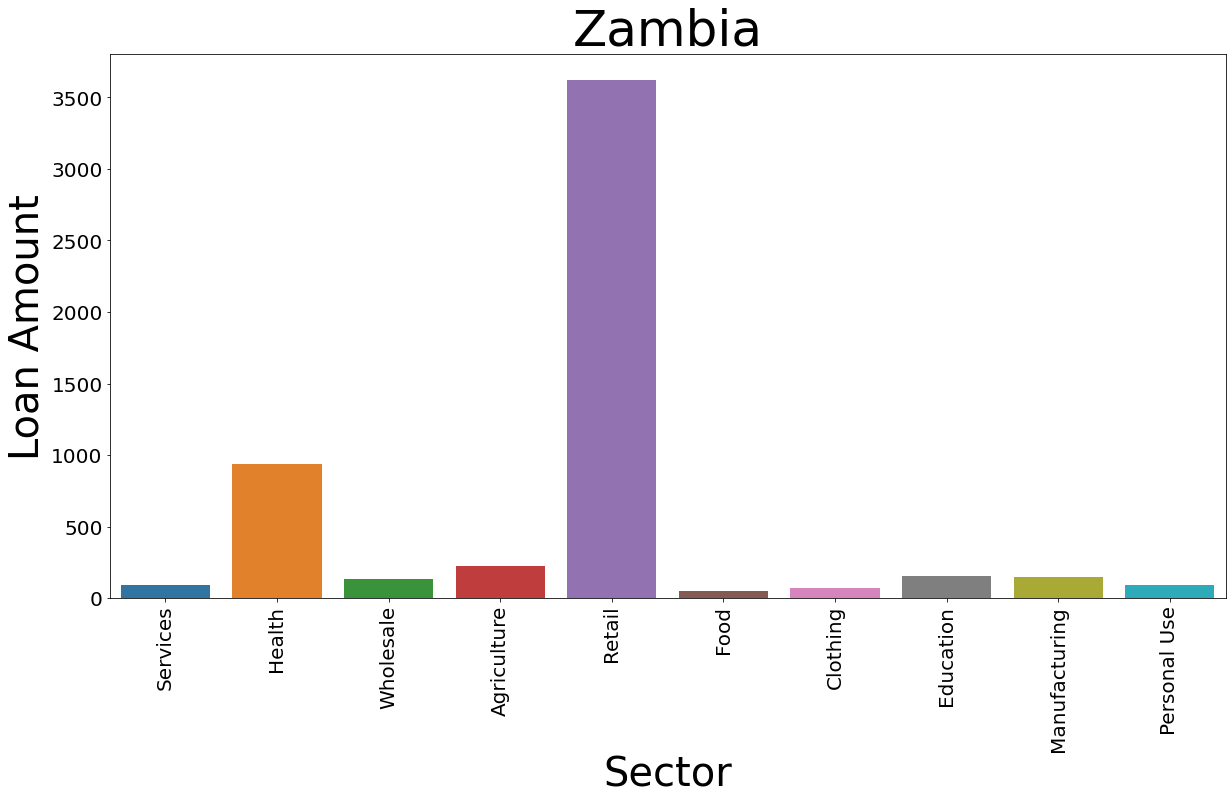

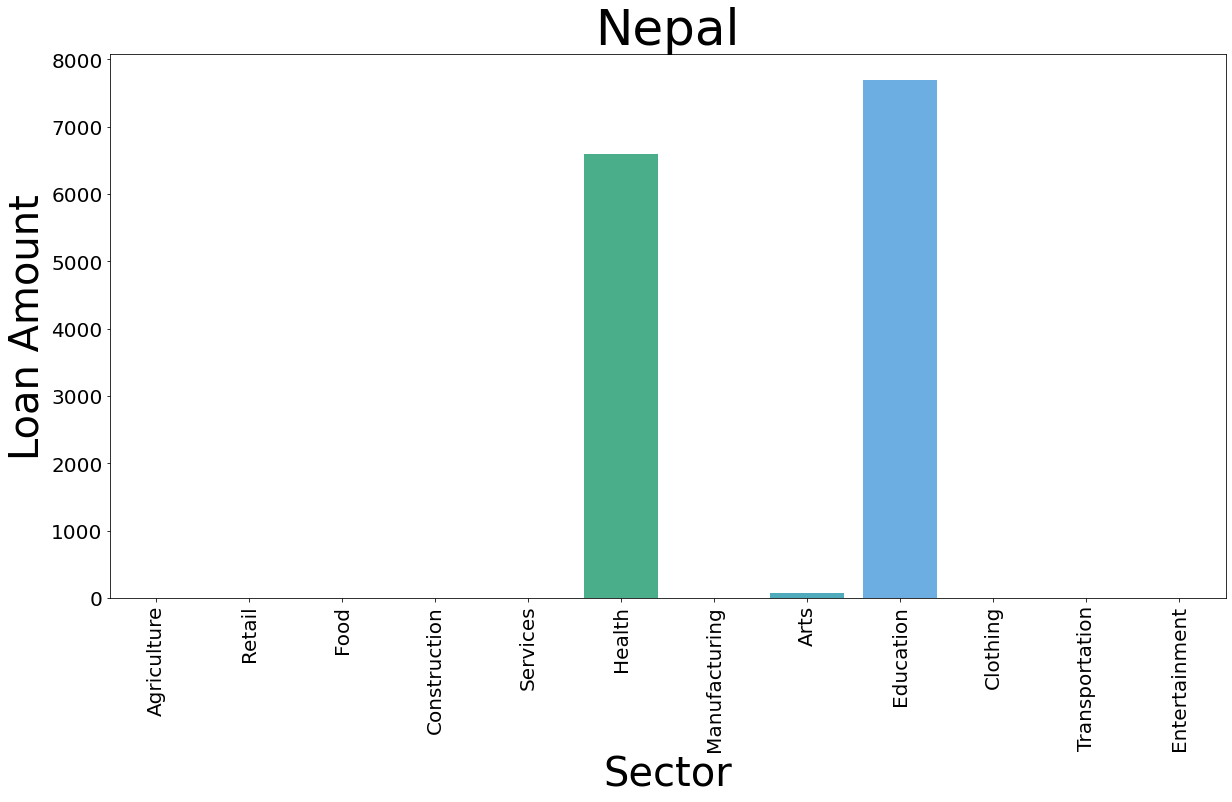

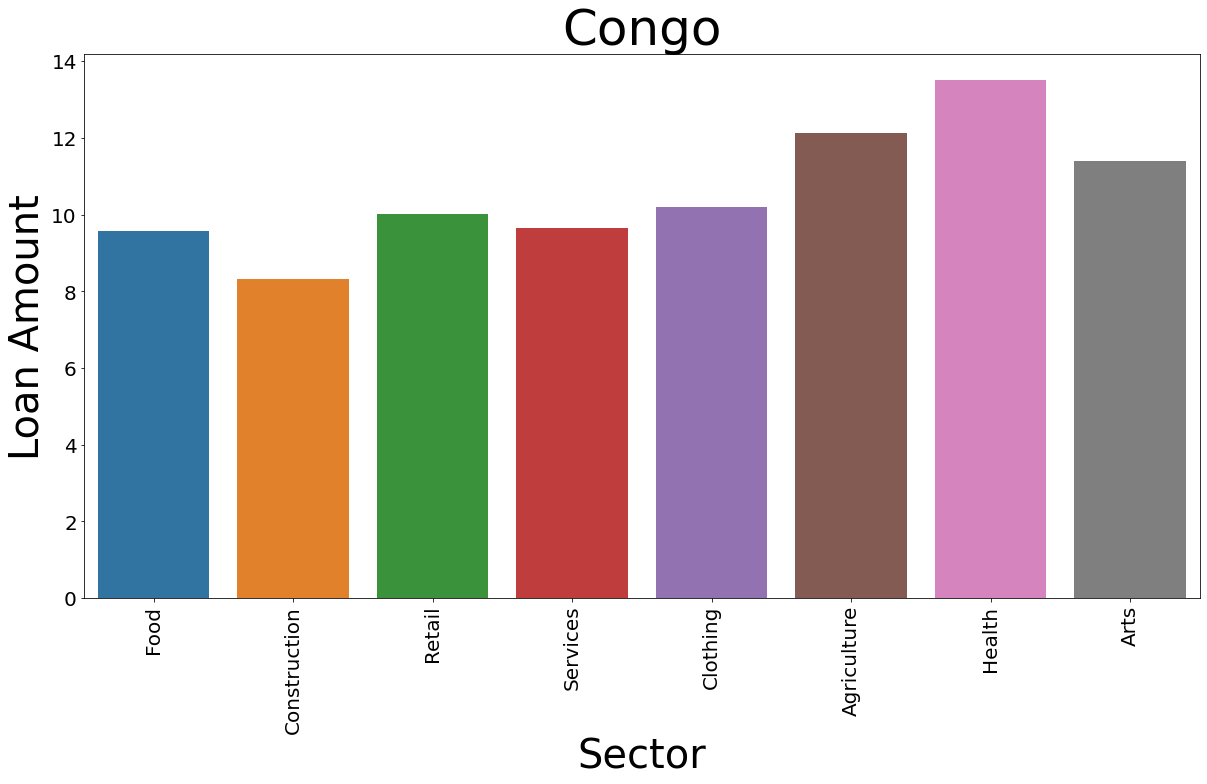

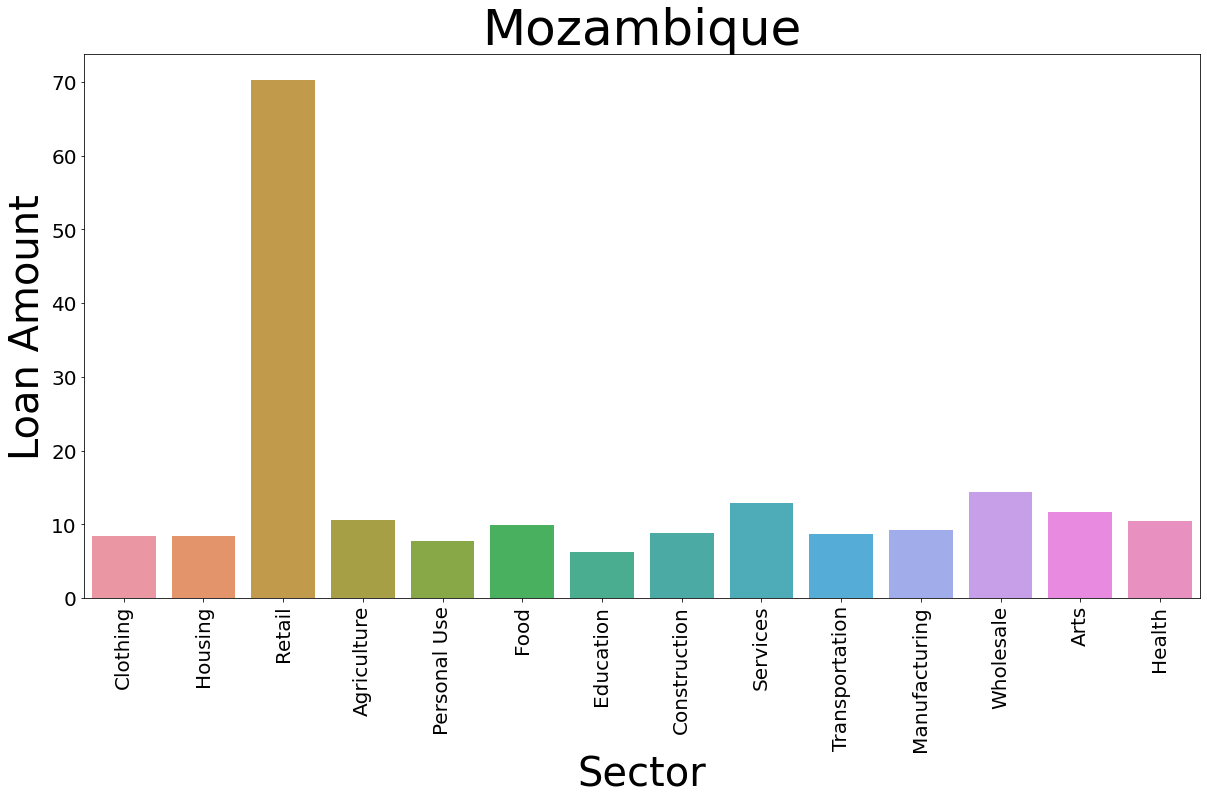

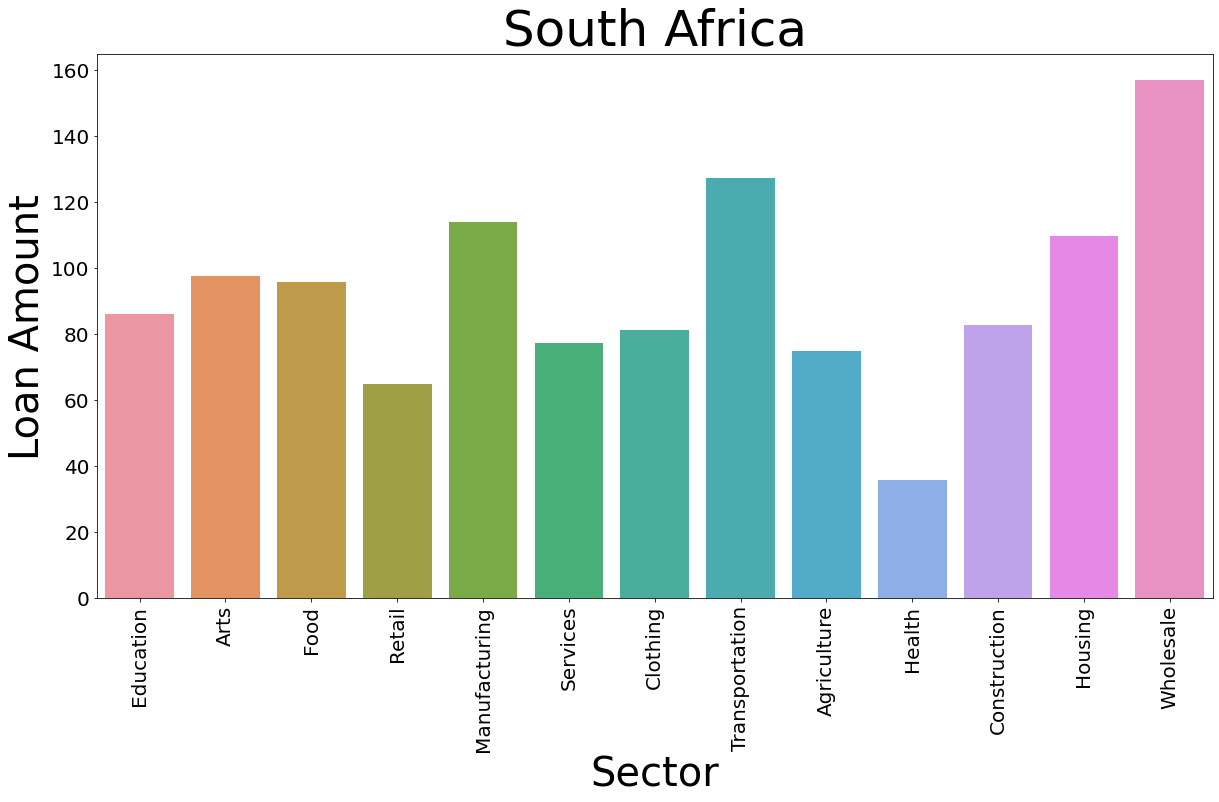

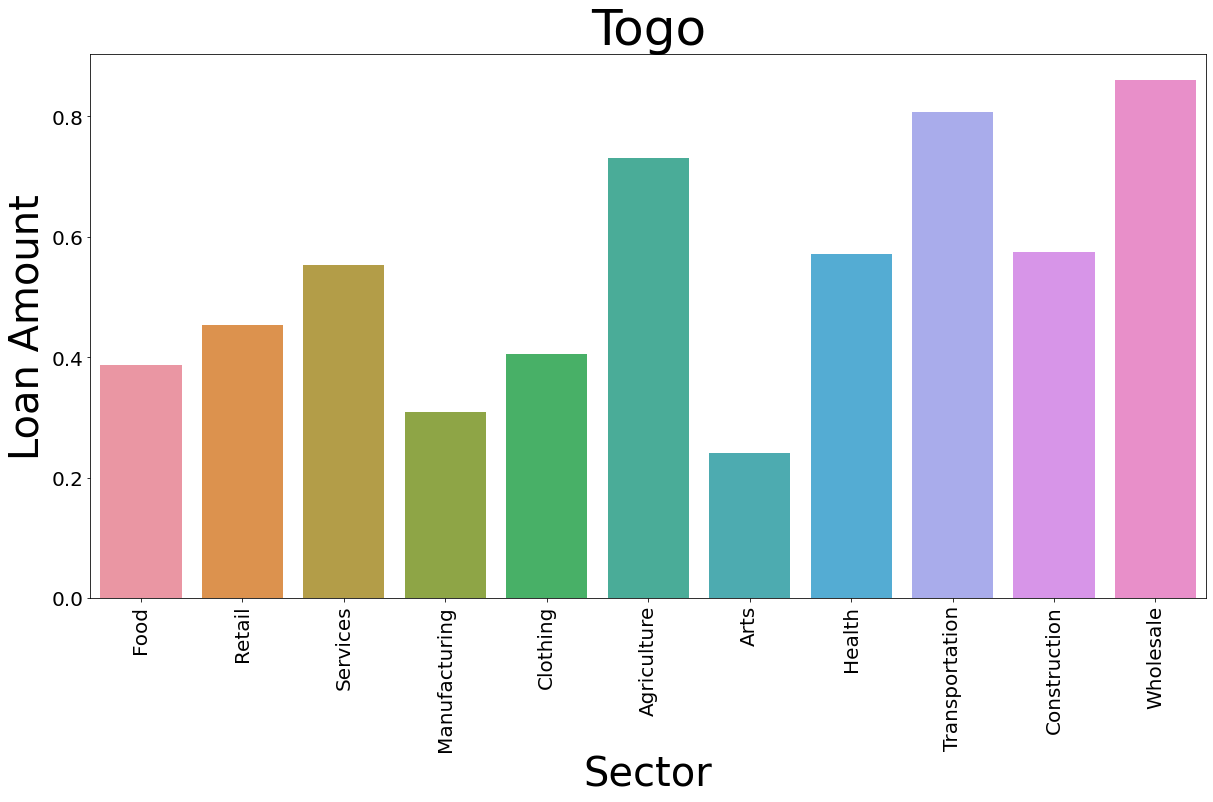

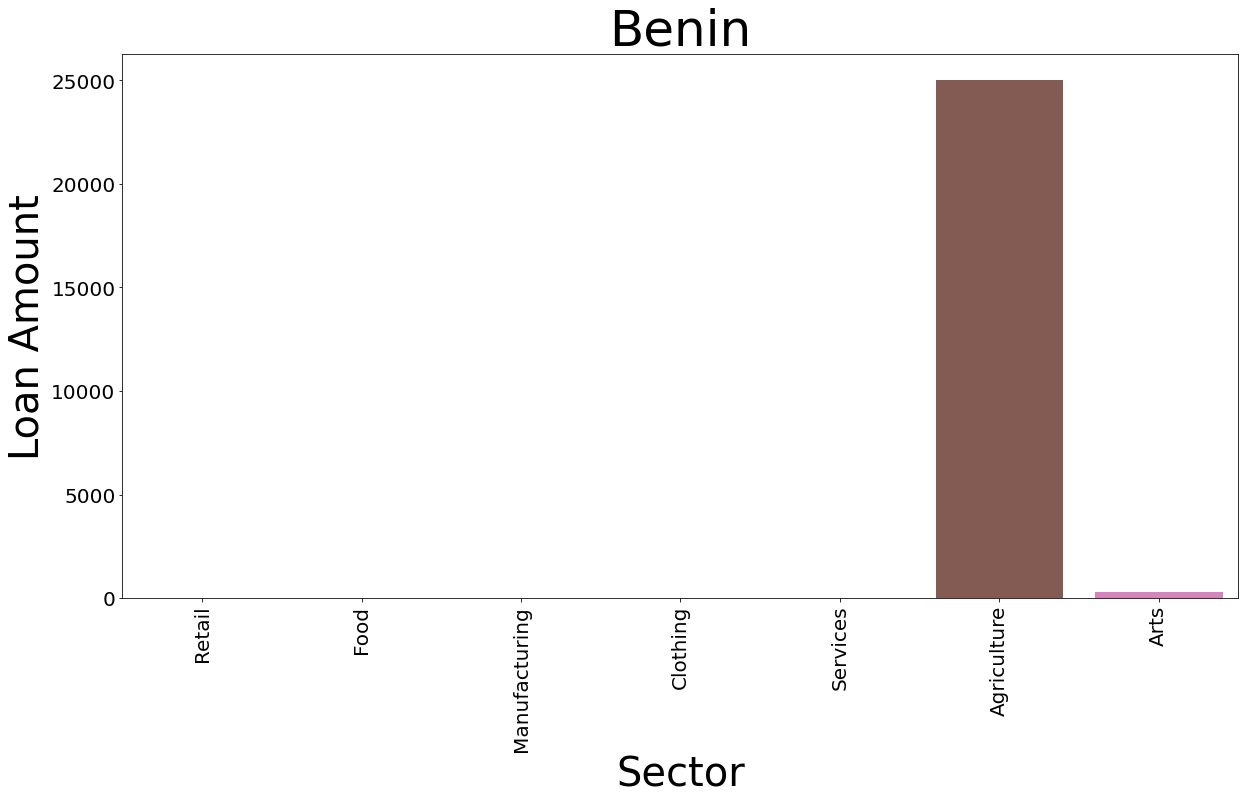

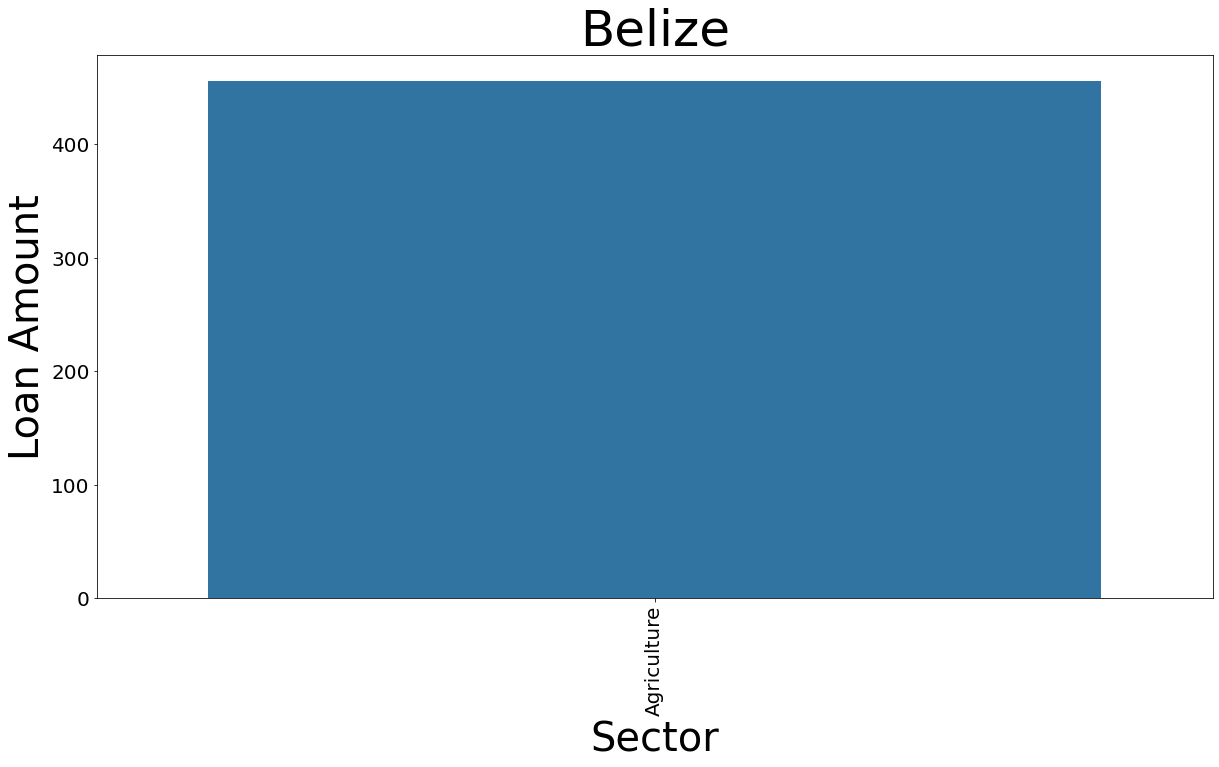

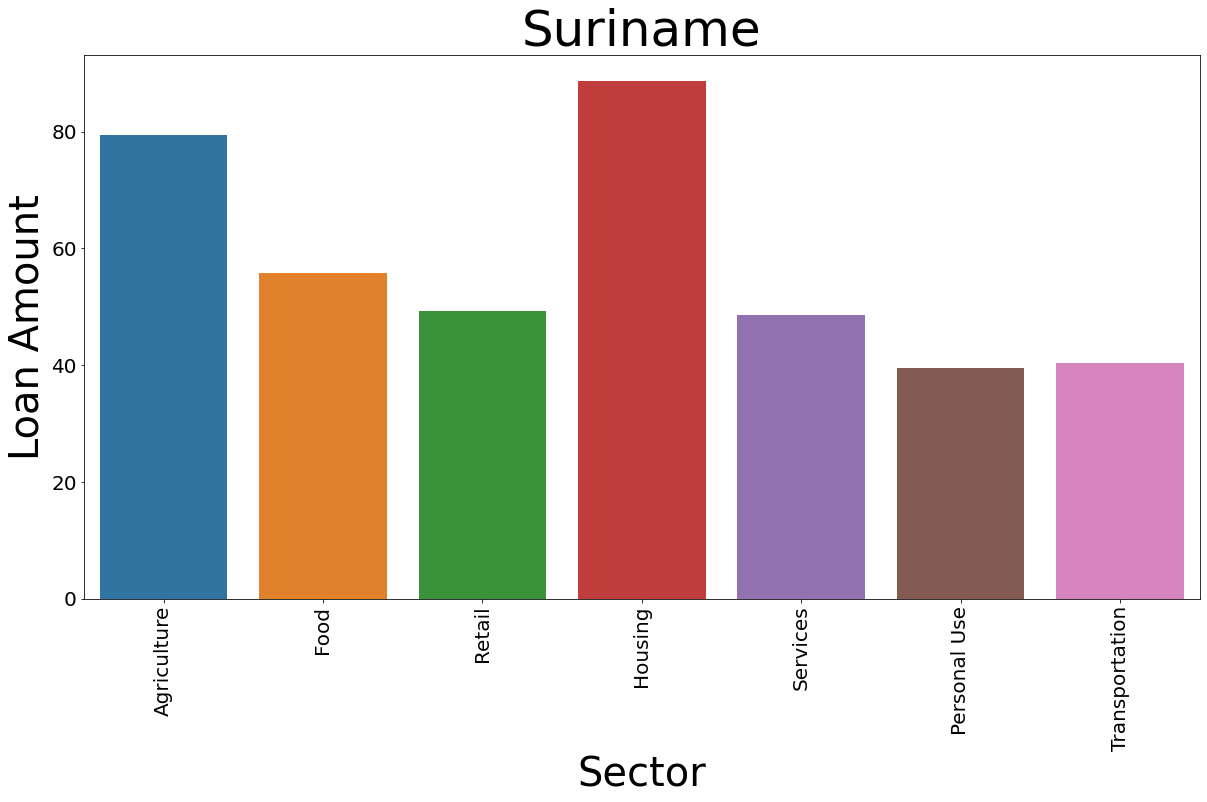

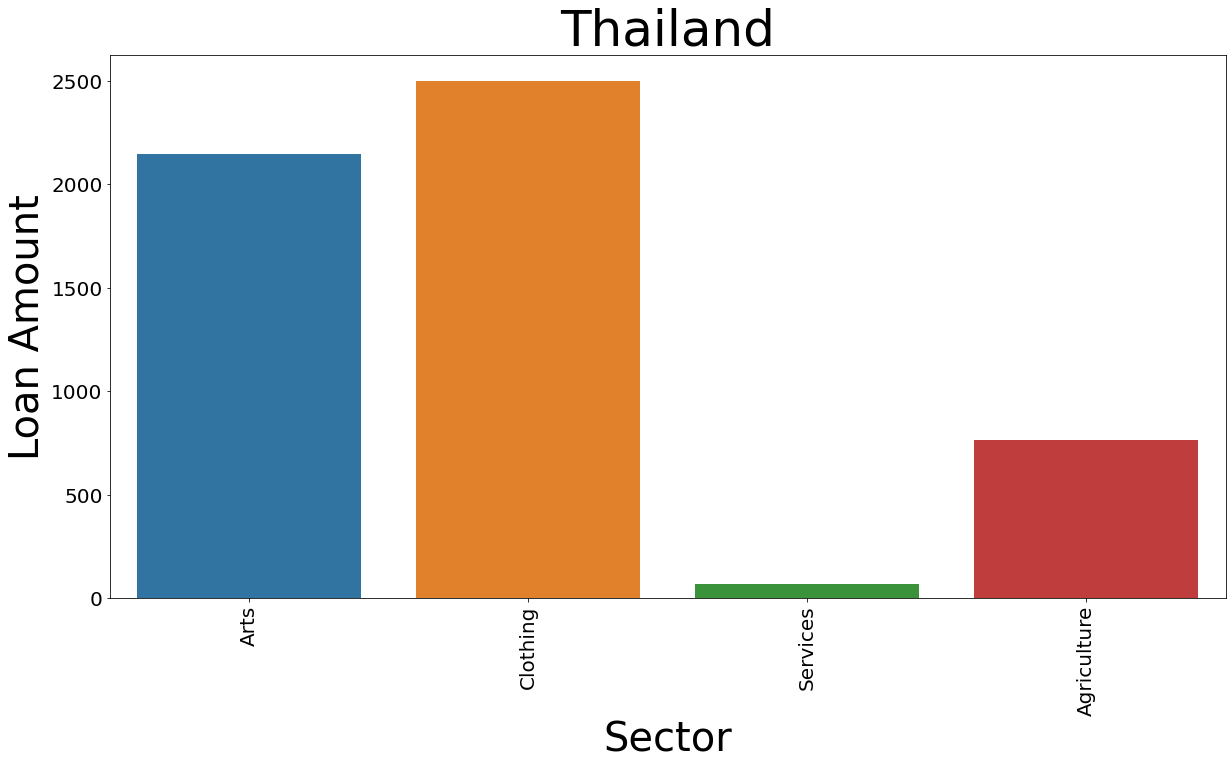

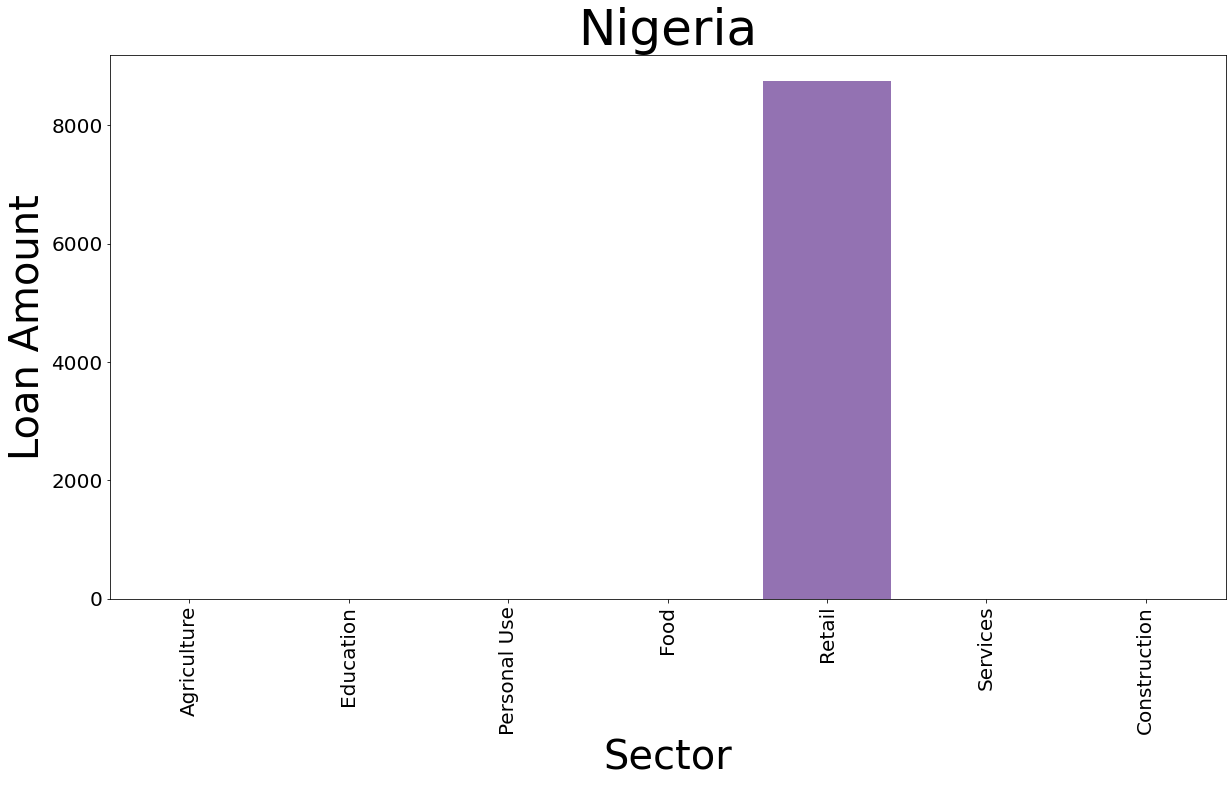

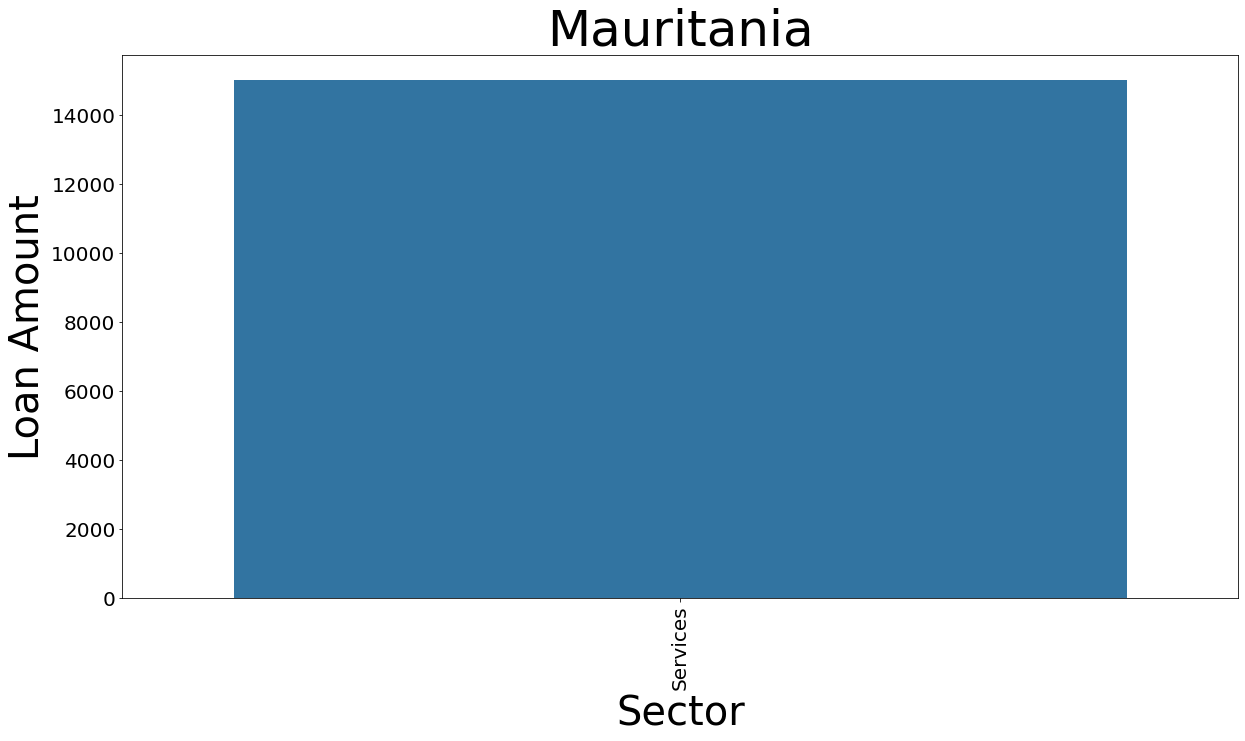

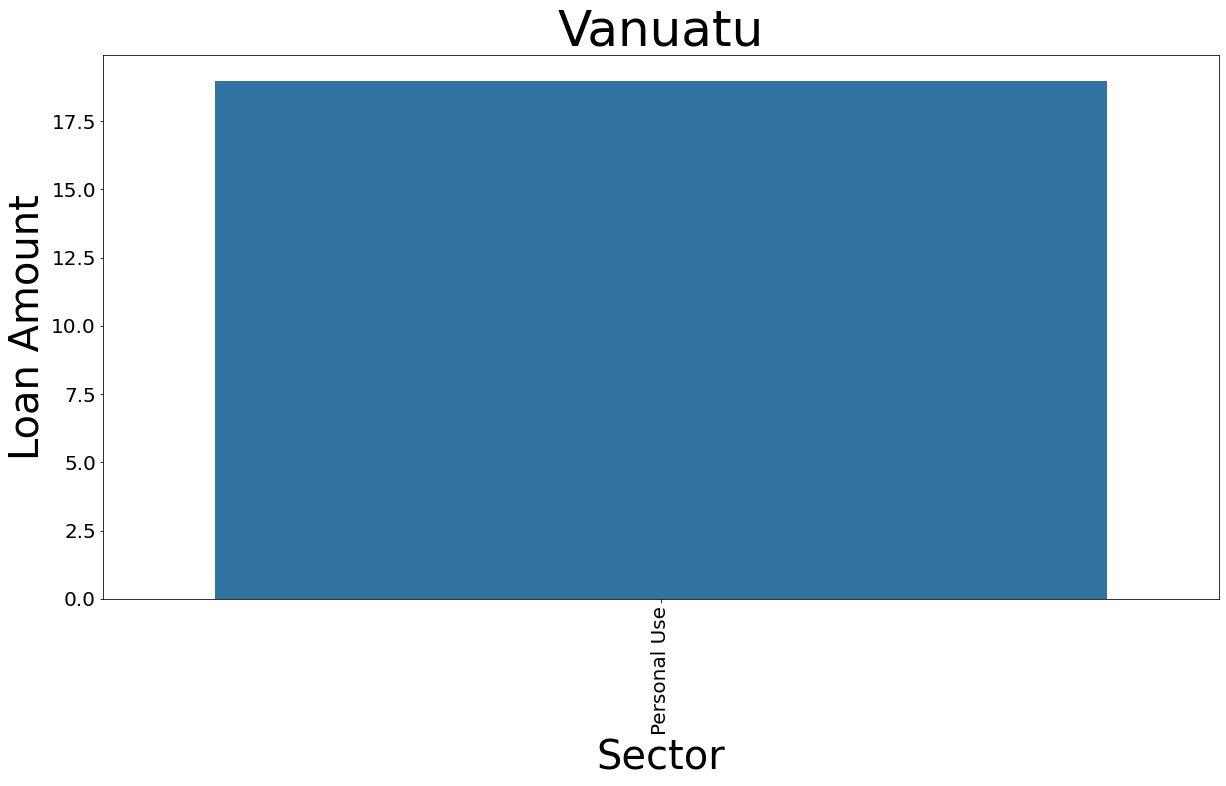

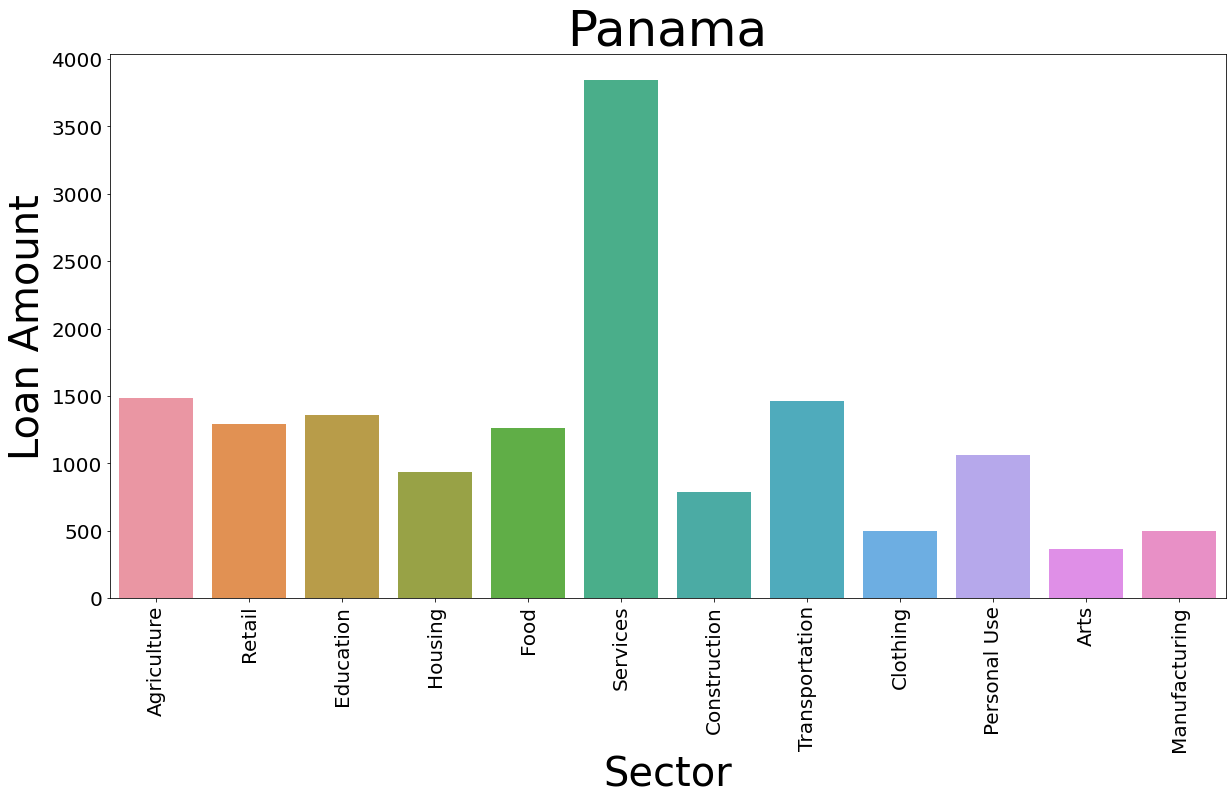

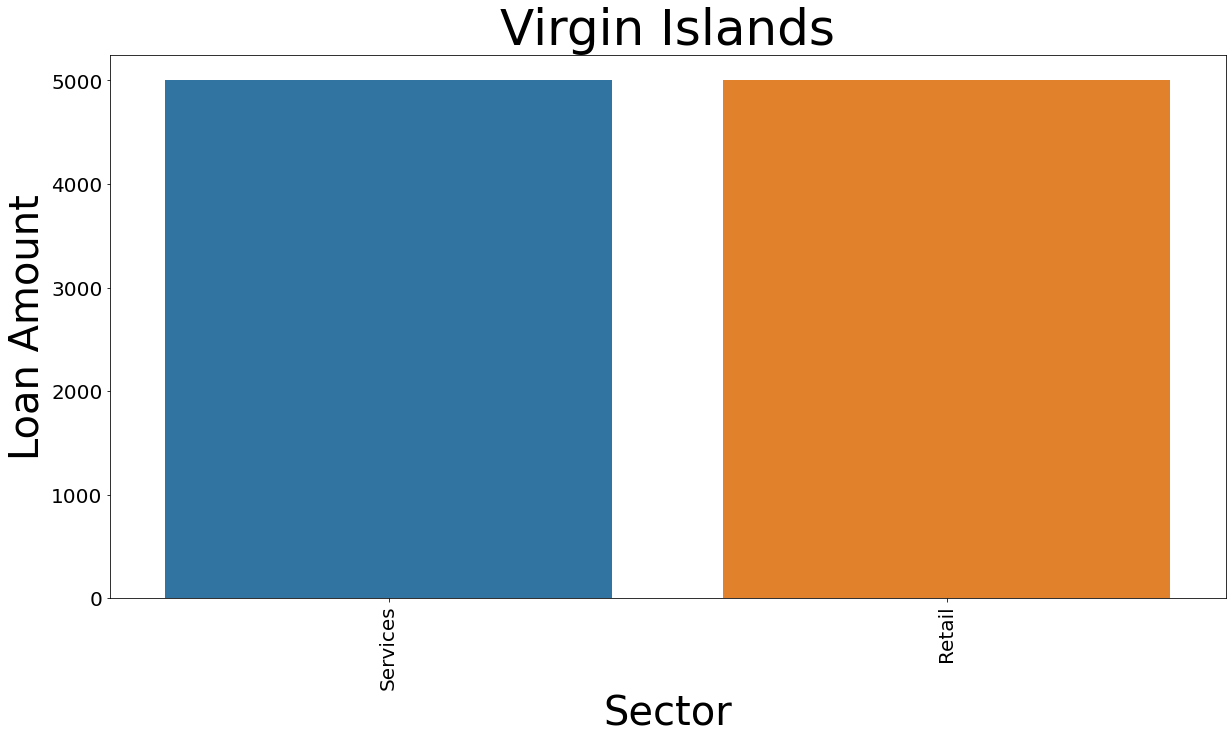

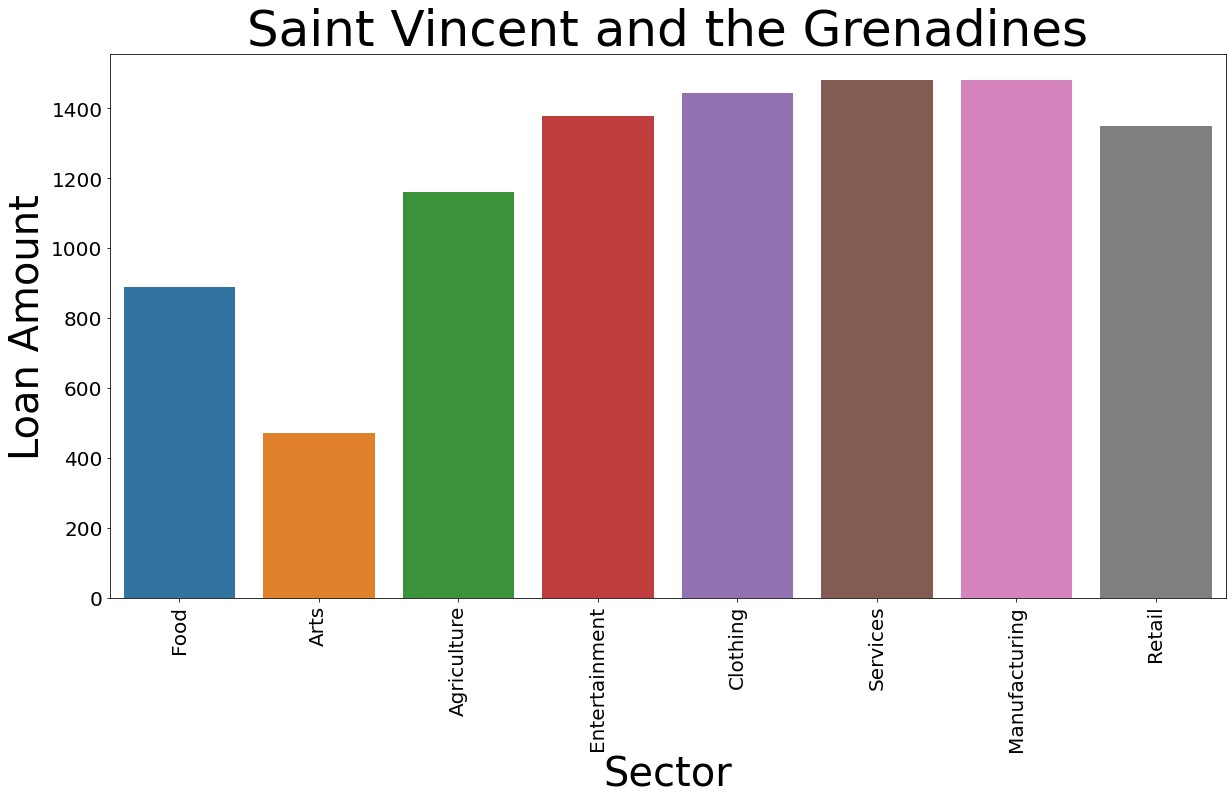

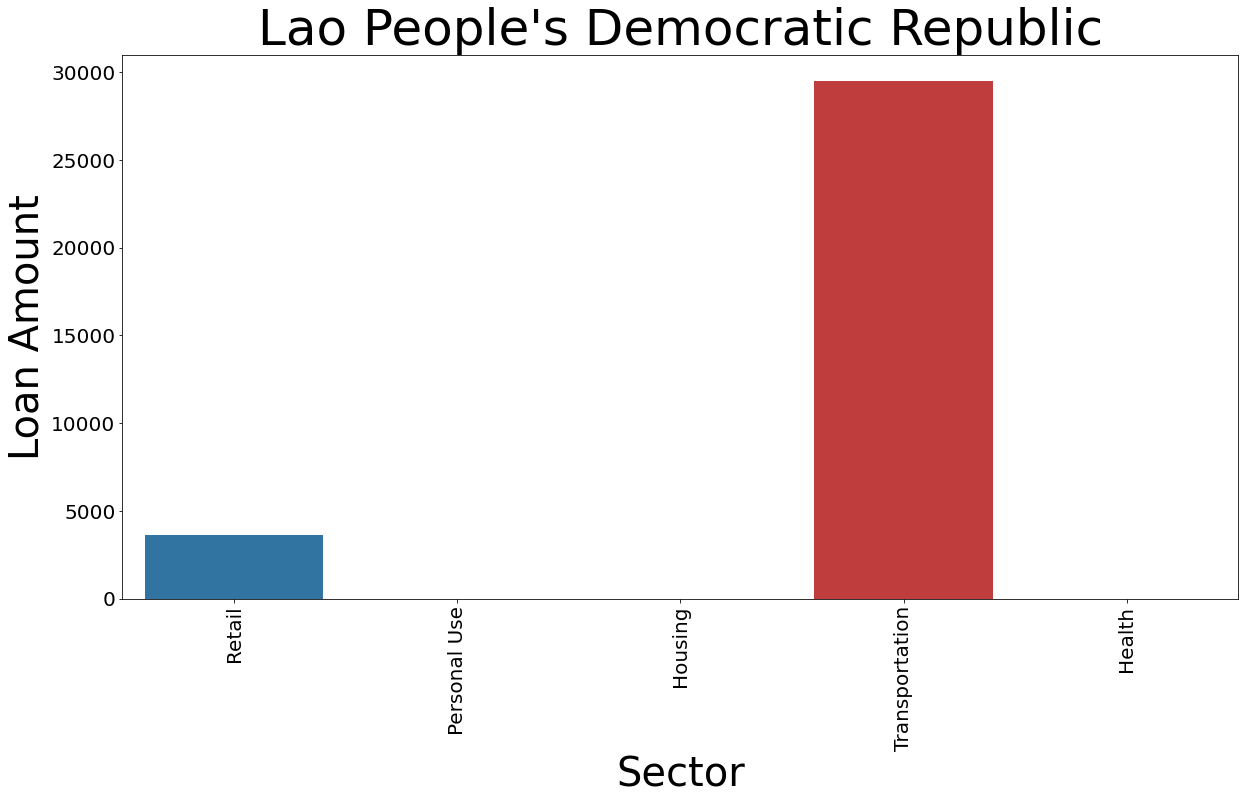

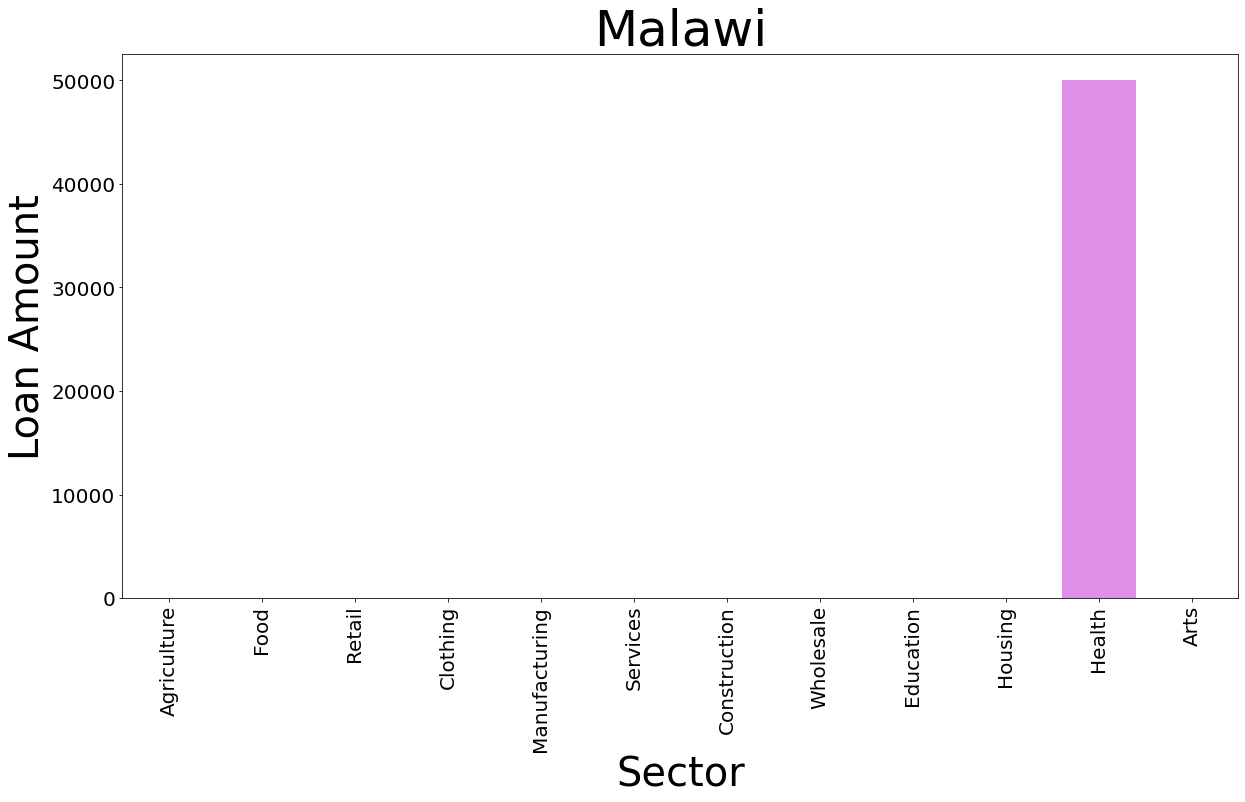

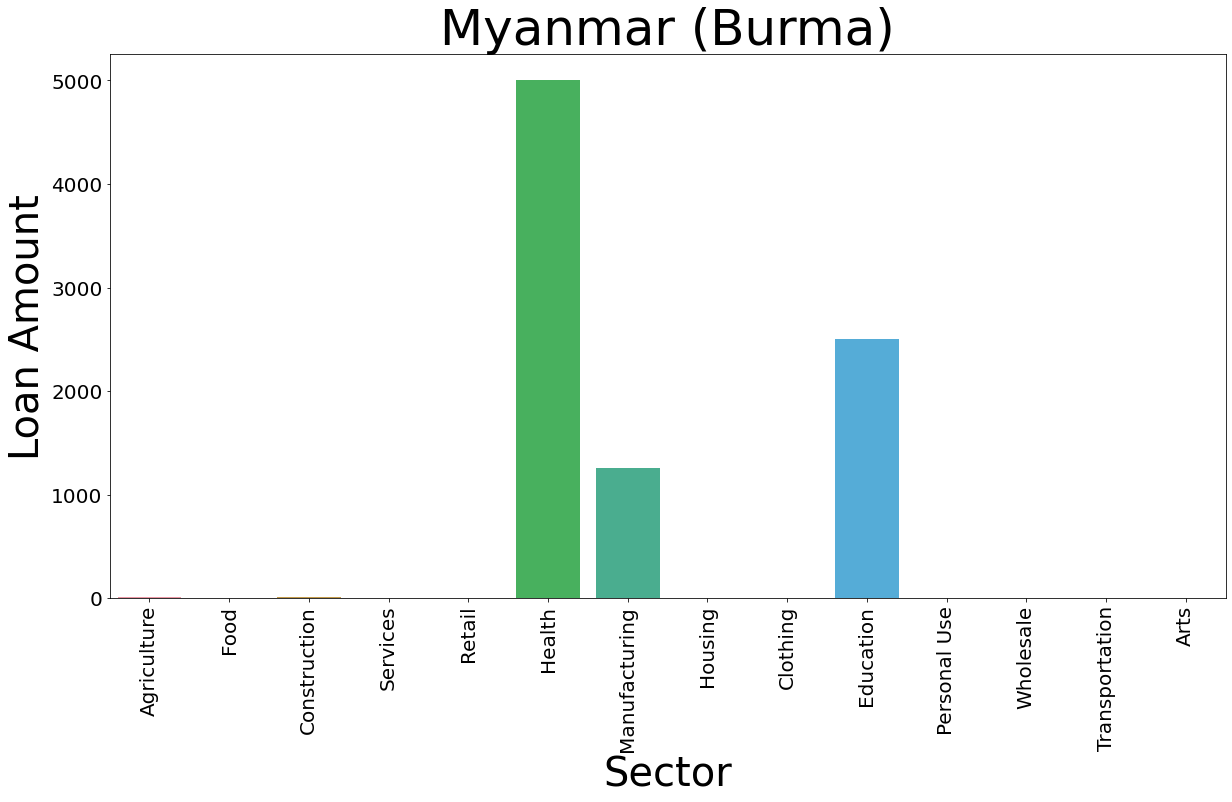

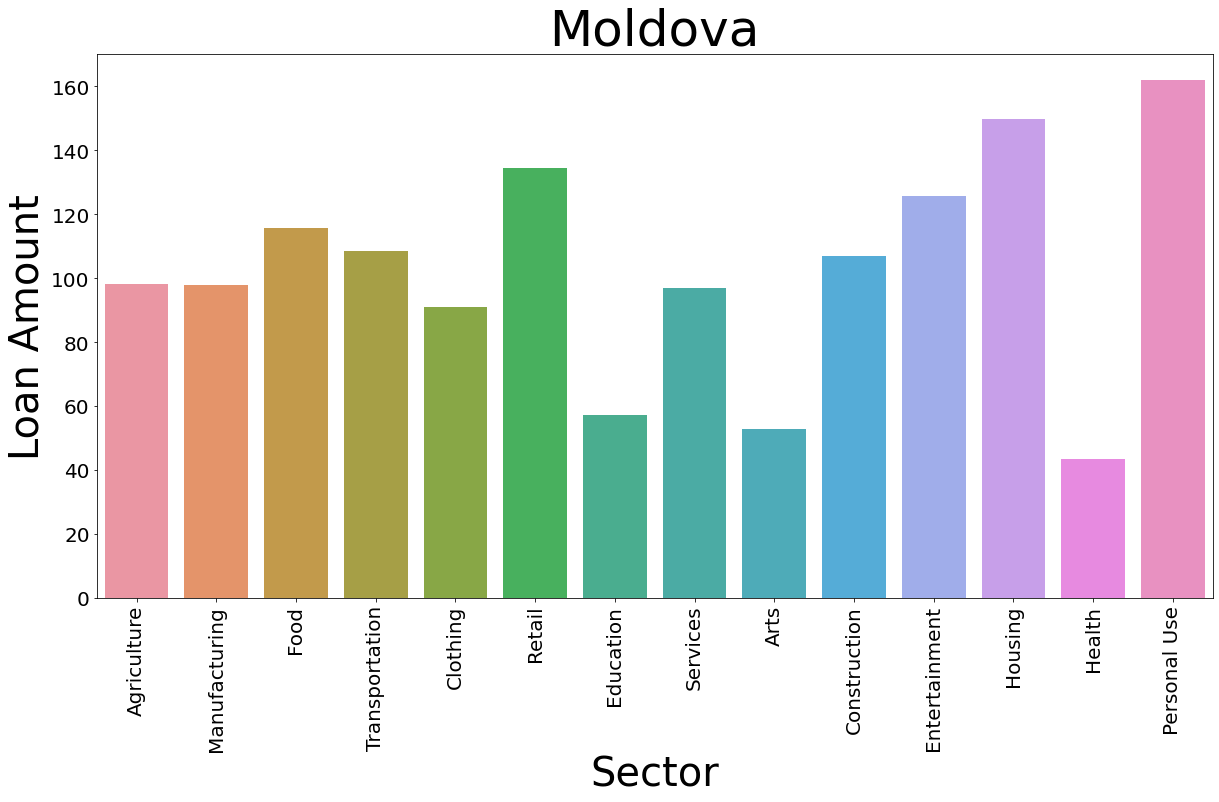

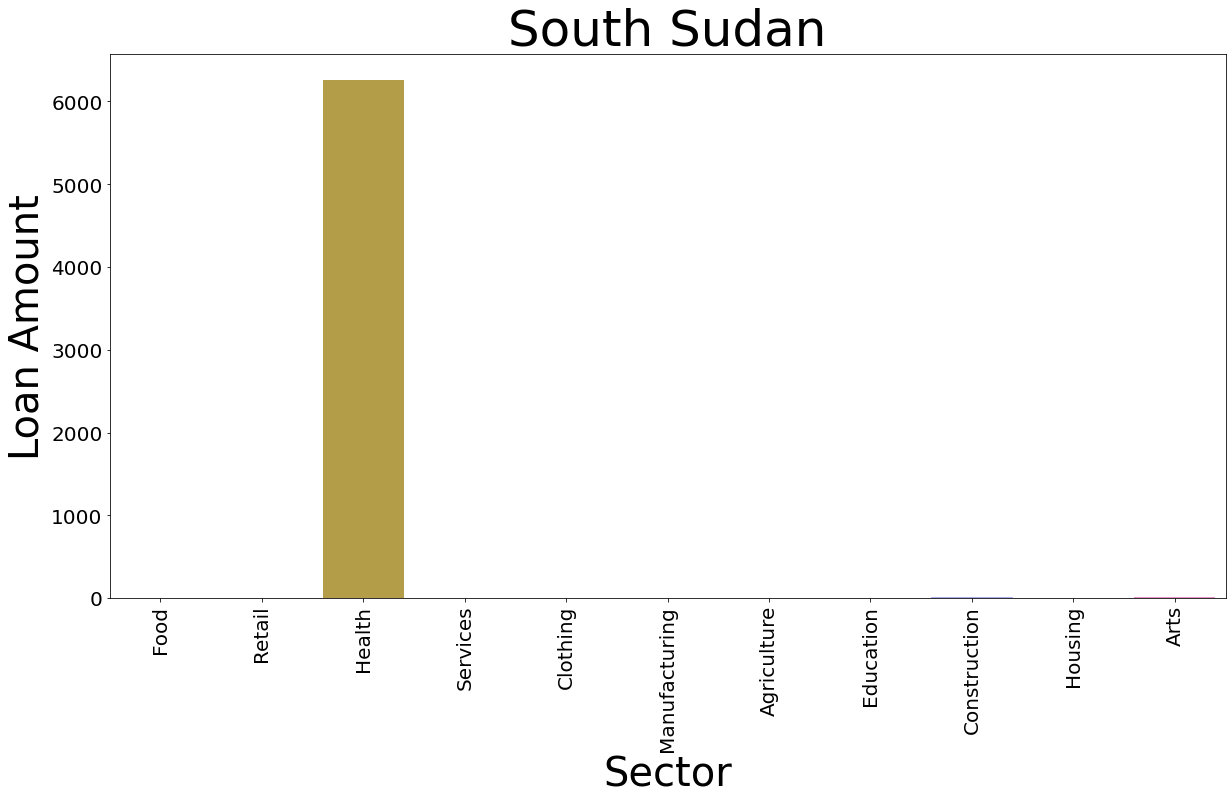

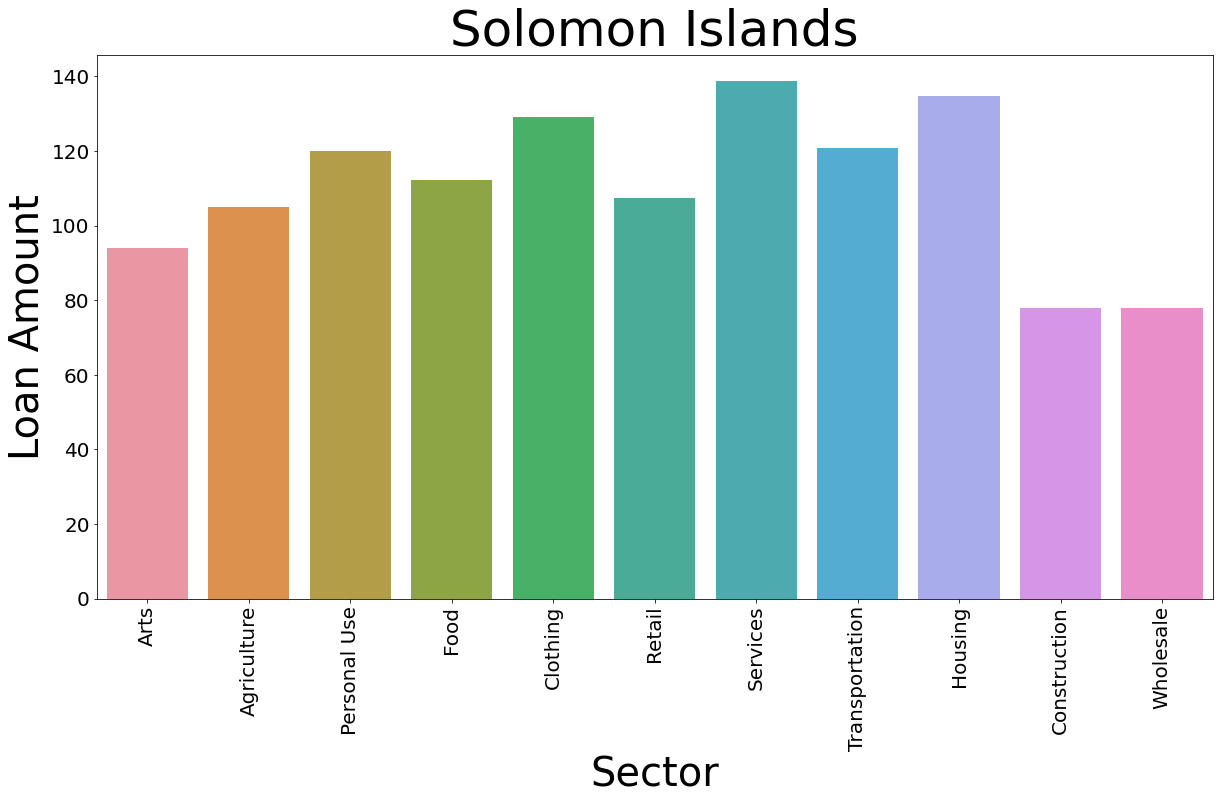

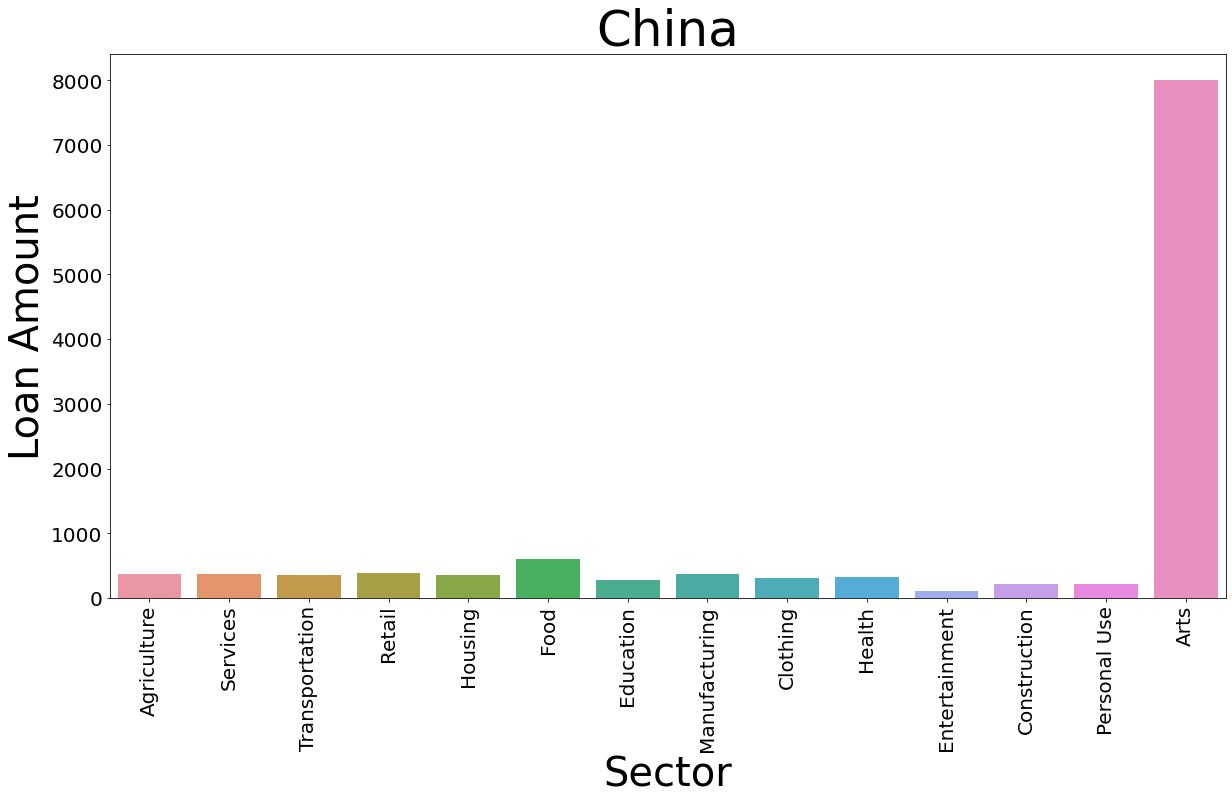

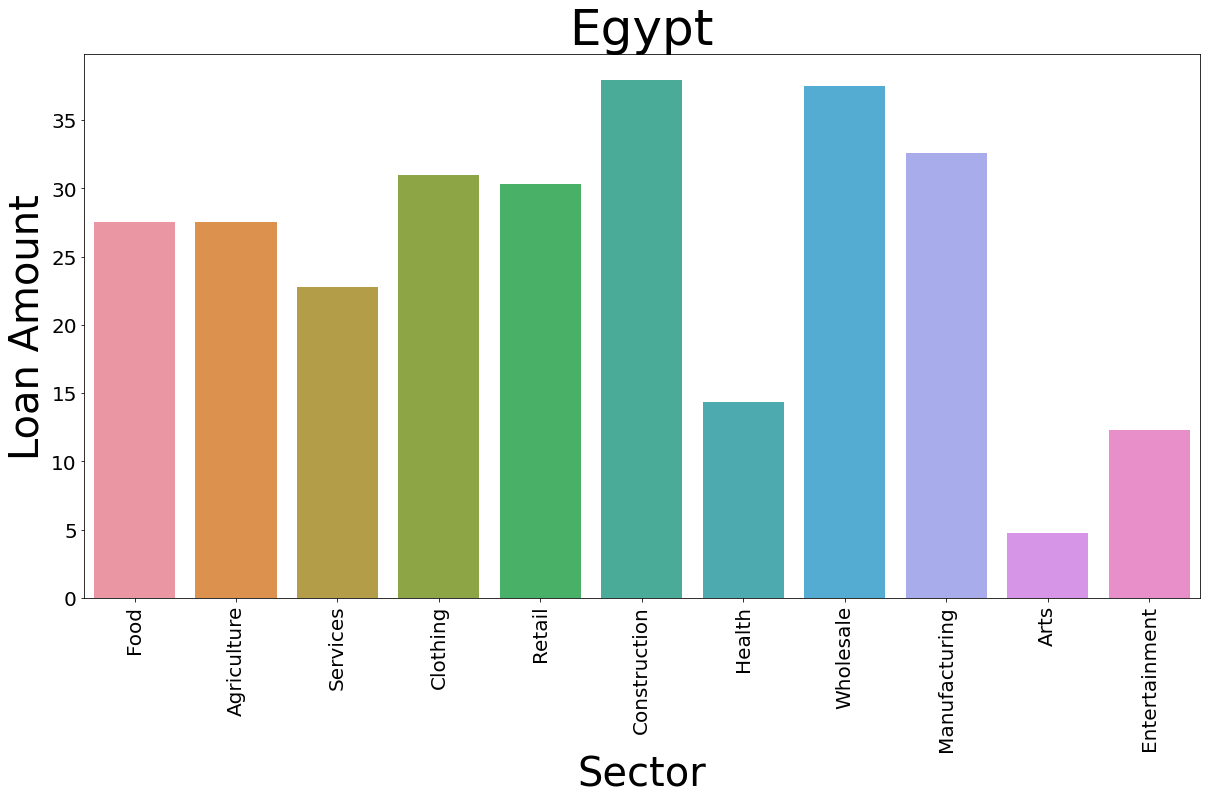

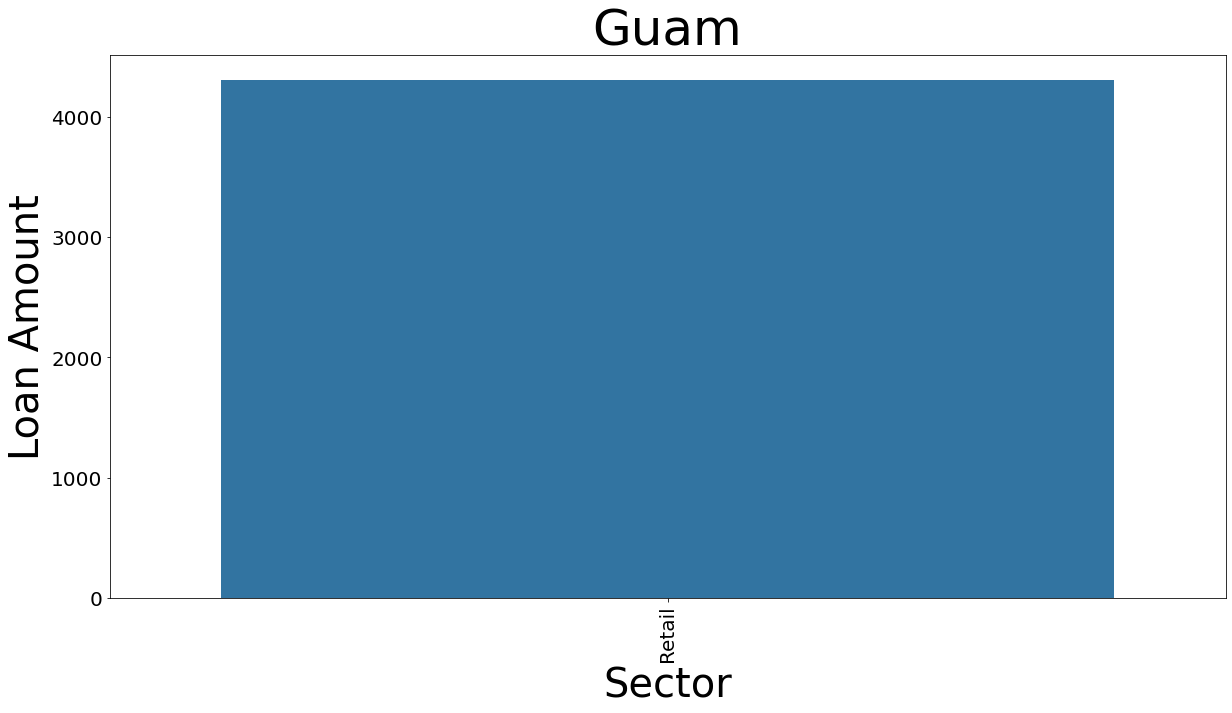

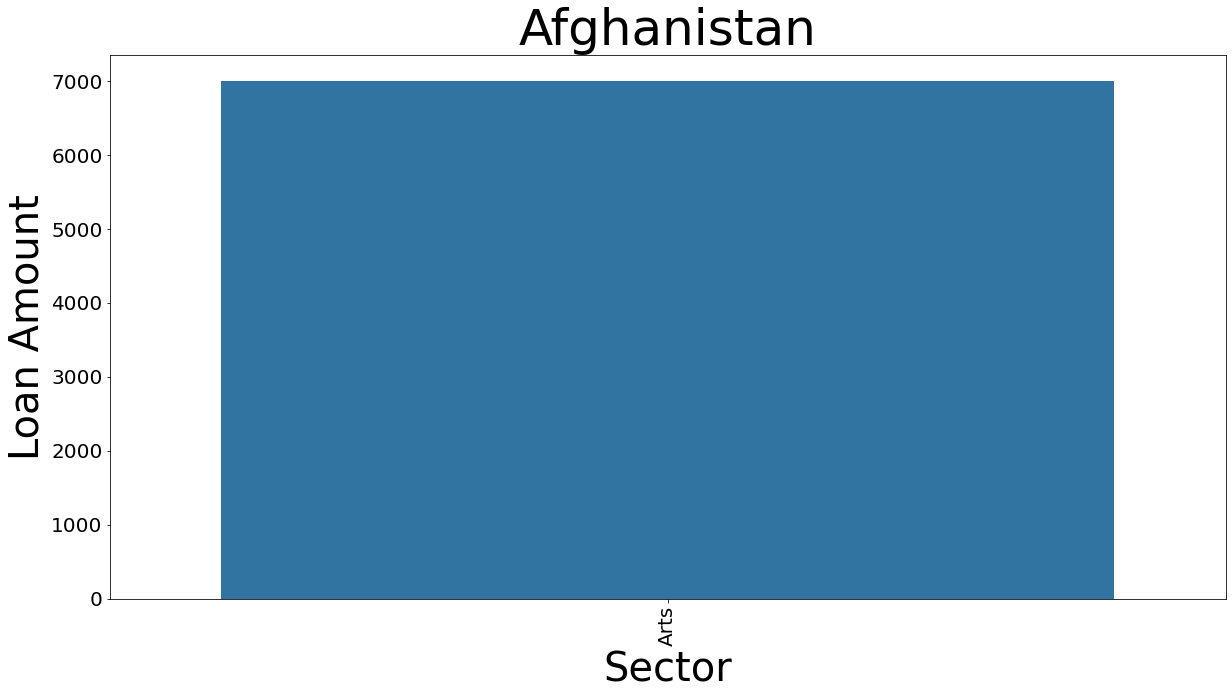

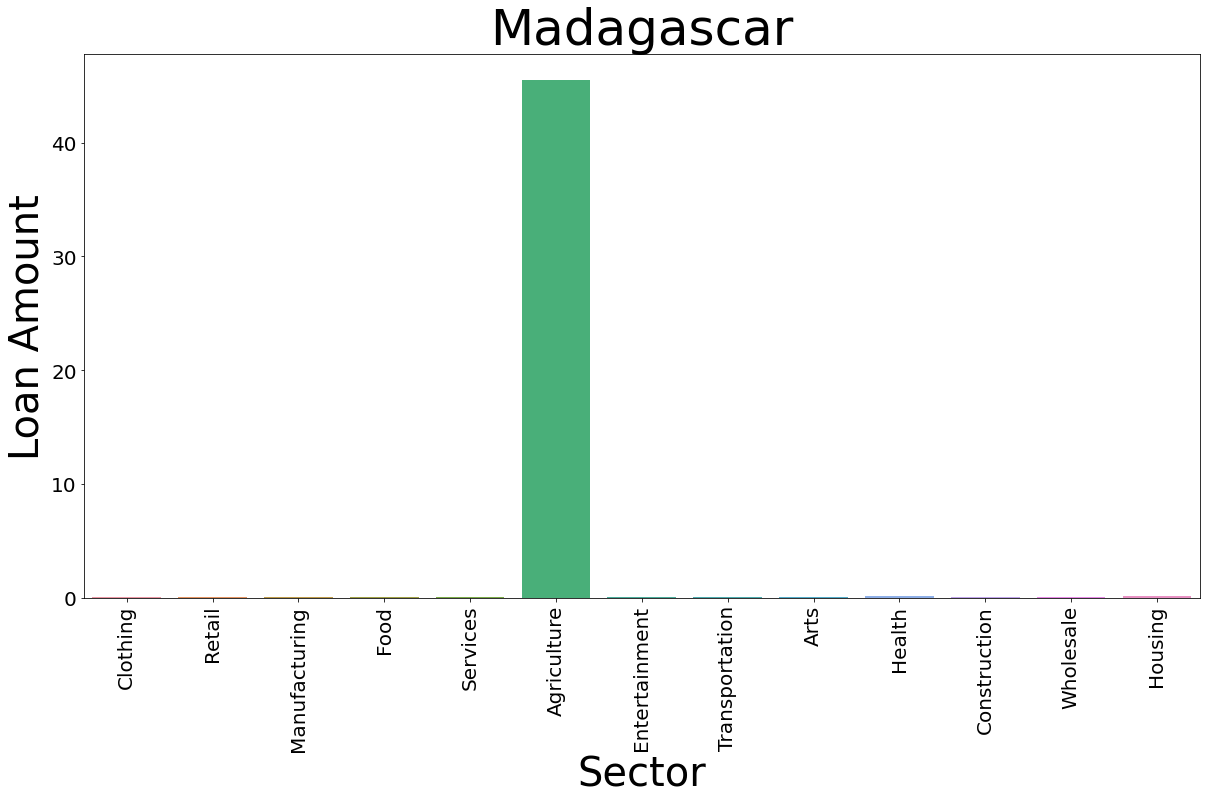

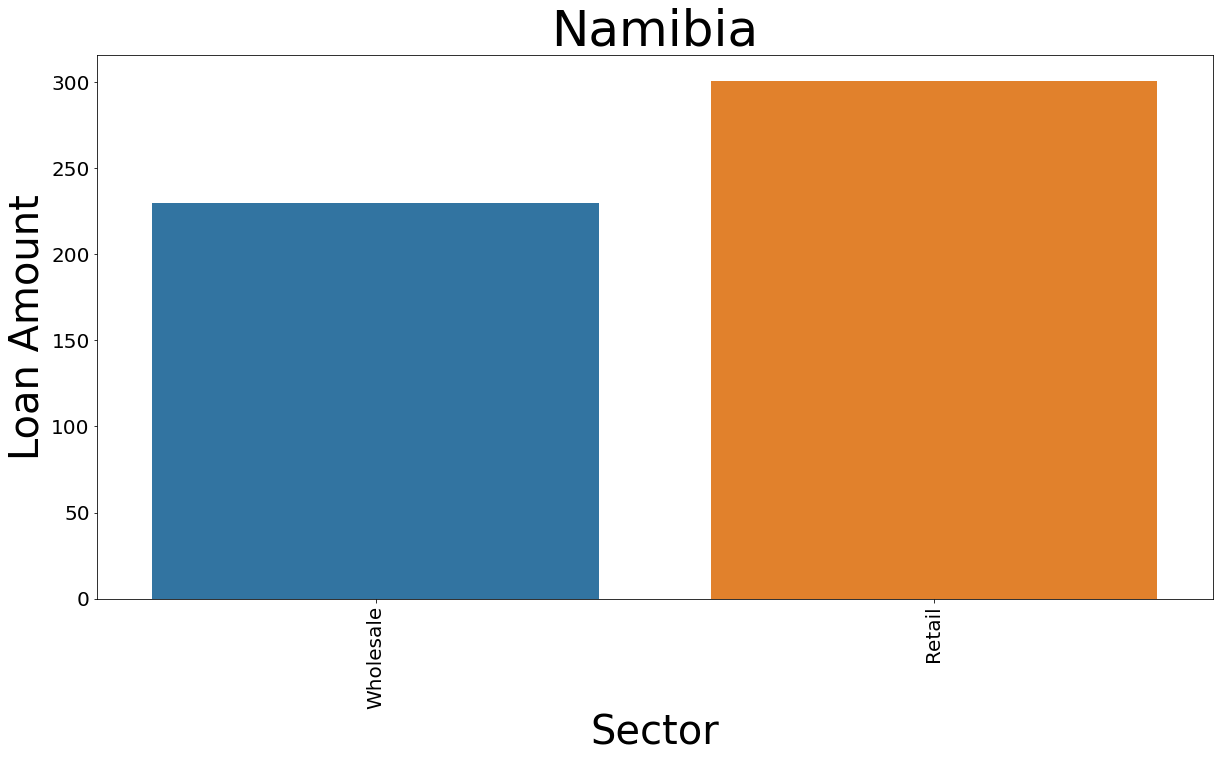

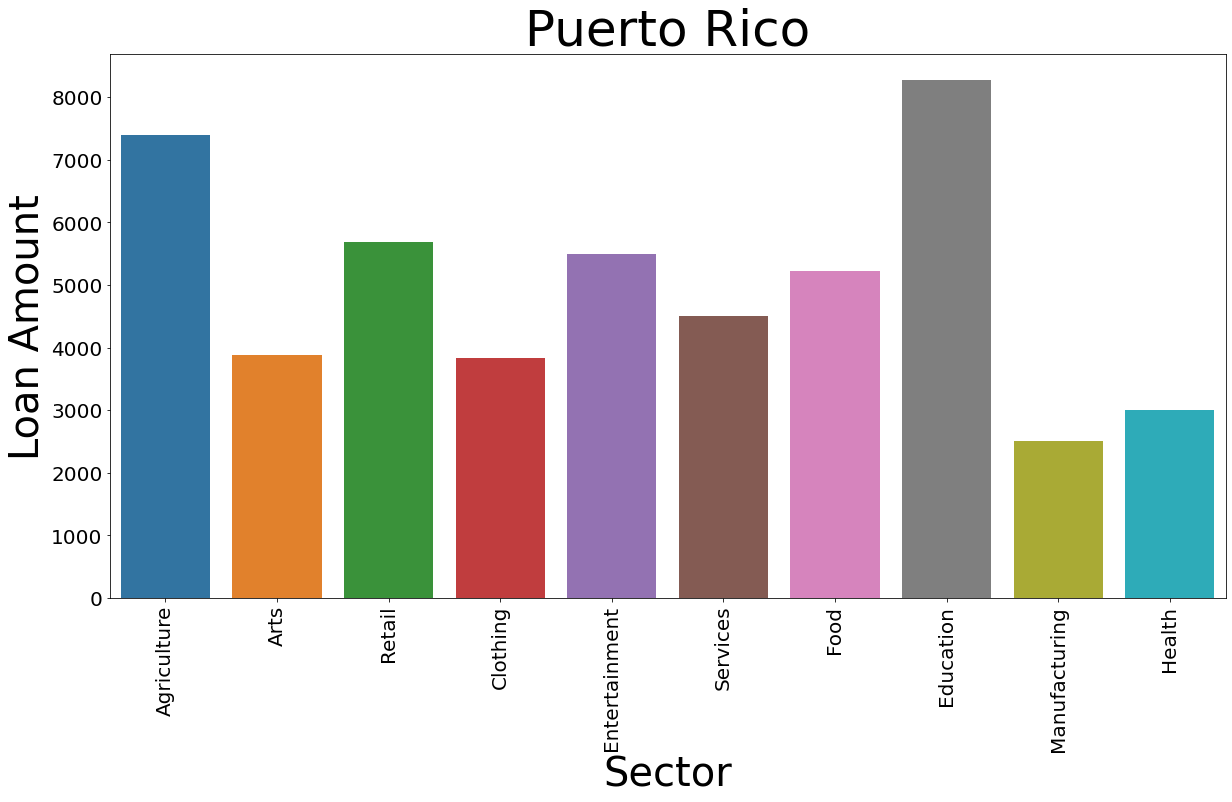

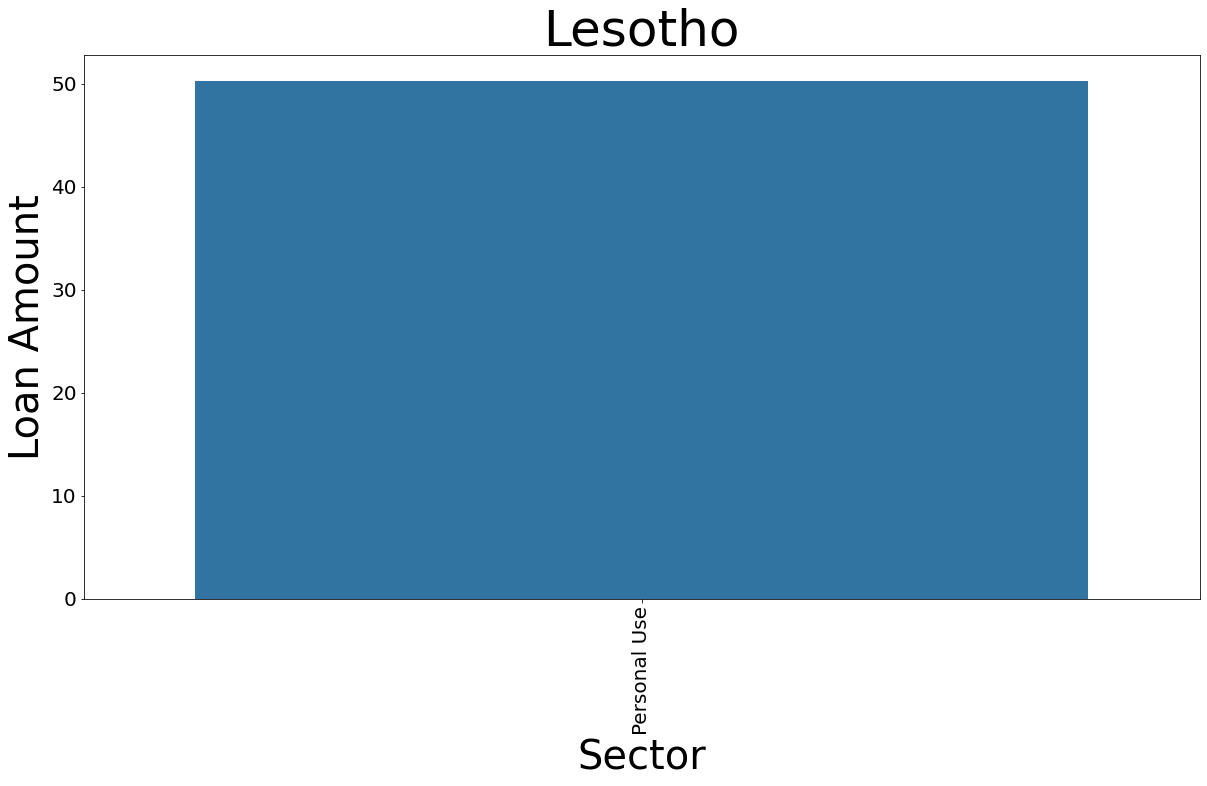

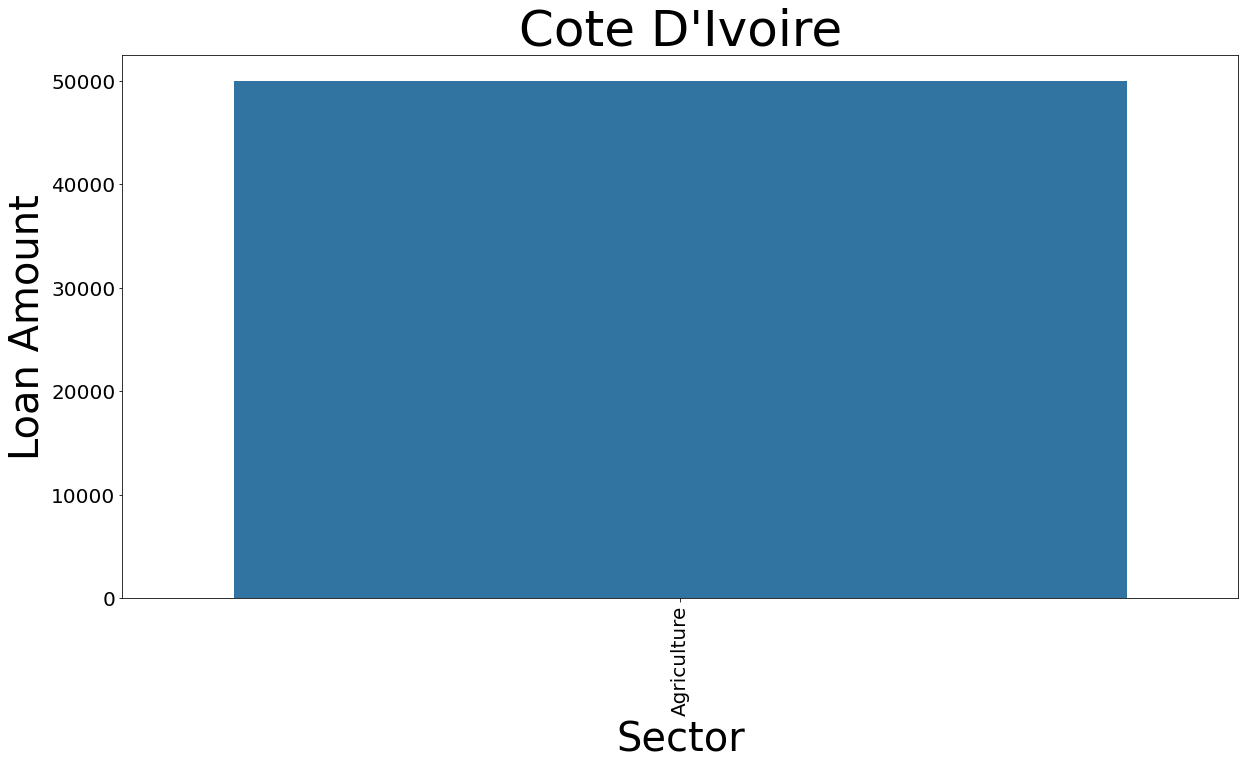

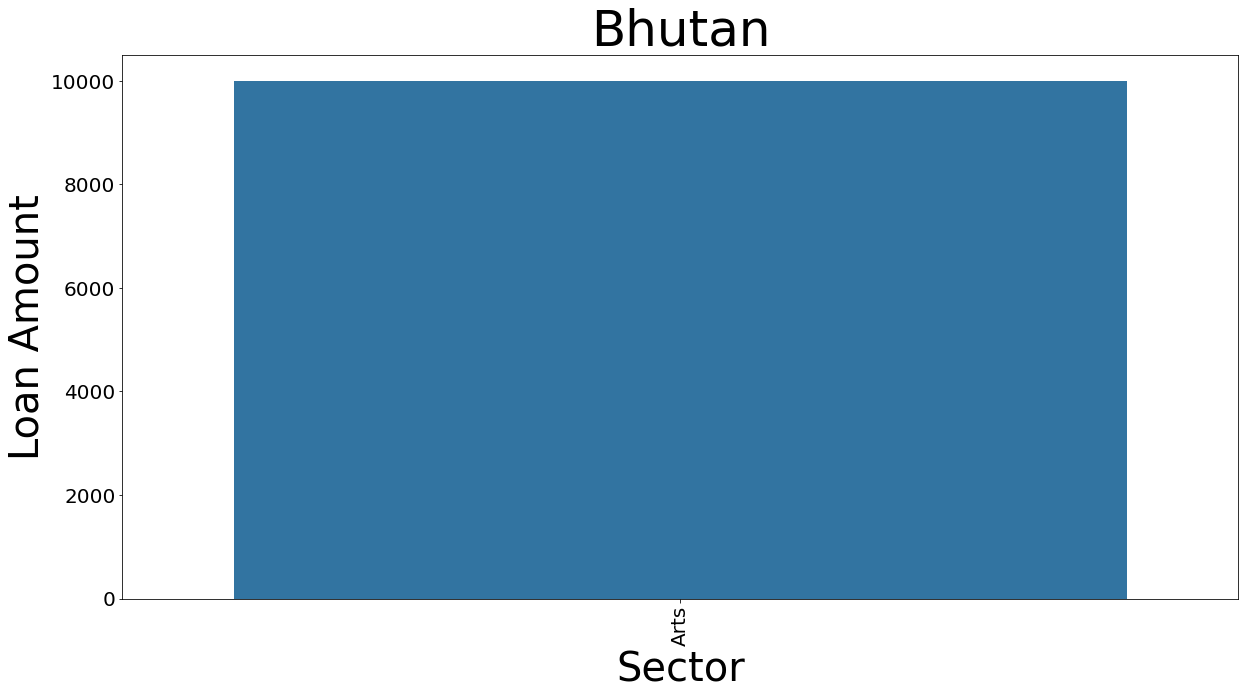

In [36]:

countries = df.country.unique()
for country in countries:
  data = df.loc[df['country']==country,['activity', 'sector', 'use','country', 'region', 'loan_amount_convert']]
  fig , ax = plt.subplots(figsize=(20,10))
  sns.barplot(data = data , x=data.sector , y=data.loan_amount_convert,ci=None )
  plt.title(country , size = 50)
  plt.xticks(rotation = 90,size= 20)
  plt.yticks(size = 20)
  plt.xlabel("Sector",size = 40)
  plt.ylabel("Loan Amount",size = 40)
  plt.show()
  plt.show()  


 

max_country_loan_amount_in_each_sector

In [37]:
sectors = df.sector.unique()
country =[]
sectorr = []
loan_amount = []
for sector in sectors:
  data = df.loc[df['sector']==sector,['activity', 'sector', 'use','country', 'region', 'loan_amount_convert']]
  data = data.groupby('country')[ 'loan_amount_convert'].sum().sort_values(ascending=False)
  print("For Sector [ " +sector +  ' ]')
  print('Maximum Country Requierd Loans Is [ ' + data.index[0]  + ' ]')
  print('With Loan Amount Equal [ ' + str(data[0]) + ' ]')
  print('\n')

  loan_amount.append(data[0])
  sectorr.append(sector)
  country.append(data.index[0])


For Sector [ Food ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 7209975.0 ]


For Sector [ Transportation ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 597925.0 ]


For Sector [ Arts ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 1351500.0 ]


For Sector [ Services ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 9420300.0 ]


For Sector [ Agriculture ]
Maximum Country Requierd Loans Is [ El Salvador ]
With Loan Amount Equal [ 9355075.0 ]


For Sector [ Manufacturing ]
Maximum Country Requierd Loans Is [ El Salvador ]
With Loan Amount Equal [ 376875.0 ]


For Sector [ Wholesale ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 105125.0 ]


For Sector [ Retail ]
Maximum Country Requierd Loans Is [ United States ]
With Loan Amount Equal [ 4437450.0 ]


For Sector [ Clothing ]
Maximum Country Requierd Loans Is [ The Democratic Republi

In [38]:
max_country_sector = dict(sector = sectorr , country =country , loan_amounts = loan_amount)
max_country_loan_amount_in_each_sector = pd.DataFrame(max_country_sector)
max_country_loan_amount_in_each_sector

sector                               country  loan_amounts
0             Food                         United States    7209975.00
1   Transportation                         United States     597925.00
2             Arts                         United States    1351500.00
3         Services                         United States    9420300.00
4      Agriculture                           El Salvador    9355075.00
5    Manufacturing                           El Salvador     376875.00
6        Wholesale                         United States     105125.00
7           Retail                         United States    4437450.00
8         Clothing  The Democratic Republic of the Congo    2990450.00
9     Construction                             Palestine     452875.00
10          Health                               Lebanon     782517.16
11       Education                                Jordan    2892826.50
12    Personal Use                             Palestine    1655111.00
13         Housing                           El Salvador    3451700.00
14   Entertainment                         United States     776725.00

In [39]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [43]:
trace = go.Scatter (x =max_country_loan_amount_in_each_sector.country,
                    
                    y =max_country_loan_amount_in_each_sector.sector,
                    
                    mode = 'markers',
                    
                    marker = dict(size = max_country_loan_amount_in_each_sector.loan_amounts,sizeref = 500,
                                
                                 color = max_country_loan_amount_in_each_sector.loan_amounts,
                                 colorscale = 'Jet',
                                 showscale = True)
                   )

data = [trace]

layout = go.Layout(height = 600,
                   width = 900,
                  
                   title = 'Housing Data',
                   hovermode = 'closest')

fig = go.Figure(data = data,
                layout = layout)

offline.iplot(fig)


offline.iplot(data)


                   
                  

In [45]:
df.borrower_genders.value_counts()

female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                                              

In [46]:
df.borrower_genders  = np.where(~((df.borrower_genders == 'male')|(df.borrower_genders=='female')) , 'female',df.borrower_genders)

In [48]:
genders = df.borrower_genders.value_counts()


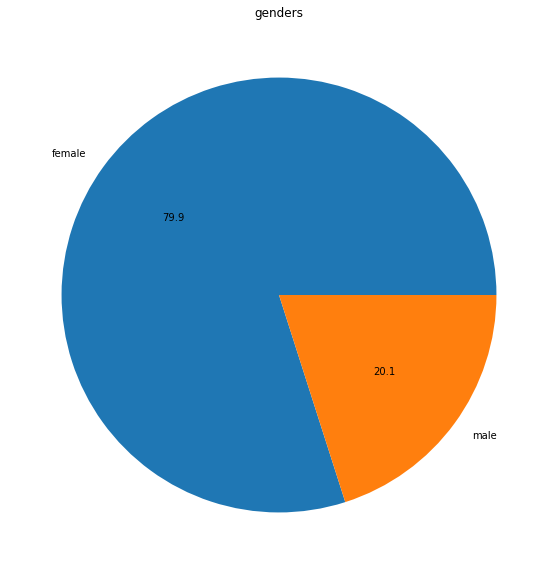

In [50]:
plt.subplots(figsize=(20,10))
plt.pie(genders,
        labels=genders.index,
        autopct='%.1f')

plt.title('genders')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

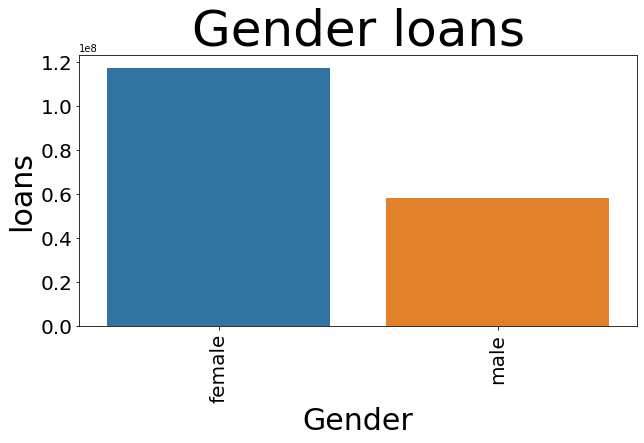

In [53]:
gender = df.groupby('borrower_genders')['loan_amount_convert'].sum()
gender  = pd.DataFrame(gender)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=gender.index , y=gender.loan_amount_convert ,data = gender )
plt.xticks(rotation=90 ,size = 20)
plt.yticks(size = 20)
plt.title('Gender loans', size= 50)
plt.xlabel('Gender' , size = 30)
plt.ylabel('loans' , size = 30)
plt.show

In [55]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/kiva loans data analysis project/kiva_loans_new.csv')

In [41]:
df.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'posted_time',
       'disbursed_time', 'funded_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval', 'date', 'loan_amount_convert',
       'funded_amount_convert', 'term_in_months_convert',
       'lender_count_convert'],
      dtype='object')